# Learning Theory from First Principles

## **Work done**

**Figures still to do**
Figure 5.3
Figure 7.3
Figure 8.2
Chapter 9



**Figures Done** :
- Chapter 1 :
  - 1.1: Shane
- Chapter 2
  - 2.1: Camille
  - 2.2: Gabriel
- Chapter 3
  - 3.1: Maria
  - 3.2: Shane
  - 3.3: Shane
- Chapter 4
  - 4.1: Berné
  - 4.2: Gabriel
- Chapter 5
  - 5.1: Berné
  - 5.2: Berné
  - 5.3: Gabriel
- Chapter 6 :  Berné
- Chapter 7
  - 7.2: Berné
  - 7.3: Gabriel (currently)
- Chapter 8
  - 8.1: Berné
  - 8.2 : Camille (doing)
- Chapter 9
  - 9.1 Shane (doing)
  - 9.2
  - 9.3 Gabriel


## Generic packages, settings and helper functions



### Packages

In [ ]:
from google.colab import files
import numpy as np
from numpy.random import randn, rand
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from scipy.stats import ortho_group
from scipy.special import erfinv, gamma
from scipy.linalg import sqrtm, eigh
from bisect import bisect
import tqdm
import warnings

np.random.seed(seed=1)

### Settings

The code below is used to standardize the appearance of the graphics. The graphs may appear unevenly sized when displayed in this notebook, but once downloaded they are the correct size.

In [ ]:
# Appearance of the graphs

# adujst font
SMALL_FONT = 5
MED_FONT = 8
BIG_FONT = 12
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = SMALL_FONT
mpl.rcParams['axes.titlesize'] = SMALL_FONT

# adujst lines and markers
mpl.rcParams['axes.linewidth'] = .3
mpl.rcParams['lines.linewidth'] = .7
mpl.rcParams['lines.markersize'] = 2
mpl.rcParams['patch.linewidth'] = .3
mpl.rcParams['errorbar.capsize'] = 1.5
mpl.rcParams['lines.markeredgewidth'] = .3

# withdraw the ticks
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0

# adjust legend box
mpl.rcParams['legend.fancybox'] = 0
mpl.rcParams['legend.shadow'] = 0
mpl.rcParams['legend.framealpha'] = 1

# adjust fig general settings
mpl.rcParams['figure.dpi'] = 600

big_rectangle = (6.5, 3.5) # height = 9 cm, width = 17 cm
medium_rectangle = (4.7, 1.6) # height = 4 cm, width = 12 cm
medium_square = (4.7, 4.7) # height = 12 cm, width = 12 cm
small_rectangle = (2.4, 1.6) # height = 6 cm, width = 4 cm
mpl.rcParams['figure.figsize'] = small_rectangle

inner_space = {'wspace':.5, 'hspace':.5}

# savefig params
mpl.rcParams["savefig.bbox"] = 'tight'

### Helper functions

In [ ]:
def mse(y_hat, y):
  return np.mean((y - y_hat)**2)

zero_one = np.vectorize(lambda u: 1 if u<0 else 0)
hinge = np.vectorize(lambda u: np.maximum(1-u, 0))
square = np.vectorize(lambda u: (1-u)**2)
logis = np.vectorize(lambda u: np.log(1+np.exp(-u)))

# Chapitre 1

## Figure 1.1

<ipython-input-4-4e6324b63e4c>:16: RuntimeWarning: divide by zero encountered in log
  a = np.sqrt(np.log(np.arange(0,n)))
<ipython-input-4-4e6324b63e4c>:16: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(np.log(np.arange(0,n)))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

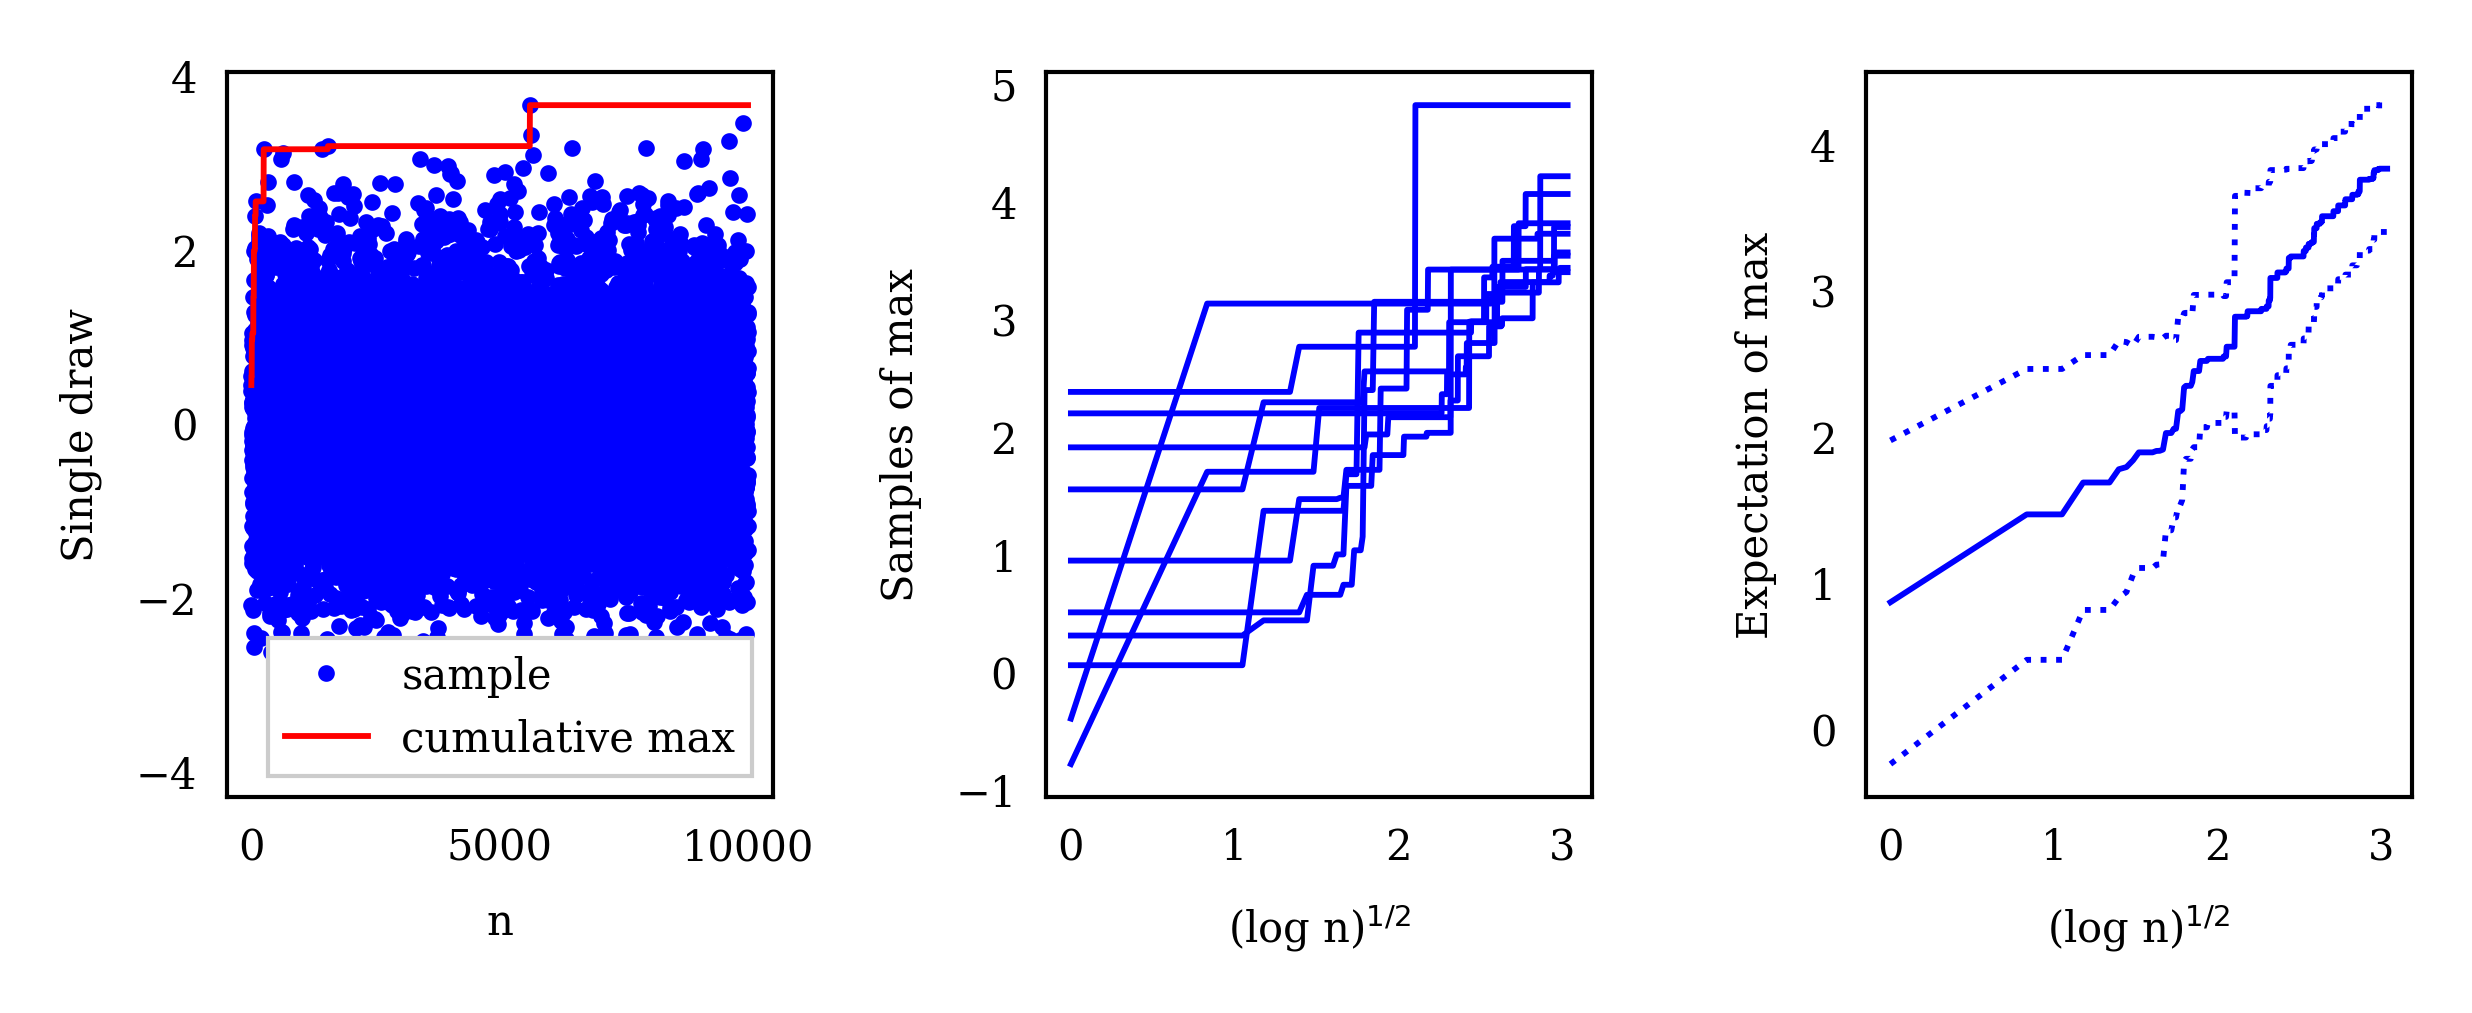

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=medium_rectangle, gridspec_kw = inner_space)

n = 10000
nrep = 1000
X = np.random.randn(n,nrep)
plt.sca(axs[0])
plt.plot(X[:,0], 'b.', label='sample')
plt.plot(np.maximum.accumulate(X[:,0]), 'r-', label='cumulative max')
plt.xlabel('n');
plt.ylabel('Single draw')
plt.legend(loc = 'lower right')

n = 10000
nrep = 10
X = np.random.randn(n,nrep)
a = np.sqrt(np.log(np.arange(0,n)))
b = np.maximum.accumulate(X)
plt.sca(axs[1])
plt.plot(a, b, 'b')
plt.xlabel(r'(log n)$^{1/2}$')
plt.ylabel('Samples of max')

plt.sca(axs[2])
plt.plot(a,np.mean(b,1),'b')
plt.plot(a,np.mean(b,1)+np.std(b,axis=1,ddof=1),':b');
plt.plot(a,np.mean(b,1)-np.std(b,axis=1,ddof=1),':b');
plt.xlabel(r'(log n)$^{1/2}$')
plt.ylabel('Expectation of max')

plt.savefig('fig11.svg')
files.download("fig11.svg")

# Chapitre 2

## Figure 2.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

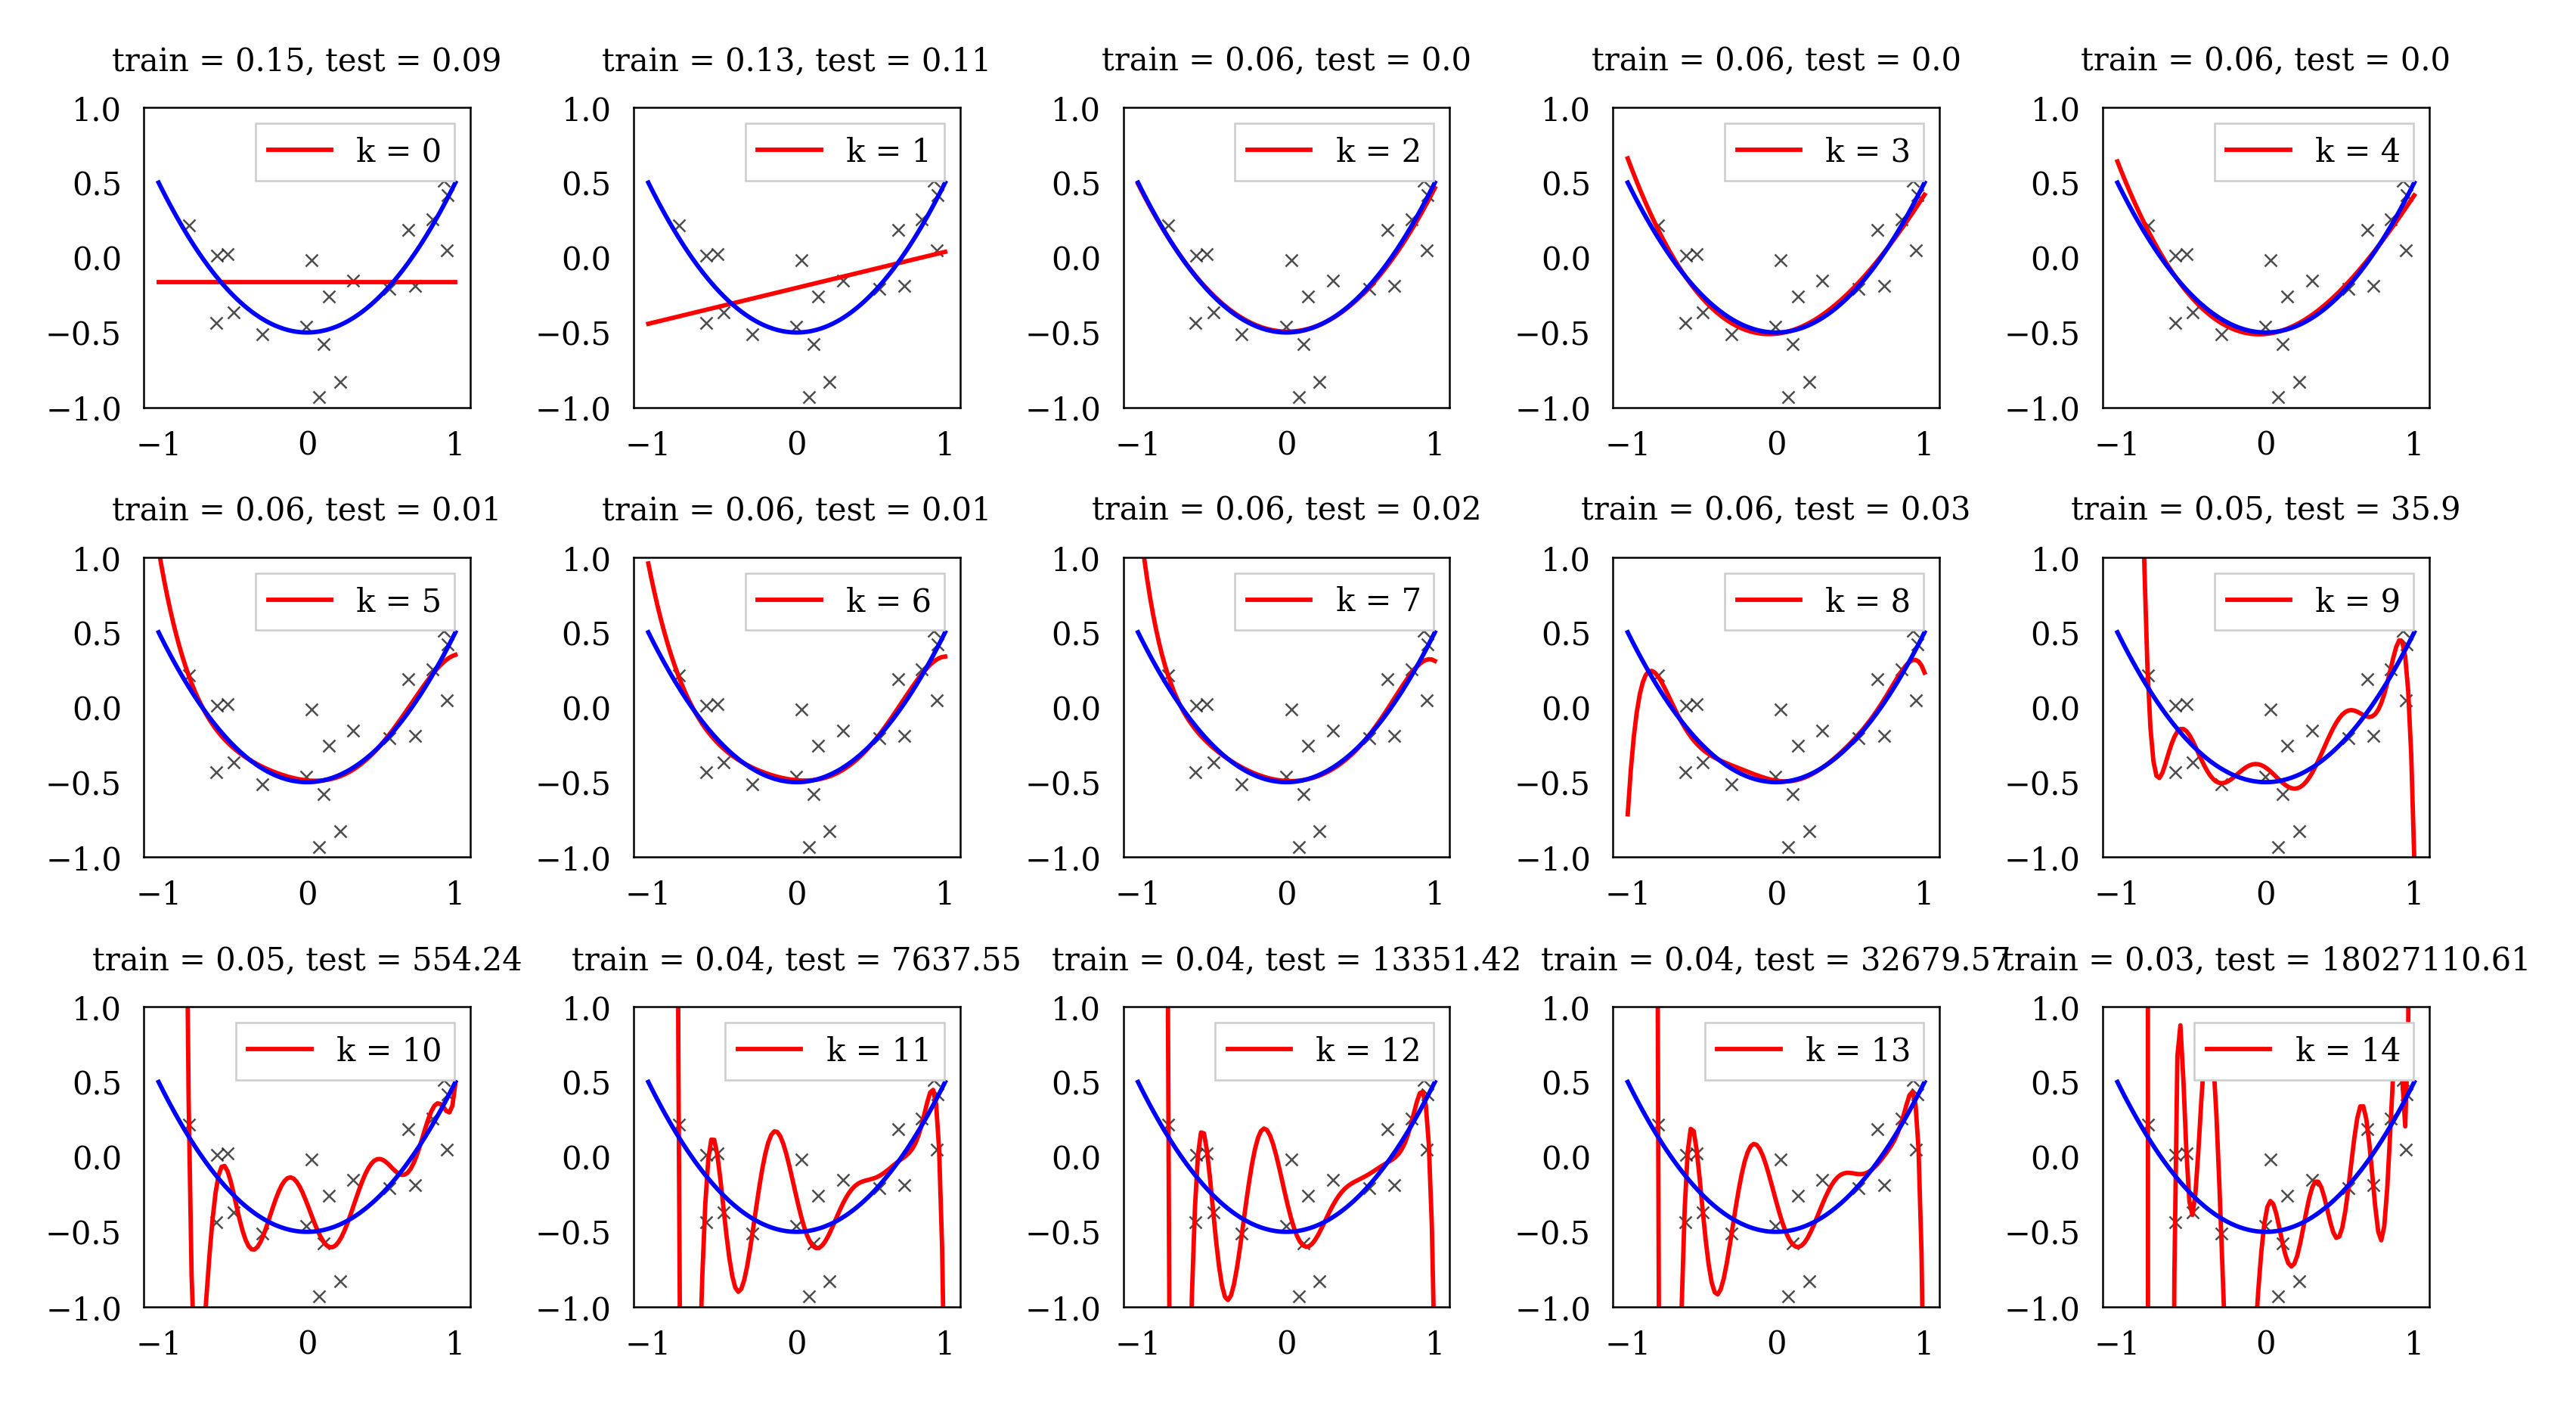

In [ ]:
# fig settings
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=big_rectangle, gridspec_kw = inner_space)

# constants
x_axis = np.linspace(-1, 1, 100)
y_axis = x_axis**2 - 0.5
kmax = 16
n = 20

# samples
x = np.sort(np.random.uniform(-1, 1, n))
y = - 0.5 + x**2 + np.random.normal(scale = 0.25, size=n)

# format data
X = x.reshape(-1, 1)
X_polynom = X**0
x_axis_reshaped = x_axis.reshape(-1, 1)
x_axis_polynom = x_axis_reshaped**0

for i, ax in zip(range(1,kmax),  axs.ravel()):
  # train model
  lin_reg = LinearRegression()
  lin_reg.fit(X_polynom,y)
  coef = np.hstack([lin_reg.coef_[0:-1], lin_reg.intercept_])

  # plot
  ax.set_ylim([-1, 1])
  plt.sca(ax)
  plt.plot(x, y, 'xk', alpha=0.7)
  plt.plot(x_axis, np.polyval(coef, x_axis), color='r', label = 'k = ' + str(i-1))
  plt.plot(x_axis, y_axis, color='b')
  ax.legend(loc='upper right')
  plt.title('train = ' + str(round(mse(lin_reg.predict(X_polynom), y),2))
          + ', test = ' + str(round(mse(lin_reg.predict(x_axis_polynom), y_axis),2)), )

  # initialize next step
  X_polynom = np.hstack([X**i, X_polynom])
  x_axis_polynom = np.hstack([x_axis_reshaped**i, x_axis_polynom])

plt.savefig('fig21.svg')
files.download("fig21.svg")

plt.show()


## Figure 2.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

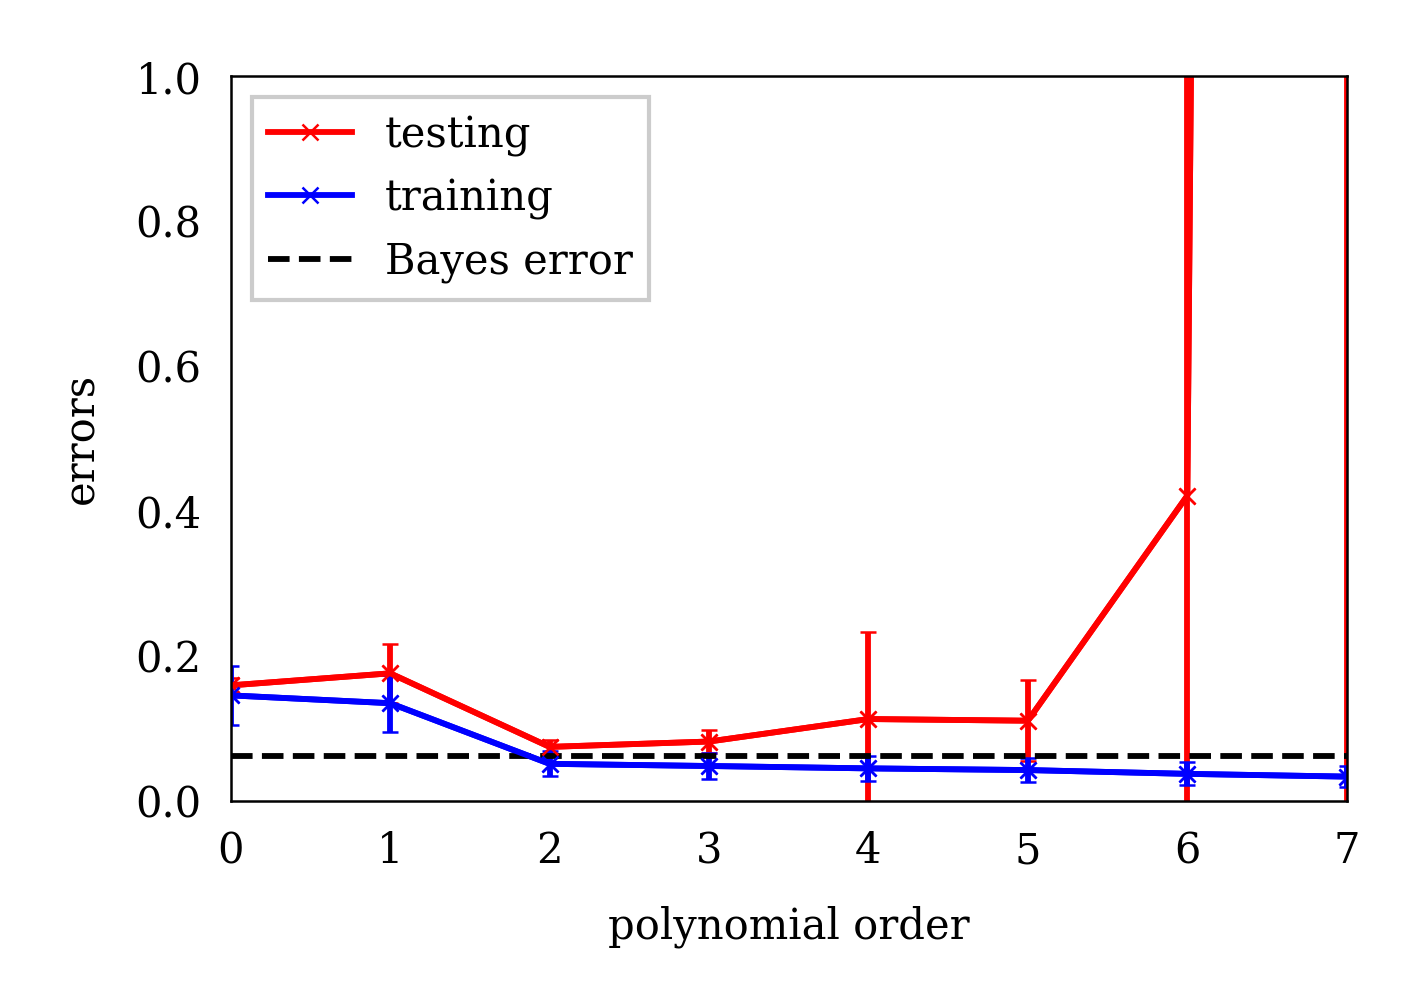

In [ ]:
Xgrid = np.arange(-1, 1.001, 0.001).reshape(-1, 1)

n = 20
std_noise = 0.25
nrep = 32

training_errors = np.zeros((nrep, 8))
testing_errors = np.zeros((nrep, 8))

for irep in range(nrep):
    Xsample = np.random.rand(n,1)*2-1
    Ygrid = Xgrid**2 - 0.5
    Ygrid_with_noise = Xgrid**2 - 0.5 + np.random.randn(len(Ygrid),1) * std_noise
    Ysample = Xsample**2 - 0.5 + np.random.randn(n,1) * std_noise

    kmax = 7
    Xdata = np.ones((n,1))
    Xgriddata = np.ones((len(Xgrid),1))

    for i in range(kmax+1):
        wdata = np.linalg.inv(Xdata.T @ Xdata + n * np.eye(Xdata.shape[1]) * 1e-12) @ Xdata.T @ Ysample
        Ygrid_prediction = Xgriddata @ wdata
        training_errors[irep, i] = np.mean((Xdata @ wdata - Ysample)**2)
        testing_errors[irep, i] = std_noise**2 + np.mean((Ygrid_prediction - Ygrid)**2)
        Xdata = np.hstack((Xdata, Xsample**(i+1)))
        Xgriddata = np.hstack((Xgriddata, Xgrid**(i+1)))

plt.plot(np.arange(kmax + 1), np.mean(testing_errors, axis=0), '-rx')
plt.plot(np.arange(kmax + 1), np.mean(training_errors, axis=0), '-bx')

plt.errorbar(np.arange(kmax + 1), np.mean(testing_errors, axis=0), yerr=np.std(testing_errors, axis=0), fmt='-rx')
plt.errorbar(np.arange(kmax + 1), np.mean(training_errors, axis=0), yerr=np.std(training_errors, axis=0), fmt='-bx')
plt.plot(np.arange(kmax + 1), np.ones(kmax + 1) * (std_noise ** 2), 'k--')

plt.axis([0, kmax, 0, 1])
plt.xlabel('polynomial order')
plt.ylabel('errors')
plt.legend(['testing', 'training', 'Bayes error'], loc="upper left")

plt.savefig('fig22.svg')
files.download("fig22.svg")

plt.show()


# Chapitre 3

## Figure 3.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

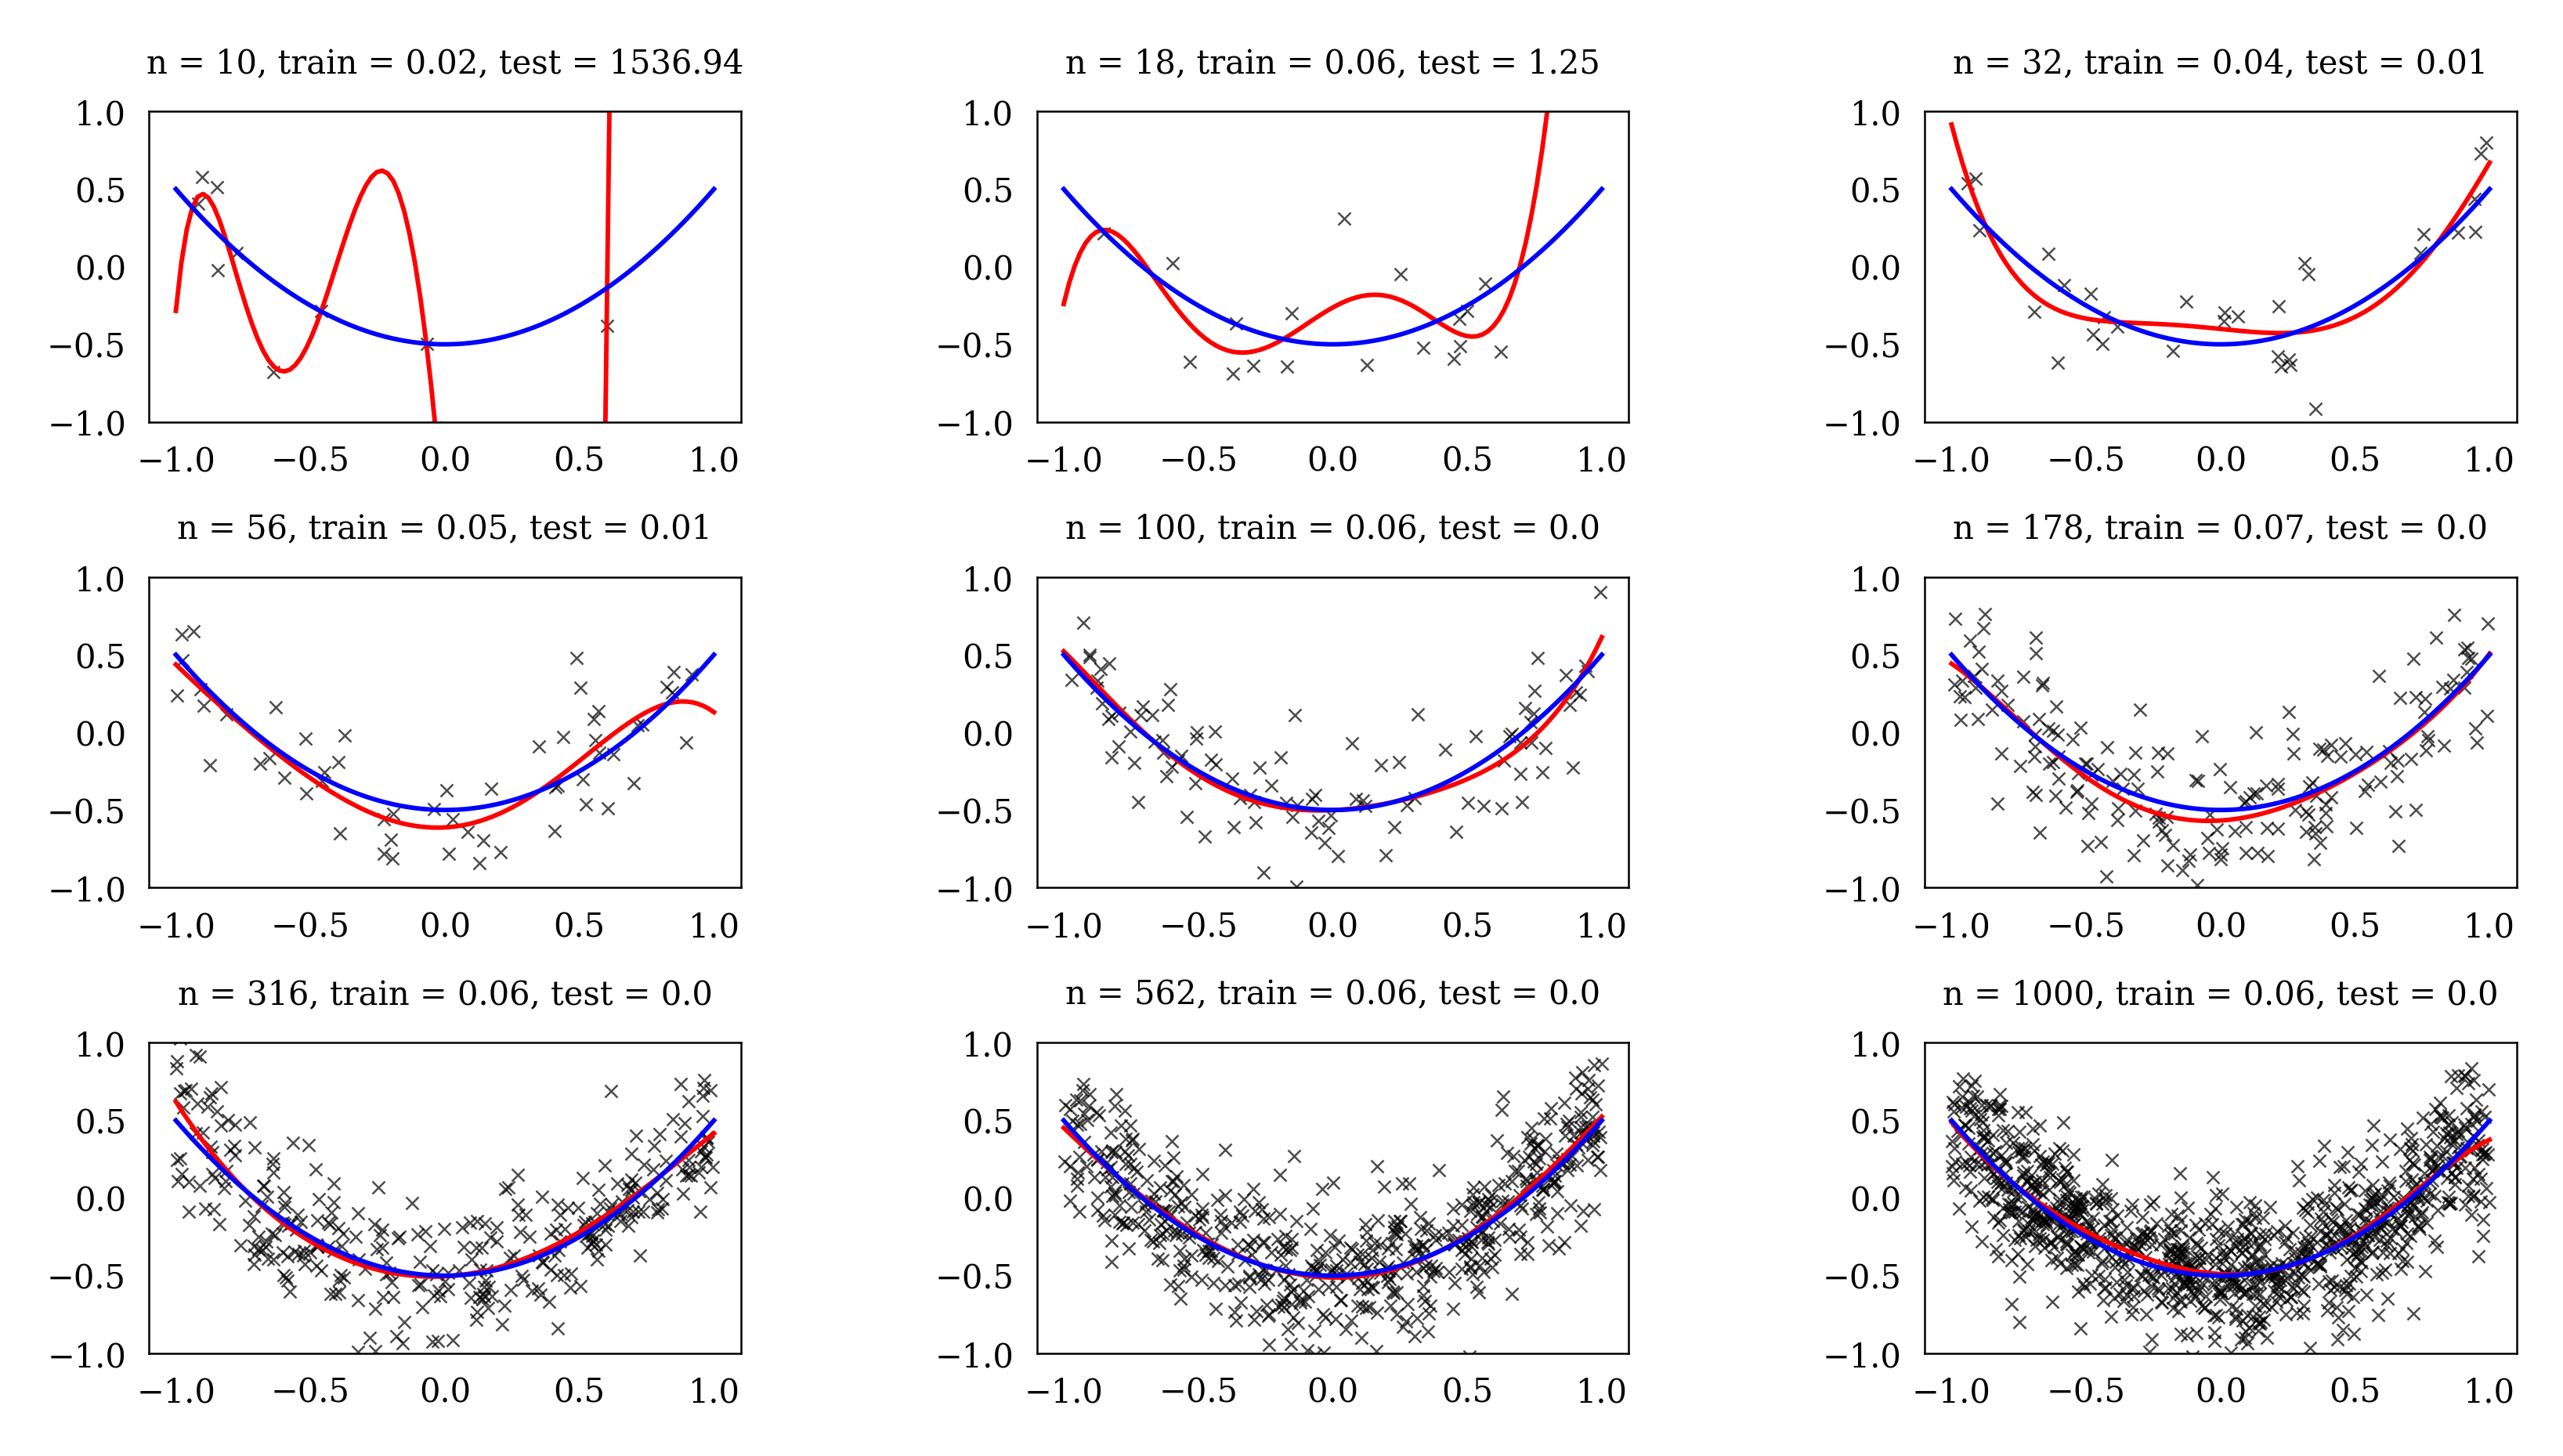

In [ ]:
# fig settings
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=big_rectangle, gridspec_kw = inner_space)

#constants
x_axis = np.linspace(-1, 1, 100)
y_axis = x_axis**2 - 0.5
k = 5
n = [10,18,32,56,100,178,316,562,1000]

for i, ax in zip(n,  axs.ravel()):
    #samples
    x = np.sort(np.random.uniform(-1, 1, i))
    y = - 0.5 + x**2 + np.random.normal(scale = 0.25, size=i)

    # format data
    X = x.reshape(-1, 1)
    X_polynom = np.hstack([X**i for i in range(5, -1, -1)])
    x_axis_reshaped = x_axis.reshape(-1, 1)
    x_axis_polynom = np.hstack([x_axis_reshaped**i for i in range(5, -1, -1)])

    #train model
    lin_reg = LinearRegression()
    lin_reg.fit(X_polynom,y)
    coef = np.hstack([lin_reg.coef_[0:-1], lin_reg.intercept_])

    # plot
    ax.set_ylim([-1, 1])
    plt.sca(ax)
    plt.plot(x, y, 'xk', alpha=0.7)
    line = plt.plot(x_axis, np.polyval(coef, x_axis), color='r')
    plt.plot(x_axis, y_axis, color='b')
    plt.title('n = ' + str(i) +
              ', train = ' + str(round(mse(lin_reg.predict(X_polynom), y),2)) +
              ', test = ' + str(round(mse(lin_reg.predict(x_axis_polynom), y_axis),2)))

plt.savefig('fig31.svg')
files.download("fig31.svg")

plt.show()

## Figure 3.2



```
addpath ..


clear all
seed=1;
randn('state',seed);
rand('state',seed);
std_noise = .25;

Xgrid = (-1:.001:1)';
ns = round(10.^[1:.25:5]);
Ygrid = Xgrid.^2 - .5;
Ygrid_with_noise = Xgrid.^2 - .5 + randn(length(Ygrid),1) * std_noise;
nrep = 32;
for irep=1:nrep
    for in=1:length(ns)
        n = ns(in);
        
        Xsample = rand(n,1)*2-1;
        Ysample = Xsample.^2 - .5 + randn(n,1) * std_noise;
        
        
        
        kmax = 5;
        Xdata = ones(n,1);
        Xgriddata = ones(length(Xgrid),1);
        
        for i=0:kmax
            wdata = (Xdata' * Xdata) \ ( Xdata' * Ysample);
            Ygrid_prediction = Xgriddata * wdata;
            train_error(irep,in) = mean((Xdata*wdata-Ysample).^2);
            insample_error(irep,in) = mean((Xdata*wdata-( Xsample.^2 - .5)).^2);
            test_error(irep,in) = std_noise^2+mean((Ygrid_prediction-Ygrid).^2);
            
            if i<kmax
                Xdata = [ Xdata, Xsample.^(i+1) ];
                Xgriddata = [ Xgriddata, Xgrid.^(i+1) ];
            end
        end
    end
end

try
    ccc=openfig('polynomial_regression_varying_n_rate.fig');
catch
    disp('missing figure file')
end

subplot(1,2,1);
errorbar(log10(ns),log10(mean(insample_error,1) ),log10(mean(insample_error,1) - std(insample_error,1)  )-log10(mean(insample_error,1)),log10(mean(insample_error,1) + std(insample_error,1)  )-log10(mean(insample_error,1)),'b','linewidth',2); hold on;
plot(log10(ns),log10(std_noise.^2 * (kmax+1)./ns),'r','linewidth',2); hold off;
set(gca,'fontsize',16)
xlabel('log_{10}(n)')
ylabel('log_{10}(excess risk)')
legend('excess risk','\sigma^2 d / n');
title('Fixed design','FontWeight','normal')
axis([1 5 -6 4])


subplot(1,2,2);
errorbar(log10(ns),log10(mean(test_error,1)-std_noise.^2),log10(max(mean(test_error,1)-std(test_error,1)-std_noise.^2,1e-12))-log10(mean(test_error,1)-std_noise.^2),log10(mean(test_error,1)+std(test_error,1)-std_noise.^2)-log10(mean(test_error,1)-std_noise.^2) ,'b','linewidth',2); hold on;
plot(log10(ns),log10(std_noise.^2 * (kmax+1)./ns),'r','linewidth',2); hold off;
set(gca,'fontsize',16)
xlabel('log_{10}(n)')
ylabel('log_{10}(excess risk)')
legend('excess risk','\sigma^2 d / n');
title('Random design','FontWeight','normal')
axis([1 5 -6 4])

try
    print('-depsc', 'polynomial_regression_varying_n_rate.eps');
    close(ccc)
catch
    disp('missing figure file')
end

```



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

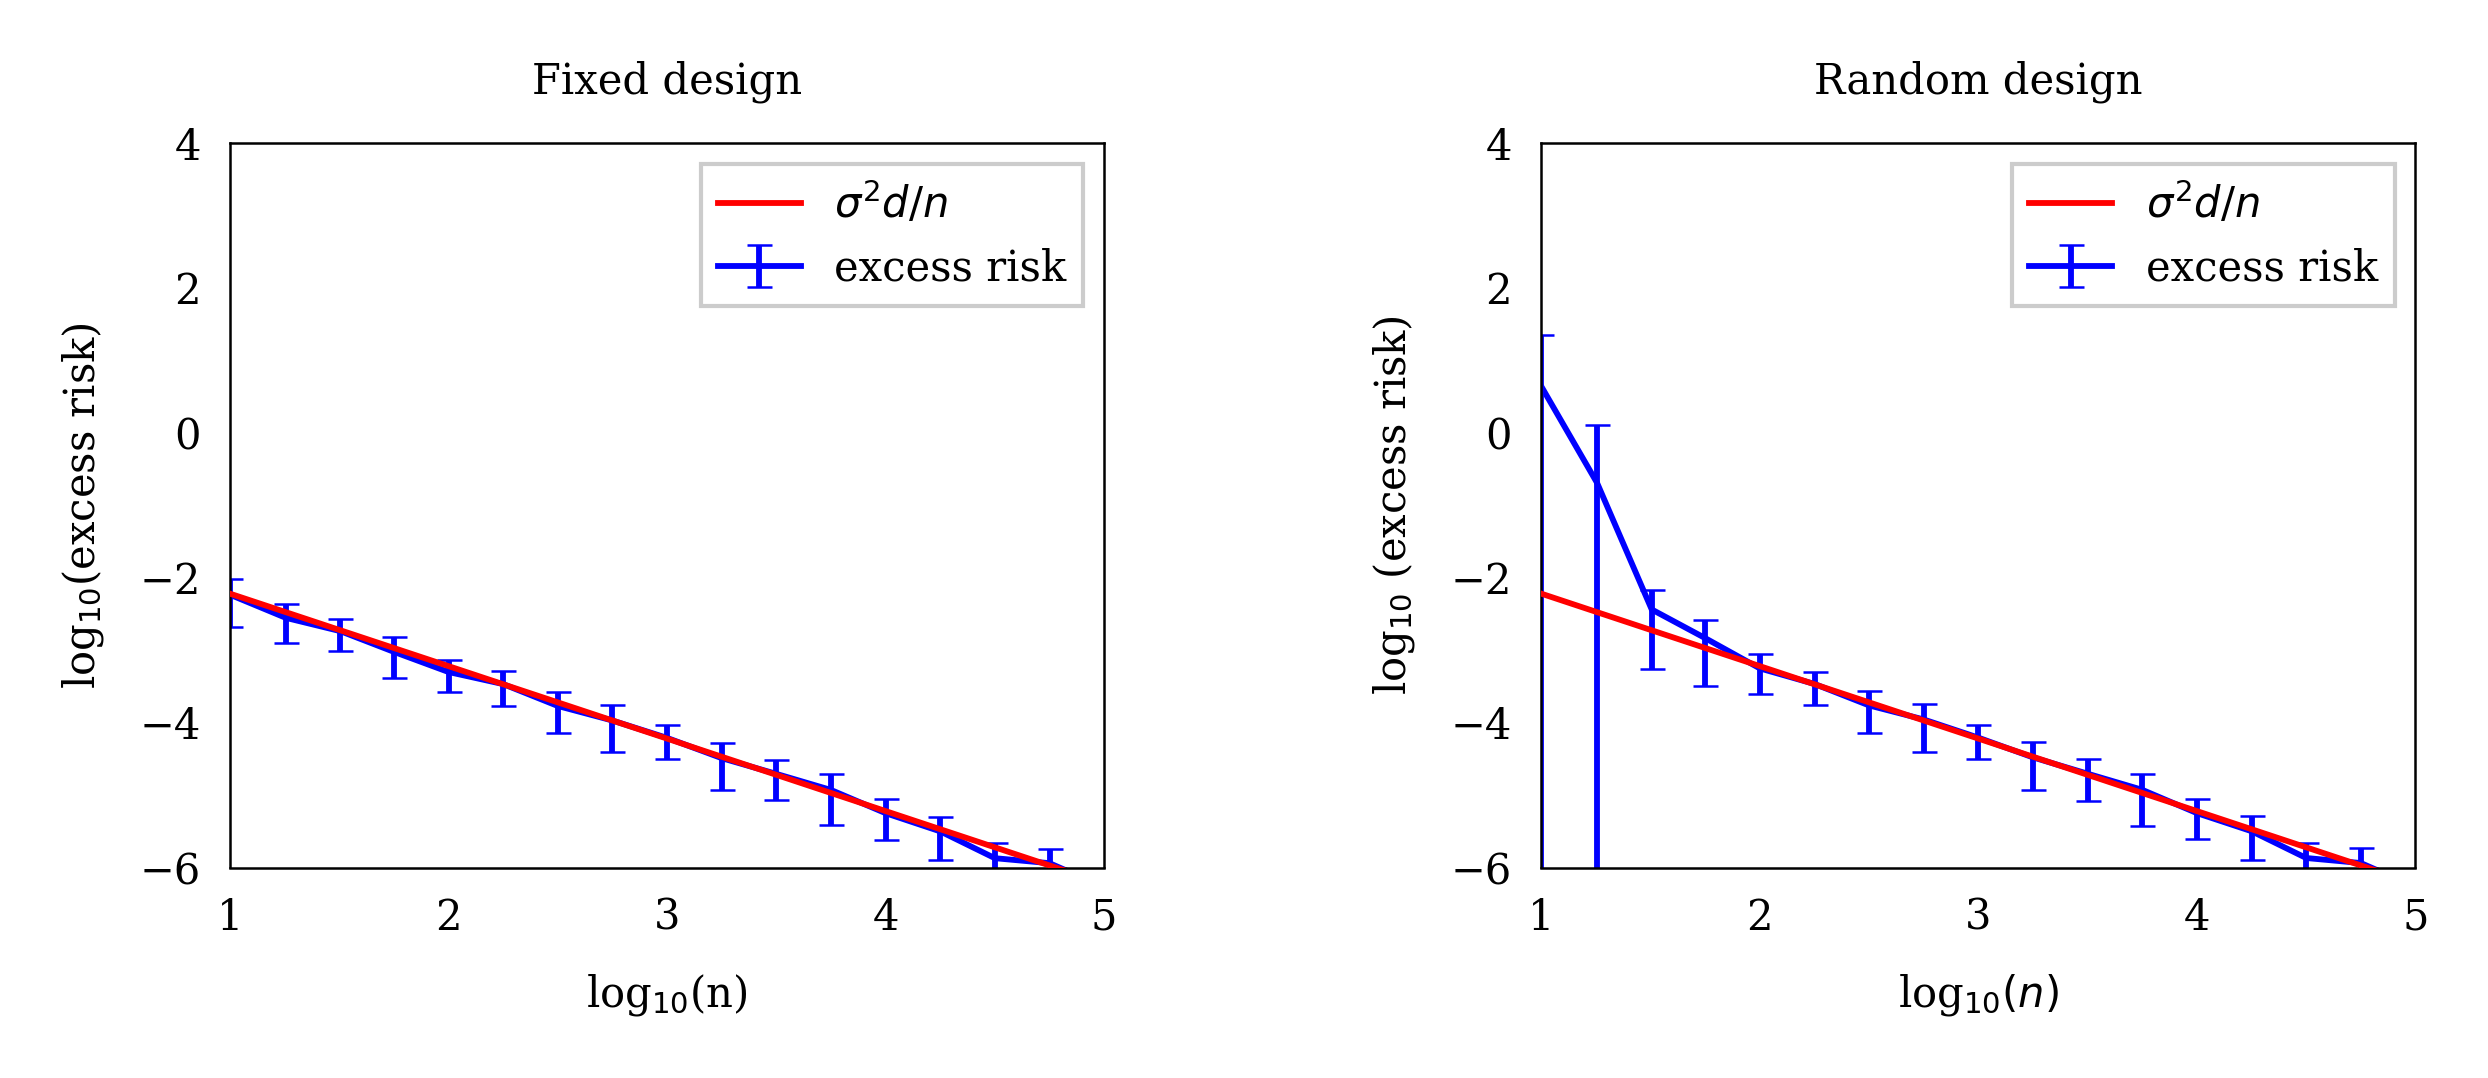

In [ ]:
Xgrid = np.linspace(-1, 1, 1001)
ns = np.round(10**np.arange(1, 5.25, 0.25))
Ygrid = Xgrid**2 - 0.5
std_noise = 0.1
Ygrid_with_noise = Xgrid**2 - 0.5 + np.random.randn(len(Ygrid)) * std_noise
nrep = 32

train_error = np.zeros((nrep, len(ns)))
insample_error = np.zeros((nrep, len(ns)))
test_error = np.zeros((nrep, len(ns)))

for irep in range(nrep):
    for in_, n in enumerate(ns):
        Xsample = (np.random.rand(int(n)) * 2) - 1
        Ysample = Xsample**2 - 0.5 + np.random.randn(int(n)) * std_noise

        kmax = 5
        Xdata = np.ones((int(n), 1))
        Xgriddata = np.ones((len(Xgrid), 1))

        for i in range(kmax+1):
            wdata = np.linalg.inv(Xdata.T @ Xdata) @ (Xdata.T @ Ysample)
            Ygrid_prediction = Xgriddata @ wdata
            train_error[irep, in_] = np.mean((Xdata @ wdata - Ysample)**2)
            insample_error[irep, in_] = np.mean((Xdata @ wdata - (Xsample**2 - 0.5))**2)
            test_error[irep, in_] = std_noise**2 + np.mean((Ygrid_prediction - Ygrid)**2)

            if i < kmax:
                Xdata = np.hstack((Xdata, Xsample[:, np.newaxis]**(i+1)))
                Xgriddata = np.hstack((Xgriddata, Xgrid[:, np.newaxis]**(i+1)))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=medium_rectangle, gridspec_kw = inner_space)

ax1.errorbar(np.log10(ns),
             np.log10(np.mean(insample_error, axis=0)),
             yerr=np.vstack((np.abs(np.log10(np.mean(insample_error, axis=0) - np.std(insample_error, axis=0)) - np.log10(np.mean(insample_error, axis=0))),
                            np.log10(np.mean(insample_error, axis=0) + np.std(insample_error, axis=0)) - np.log10(np.mean(insample_error, axis=0)) )),
             fmt='b')
ax1.plot(np.log10(ns), np.log10(np.power(std_noise, 2) * (kmax + 1) / ns), 'r', zorder=15)
ax1.set_xlabel('log$_{10}$(n)')
ax1.set_ylabel('log$_{10}$(excess risk)')
ax1.legend(['$\sigma^2 d / n$', 'excess risk'])
ax1.set_title('Fixed design')
ax1.set_xlim([1, 5])
ax1.set_ylim([-6, 4])

ax2.errorbar(np.log10(ns),
             np.log10(np.mean(test_error, axis=0) - np.power(std_noise, 2)),
             yerr=np.vstack((
                np.abs(np.log10(np.maximum(np.mean(test_error, axis=0) - np.std(test_error, axis=0) - np.power(std_noise, 2), 1e-12)) - np.log10(np.mean(test_error, axis=0) - np.power(std_noise, 2))),
                np.log10(np.mean(test_error, axis=0) + np.std(test_error, axis=0) - np.power(std_noise, 2)) - np.log10(np.mean(test_error, axis=0) - np.power(std_noise, 2))
                 )),
             fmt='b')
ax2.plot(np.log10(ns), np.log10(np.power(std_noise, 2) * (kmax + 1) / ns), 'r', zorder=15)
ax2.set_xlabel('log$_{10}(n)$')
ax2.set_ylabel('log$_{10}$ (excess risk)')
ax2.legend(['$\sigma^2 d / n$', 'excess risk'])
ax2.set_title('Random design')
ax2.set_xlim([1, 5])
ax2.set_ylim([-6, 4])

plt.savefig('fig32.svg')
files.download("fig32.svg")

plt.show()


## Figure 3.3



```
addpath ..

clear all
seed=1;
randn('state',seed);
rand('state',seed);
std_noise = 1;

try
    ccc=openfig('polynomial_regression_ridge.fig');
catch
    disp('missing figure file')
end


Xgrid = (-1:.001:1)';
n = 300;
lambdas = 10.^[-6:.25:2];
Ygrid = Xgrid.^2 - .5;
Ygrid_with_noise = Xgrid.^2 - .5 + randn(length(Ygrid),1) * std_noise;
nrep = 32;
for irep=1:nrep
    
    
    Xsample = rand(n,1)*2-1;
    Ysample = Xsample.^2 - .5 + randn(n,1) * std_noise;
    
    
    
    kmax = 5;
    Xdata = ones(n,1);
    Xgriddata = ones(length(Xgrid),1);
    
    for i=0:kmax
        if i<kmax
            Xdata = [ Xdata, Xsample.^(i+1) ];
            Xgriddata = [ Xgriddata, Xgrid.^(i+1) ];
        end
    end
    
    for ilambda = 1:length(lambdas)
        lambda= lambdas(ilambda);
        w = (Xdata' * Xdata + n* lambda * eye(size(Xdata,2))) \ ( Xdata' * Ysample);
        Ygrid_prediction = Xgriddata * w;
        excess_test_error(irep,ilambda) =  mean((Ygrid_prediction-Ygrid).^2);
    end
end

wast = (Xgriddata' * Xgriddata ) \ ( Xgriddata' * Ygrid);
bias = lambdas;
variance = lambdas;
Sigma = Xdata' * Xdata / n;

for ilambda = 1:length(lambdas)
    lambda= lambdas(ilambda);
    
    bias(ilambda) = lambda^2 * wast'* ( Sigma * inv(Xdata' * Xdata/n +   lambda * eye(size(Xdata,2)))^2 ) * wast;
    variance(ilambda) = std_noise.^2 / n * trace( Sigma^2 * inv(Xdata' * Xdata/n +   lambda * eye(size(Xdata,2)))^2);
    
end
errorbar(log10(lambdas),log10(mean(excess_test_error,1)),log10(mean(excess_test_error,1)+std(excess_test_error,1))-log10(mean(excess_test_error,1)),log10(mean(excess_test_error,1)+std(excess_test_error,1))-log10(mean(excess_test_error,1)),'b','linewidth',2); hold on;
plot(log10(lambdas),log10(bias ),'g','linewidth',2);
plot(log10(lambdas),log10( variance),'k','linewidth',2);
plot(log10(lambdas),log10(bias + variance),'r','linewidth',2); hold off;
set(gca,'fontsize',24)
xlabel('log_{10}(\lambda)')
ylabel('log_{10}(excess risk)')
legend('estimated excess risk','theoretical bias','theoretical variance','bias+variance','location','NorthEastOutside');
title('polynomial regression (dim = 5) - Ridge','FontWeight','normal')

axis([min(log10(lambdas)) max(log10(lambdas)) -5 -1])

try
    print('-depsc', 'polynomial_regression_ridge.eps');
    close(ccc)
catch
    disp('missing figure file')
end
```



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

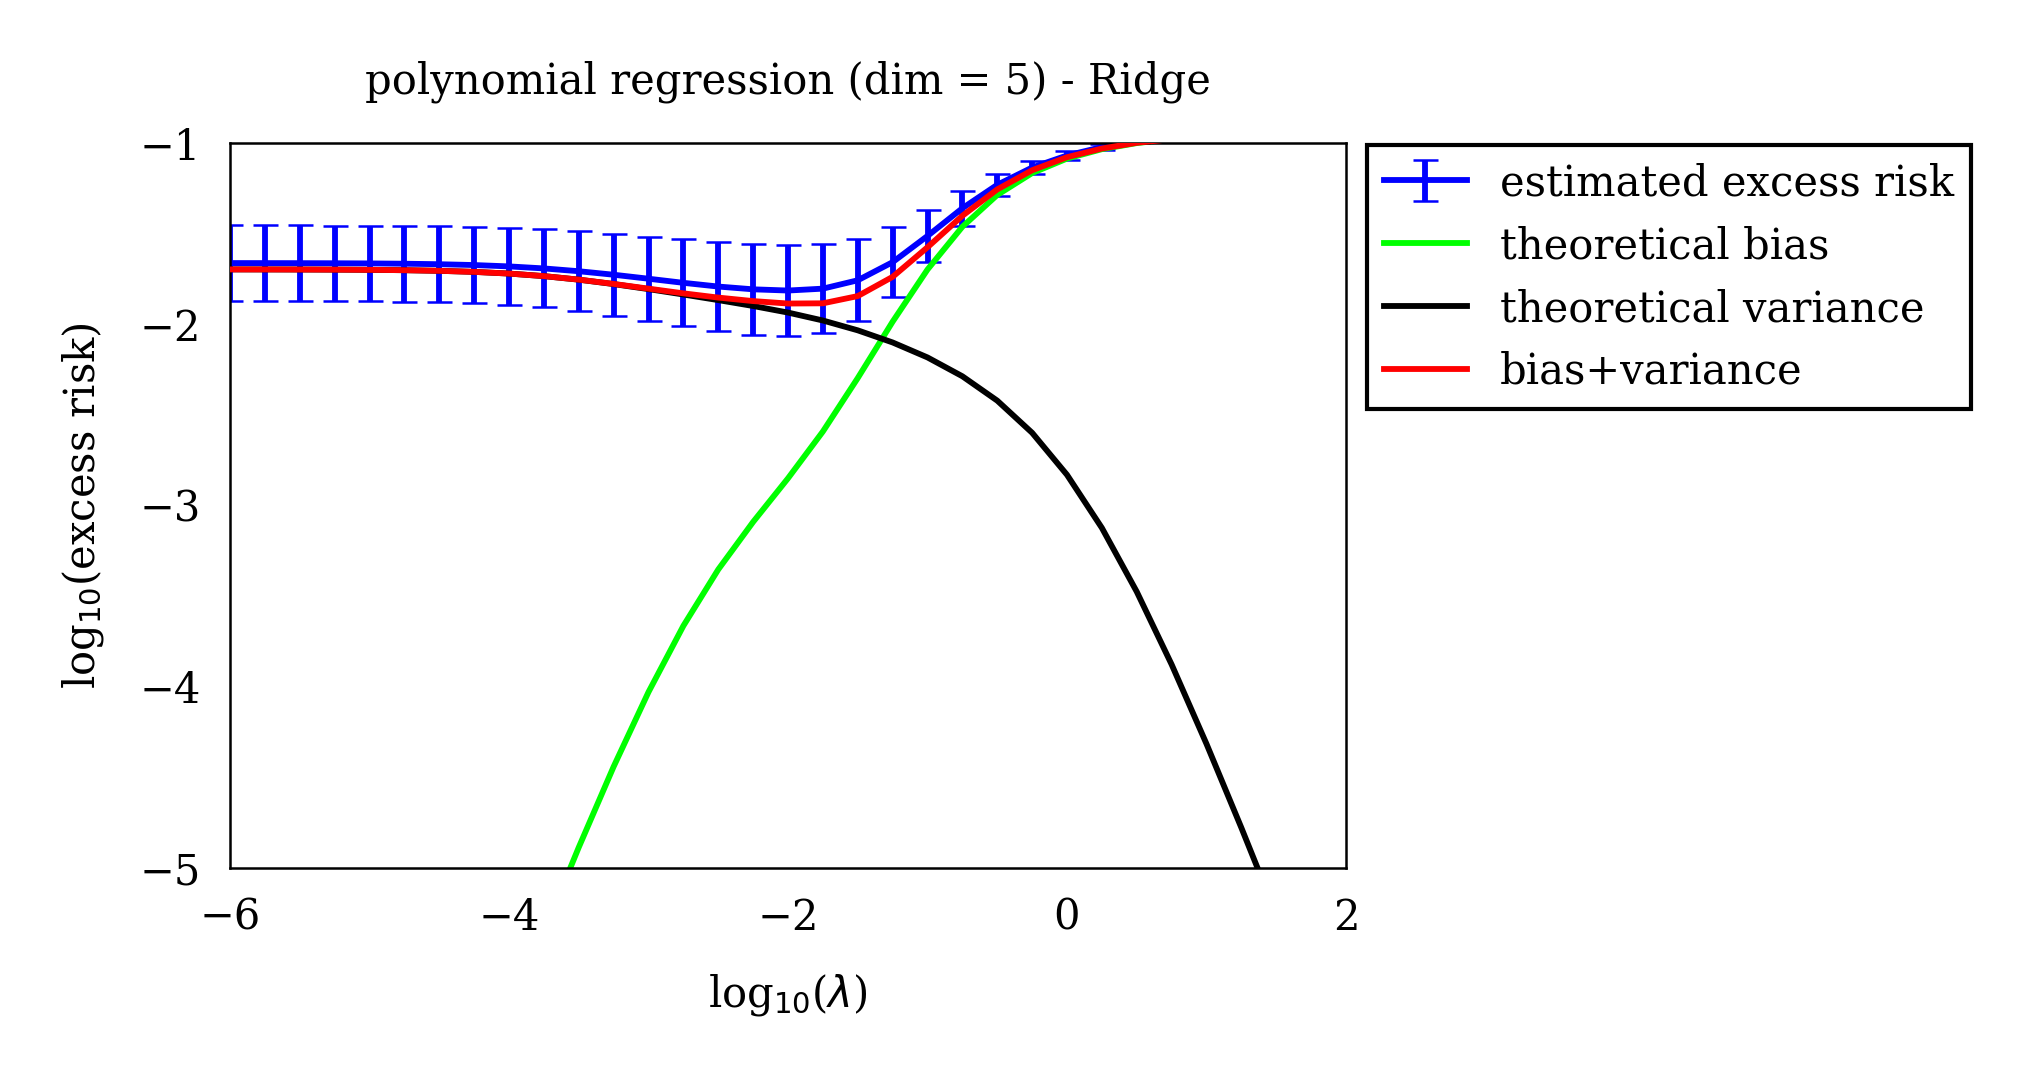

In [ ]:
std_noise = 1
Xgrid = np.arange(-1,1.001, 0.001)
Xgrid = Xgrid[..., None]
n = 300
lambdas = np.array(10**(np.arange(-6, 2.2, 0.25)))
Ygrid = Xgrid**2 - 0.5

Ynoise_rand = randn((Ygrid.shape[0]))
Ygrid_with_noise = Xgrid**2 - 0.5 + Ynoise_rand * std_noise

nrep = 32
# Initialise matrix outside the loop
excess_test_error = np.zeros((32, 33))

for irep in range(1, nrep+1):
    Xsample = np.random.random(n)*2-1
    Ysample = Xsample ** 2 - 0.5 + randn(n) * std_noise
    Xsample = Xsample[..., None]
    kmax = 5
    Xdata = np.ones((n, 1))
    Xgriddata = np.ones((Xgrid.shape[0],1))
    # Horizontal stacking in loop
    for i in range(0, kmax+1):
        if i < kmax:
            Xdata = np.hstack((Xdata, Xsample**(i+1)))
            Xgriddata = np.hstack((Xgriddata, Xgrid**(i+1)))
    # wast calculations
    for ilambda in range(1, len(lambdas)+1):
        lamb = lambdas[ilambda-1]
        matrix1 = np.matmul(np.transpose(Xdata), Xdata) + n * lamb * np.eye(Xdata.shape[1])
        matrix2 = np.matmul(np.transpose(Xdata), Ysample)
        w = np.linalg.solve(matrix1, matrix2)
        Ygrid_prediction = np.matmul(Xgriddata, w)
        excess_test_error[irep-1,ilambda-1] = np.mean(np.power(Ygrid_prediction.reshape(2001,1) - Ygrid,2))

op1 = np.matmul(np.transpose(Xgriddata), Xgriddata)
op2 = np.matmul(np.transpose(Xgriddata), Ygrid)

wast = np.linalg.solve(op1, op2)
bias = lambdas
variance = lambdas
Sigma = np.matmul(np.transpose(Xdata), Xdata)/n

bias = np.zeros((len(lambdas),))
variance = np.zeros((len(lambdas), ))

# Bias and variance calculations
for ilambda in range(0, len(lambdas)):
    lamb = lambdas[ilambda]
    bias1 = lamb**2 * np.transpose(wast)
    bias2 = np.matmul(Sigma, np.linalg.matrix_power(np.linalg.inv(np.matmul(np.transpose(Xdata)
                                                ,Xdata)/n + lamb*np.eye(Xdata.shape[1])), 2))
    bias[ilambda] = np.matmul(np.matmul(bias1, bias2), wast)

    var1 = np.linalg.matrix_power(np.linalg.inv(np.matmul(np.transpose(Xdata), Xdata)/n + lamb*np.eye(Xdata.shape[1])), 2)
    variance[ilambda] = std_noise**2/n * np.trace(np.matmul(np.linalg.matrix_power(Sigma, 2), var1))

# Rename for clarity
x = np.log10(lambdas)
y = np.log10(np.mean(excess_test_error,0))
neg = np.log10(np.mean(excess_test_error,0)+np.std(excess_test_error,0))-np.log10(np.mean(excess_test_error,0))
pos = np.log10(np.mean(excess_test_error,0)+np.std(excess_test_error,0))-np.log10(np.mean(excess_test_error,0))

# Add error bar plot
line4,_,_ = plt.errorbar(x, y, yerr=(neg), color='b', label='estimated excess risk')

# Add Line plots
line1,=plt.plot(np.log10(lambdas), np.log10(bias),'lime', label='theoretical bias')
line2,=plt.plot(np.log10(lambdas), np.log10(variance),'k', label='theoretical variance')
line3,=plt.plot(np.log10(lambdas), np.log10(bias+variance),'r', label='bias+variance', zorder=20)
fig1 = plt.gcf()

# Ticks
plt.gca()
plt.xticks(np.arange(np.min(np.log10(lambdas)), np.max(np.log10(lambdas))+1,step=2))
plt.yticks(np.arange(-5, 0))

# Labels
plt.xlabel(r'log$_{10}$($\lambda$)')
plt.ylabel(r'log$_{10}$(excess risk)')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2]
leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fancybox=False, bbox_to_anchor=(1, 1.025))
leg.get_frame().set_edgecolor('k')

# Title, axis limits and save figure
plt.title('polynomial regression (dim = 5) - Ridge')
plt.axis([np.min(np.log10(lambdas)), np.max(np.log10(lambdas)), -5, -1])

plt.savefig('fig33.svg')
files.download("fig33.svg")

plt.show()

# Chapitre 4



### Fig 4.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

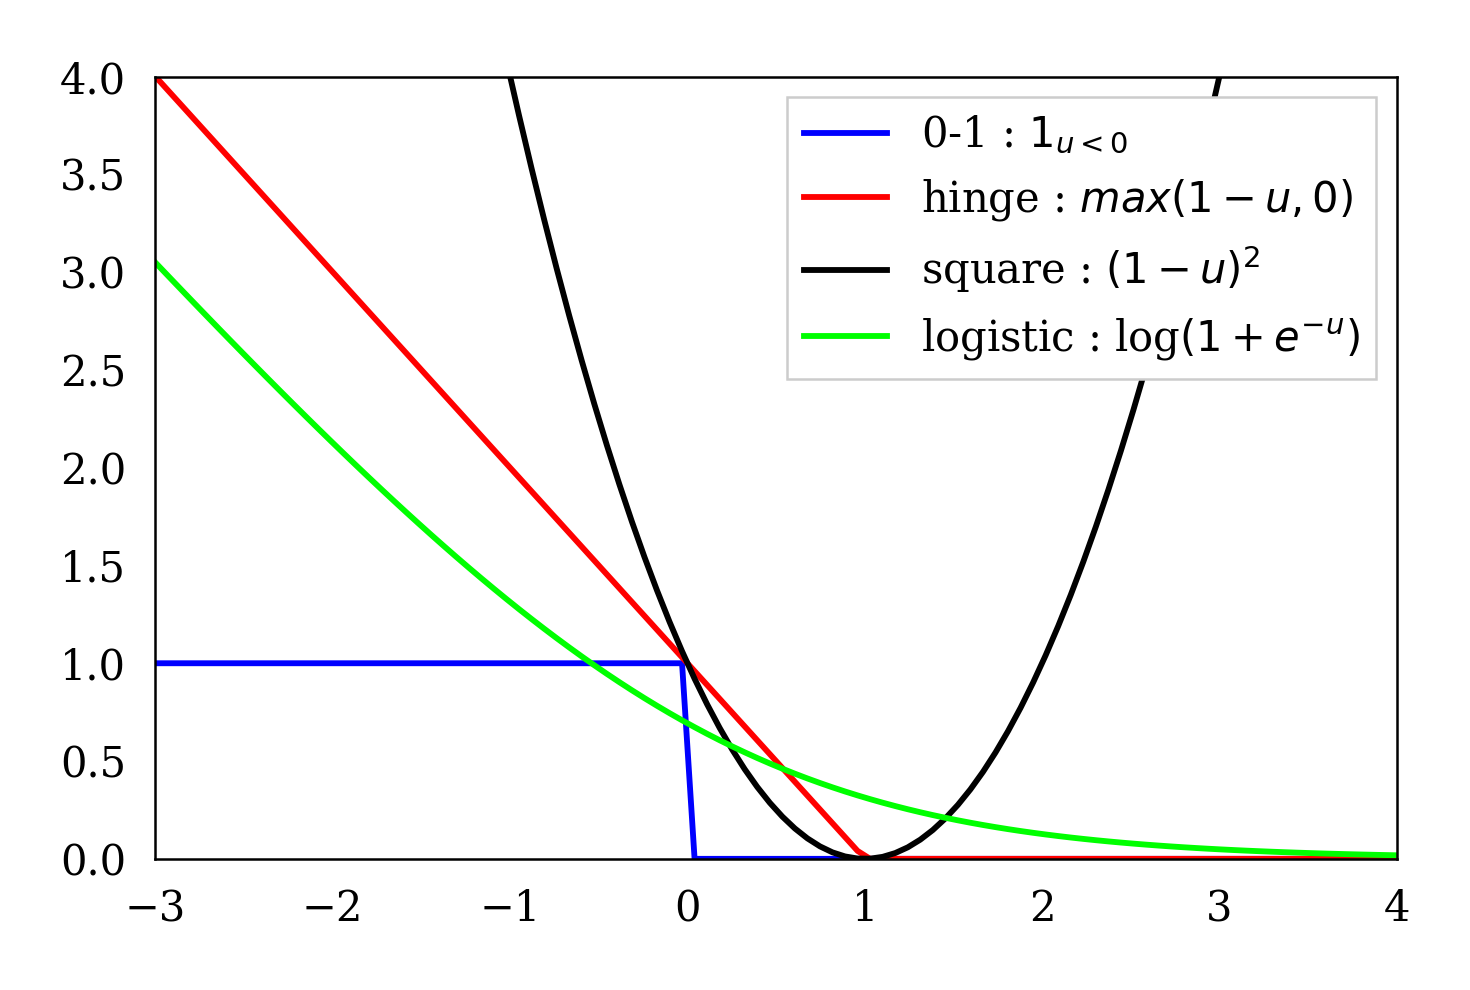

In [ ]:
#Support
min = -3
max = 4
x = np.linspace(start=min, stop=max, num=100)

#Plot setup
fig, ax = plt.subplots(1,1, tight_layout=True)
ax.set_ylim([0, max])
ax.set_xlim([min, max])

#Plot figure
plt.plot(x, zero_one(x), 'b', label="0-1 : $1_{u<0}$")
plt.plot(x, hinge(x), 'r', label="hinge : $max(1-u,0)$")
plt.plot(x, square(x), 'k', label="square : $(1-u)^2$")
plt.plot(x, logis(x), 'lime', label="logistic : log$(1+e^{-u})$")
ax.legend(loc='upper right')

plt.savefig('fig41.svg')
files.download("fig41.svg")

### Fig 4.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

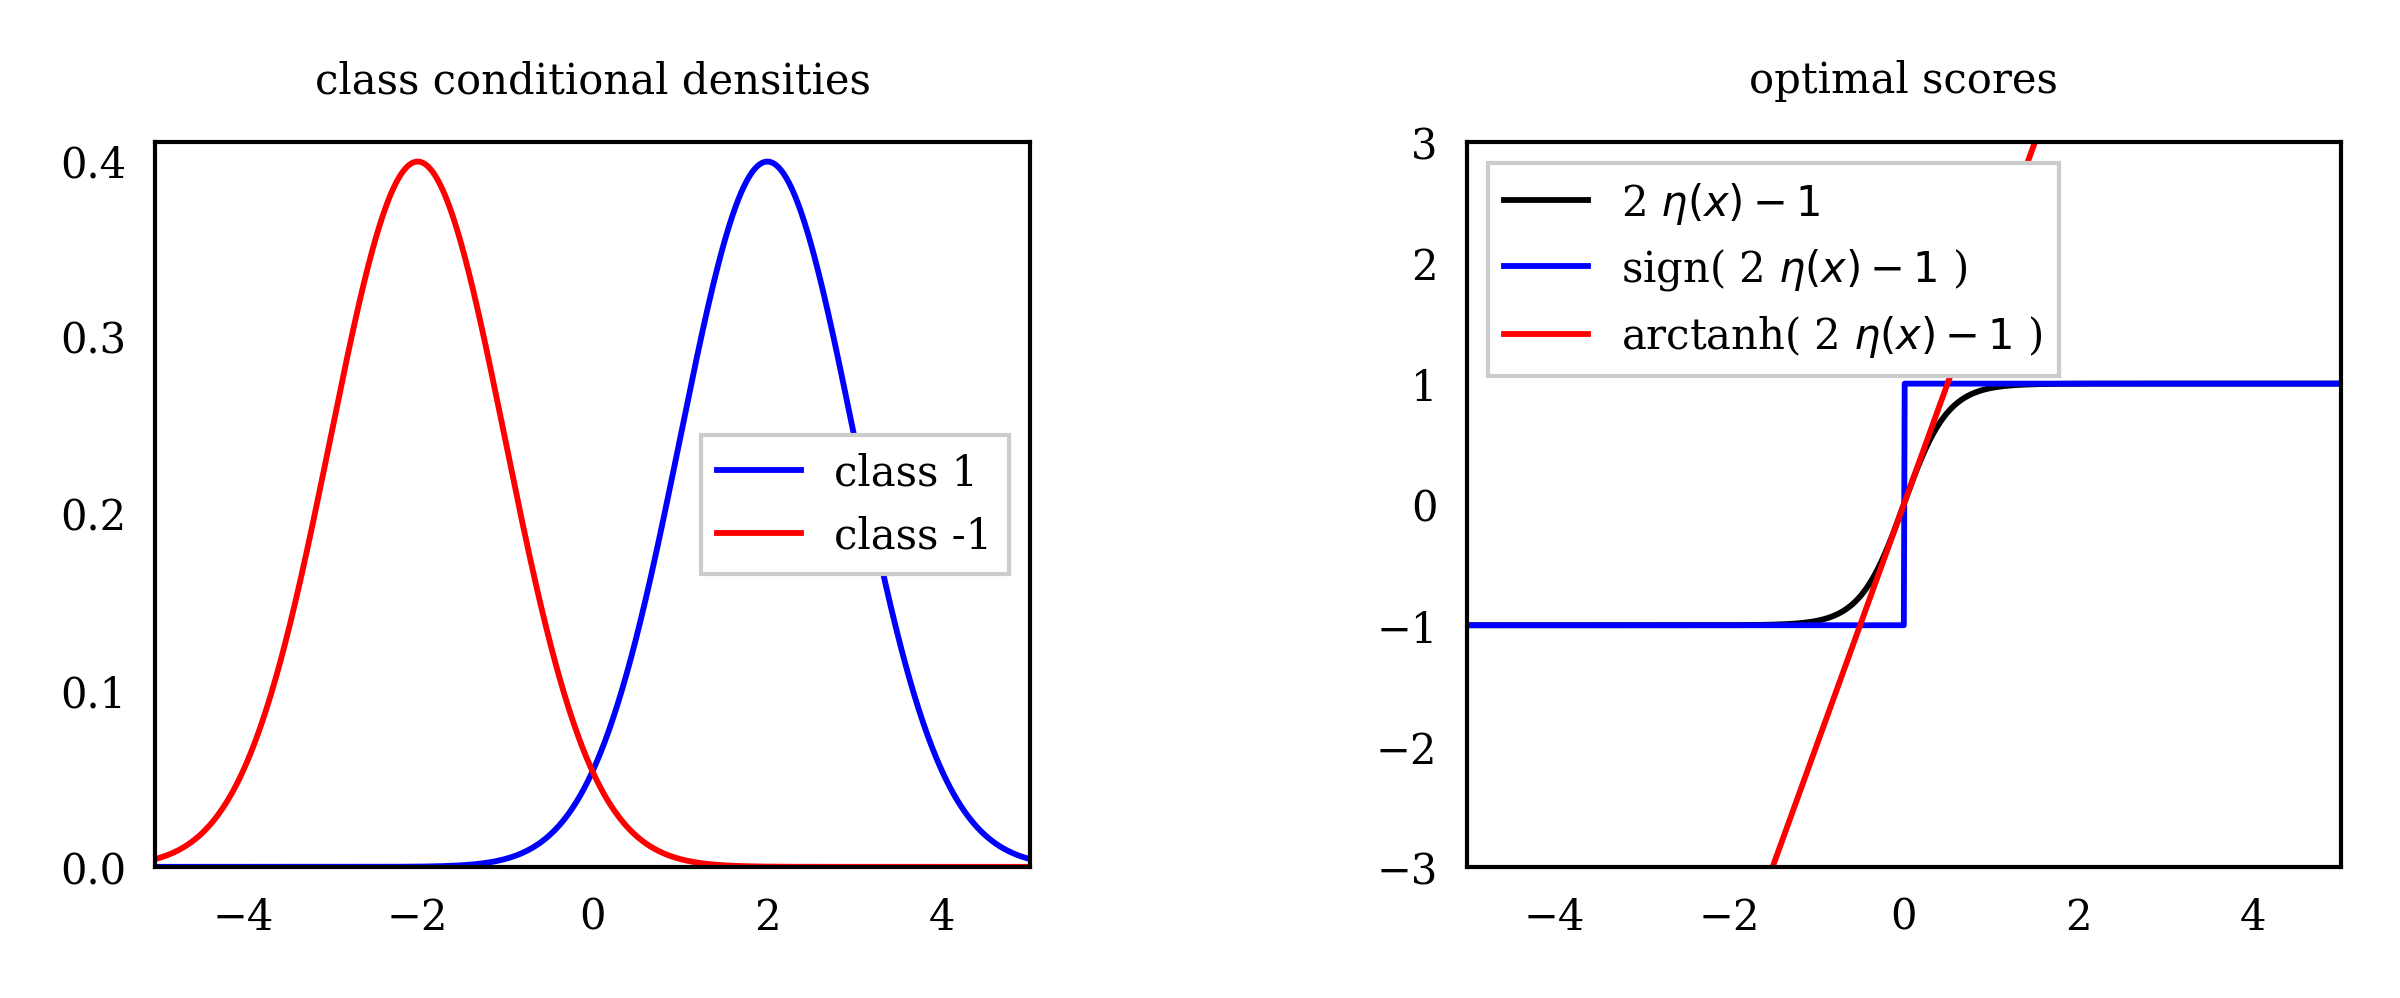

In [ ]:
x = np.arange(-5, 5.01, 0.01)

mu1 = 2
mu2 = -2
sigma1 = sigma2 = 1
pdf1 = 1 / np.sqrt(2 * np.pi) / sigma1 * np.exp( - (x - mu1) ** 2 / 2 / sigma1 ** 2)
pdf2 = 1 / np.sqrt(2 * np.pi) / sigma2 * np.exp( - (x - mu2) ** 2 / 2 / sigma2 ** 2)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=medium_rectangle, gridspec_kw = inner_space)

plt.sca(axs[0])
plt.plot(x, pdf1, 'b')
plt.plot(x, pdf2, 'r')
plt.legend(['class 1', 'class -1'])
plt.title('class conditional densities', fontweight='normal')
plt.axis([-5, 5, 0, 0.41])
plt.yticks(np.round(np.arange(0,0.41,0.1),1))

plt.sca(axs[1])
eta = pdf1 / (pdf1 + pdf2)
plt.plot(x, 2 * eta - 1, 'k')
plt.plot(x, np.sign(2 * eta - 1), 'b')
plt.plot(x, np.arctanh(2 * eta - 1), 'r')
plt.legend(['2 $\eta(x) - 1$', 'sign( 2 $\eta(x) - 1$ )', 'arctanh( 2 $\eta(x) - 1$ )'], loc='upper left')
plt.title('optimal scores', fontweight='normal')
plt.axis([-5, 5, -3, 3])

plt.savefig('fig42.svg')
files.download("fig42.svg")

plt.show()


# Chapter 5

### 5.1

In [ ]:
#Problem setup
n = 100
d = 1000
sd_noise = 0.25

#Design matrix Phi
def Phi(p): #p = power
    D = np.diag([np.sqrt(n/k**(p)) for k in range(1,d+1)])
    U = ortho_group.rvs(dim=d)
    Phi = U @ D @ U.T
    return Phi

def generateData(t, k):
    np.random.seed(1)
    Phi_k = Phi(p=k)
    H_k = (Phi_k.T @ Phi_k)/n

    #Random true nu
    nu = np.random.uniform(-1, 1, d)
    #Calculate y and y_observed
    y_true = Phi_k.dot(nu)
    noise = np.random.normal(0, np.sqrt(1), d)
    yfix_noisy = y_true + noise*sd_noise
    #max eigval of H: L=1
    L = 1

    #Gradient descent
    gamma = 1/L
    th0 = nu + np.random.normal(0, sd_noise, d)

    if np.linalg.norm(th0-nu, 2) > 8*gamma:
        print("Norm not small enough")
        exit()

    #simpler form for F(th)-F(nu)
    A = th0 - nu
    B = np.eye(d) - gamma*H_k
    lB, U = np.linalg.eig(B)    #Decomp for fast powers
    U_inv = np.linalg.inv(U)
    lB = np.diag(lB)
    C = H_k @ A
    def F(t):
        Lambda = (np.sign(lB)*np.abs(lB))**(2*t)   #avoid python runtime error
        D = U @ Lambda @ U_inv
        return 0.5 * A.T @ (D @ C)
    F = np.vectorize(F)

    return nu, th0, F(t)

t = np.arange(1, 5101, step=100)
nu, th0, Gt_k1 = generateData(t, k=1)
nu1, th01, Gt_k2 = generateData(t, k=2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

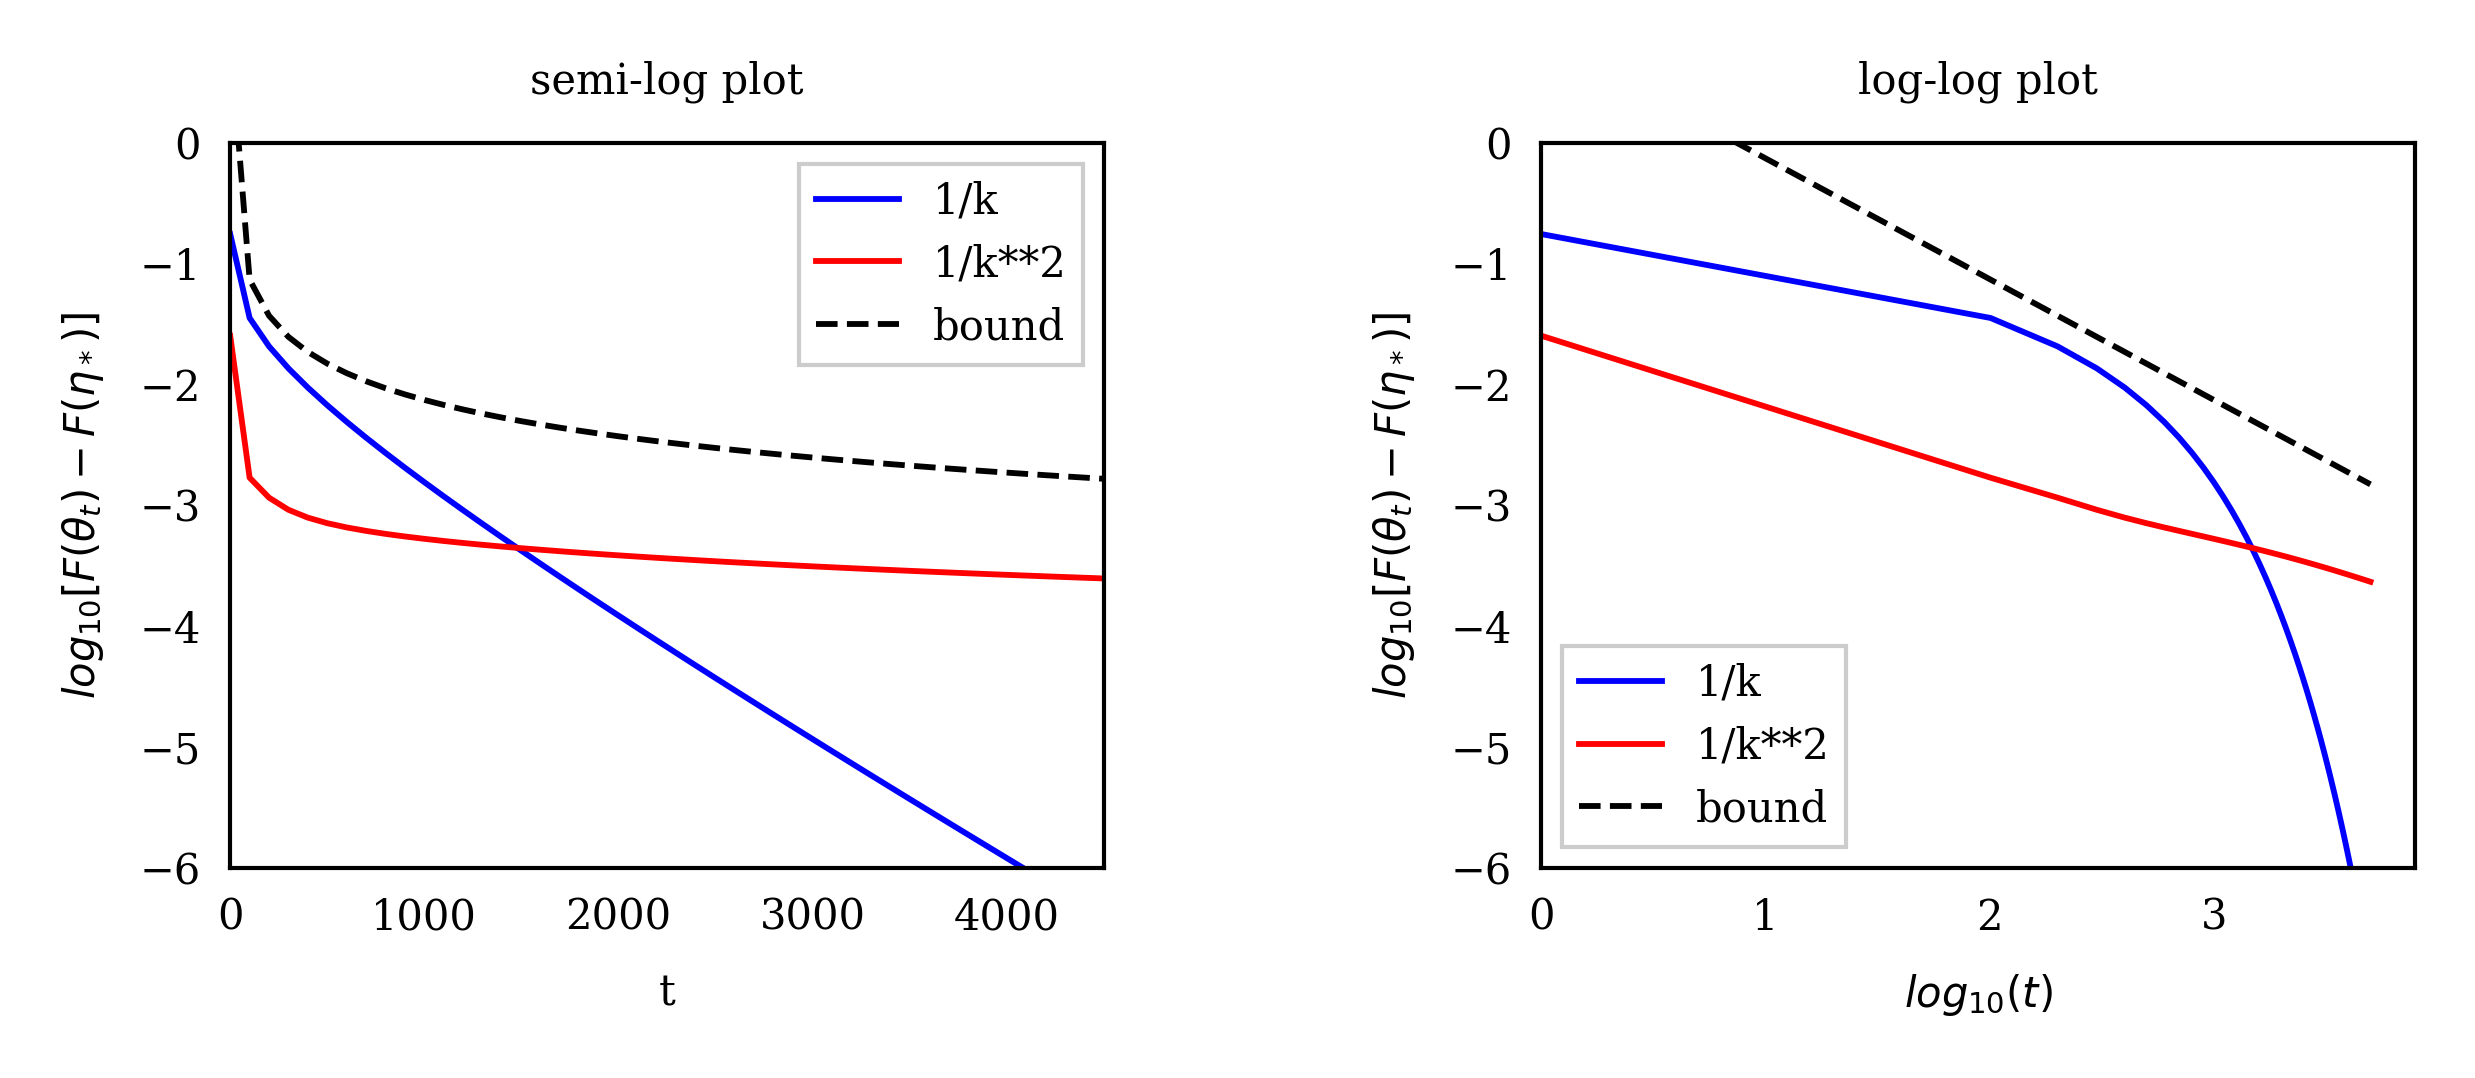

In [ ]:
# Bound
B = lambda t, gam=1 : 1/(8*t*gam) * np.linalg.norm(th0-nu, 2)**2
B = np.vectorize(B)

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=medium_rectangle, gridspec_kw = inner_space)

l10 = np.log10
axs1.plot(t, l10(Gt_k1), 'b', label='1/k')
axs1.plot(t, l10(Gt_k2), 'r', label='1/k**2')
axs1.plot(t, l10(B(t)), 'k--', label='bound')
axs1.set_xlabel("t")
axs1.set_ylabel('$log_{10}[F(\\theta_t) - F(\eta_*)]$')
axs1.legend()
axs1.set_xlim(0., 4500)
axs1.set_ylim(-6., 0.)
axs1.set_title("semi-log plot")

axs2.plot(l10(t),l10(Gt_k1), 'b', label='1/k')
axs2.plot(l10(t), l10(Gt_k2), 'r', label='1/k**2')
axs2.plot(l10(t), l10(B(t)), 'k--', label='bound')
axs2.set_xlabel('$log_{10}(t)$')
axs2.set_ylabel('$log_{10}[F(\\theta_t) - F(\eta_*)]$')
axs2.legend()
axs2.set_xlim(0., 3.9)
axs2.set_ylim(-6., 0.)
axs2.set_title("log-log plot");

plt.savefig('fig51.svg')
files.download("fig51.svg")


### 5.2

In [ ]:
n = 400
d = 40

def F(y,theta,X,mu):
    return np.sum(hinge(y* (X).dot(theta)))/n + mu*np.sum(theta**2)/2

def gt(i,mu,theta,y,X):
    if y[i]*np.transpose(theta).dot(X[i,:])>1:
        return mu*theta
    else :
        return mu*theta - y[i]*X[i,:]

H = np.random.normal(0, 1, (d,d))
U, S, V = np.linalg.svd(H)
H = U @ np.diag([1/i for i in range(1,d+1)]) @ U.T
H2 = U @ np.diag([1/i**2 for i in range(1,d+1)]) @ U.T
Hsqrt = U @ np.diag([1/np.sqrt(i) for i in range(1,d+1)]) @ U.T

x = np.random.normal(0, 1, (n,d)) @ Hsqrt
nu = np.random.normal(0, 1, d)
nu = nu / np.sqrt(nu.T @ H @ nu)
noise_std = 1
y = np.sign(x @ nu + noise_std * np.random.normal(0,1,n))
R = np.max(np.sum(x**2, axis=1))

def onerun(max_iter, mu, gam_choice, n):
    w = 0.1*np.ones(d)
    Fstar = np.zeros(max_iter)
    for t in range(1,max_iter):
        if gam_choice == 1:
            gamma = 1/(mu*t)
        else:
            gamma = 1/(R*(t**0.5))
        i = np.random.randint(n) - 1
        w = w - gamma*gt(i,mu,w,y,x)
        Fstar[t] = F(y,w,x,mu)
    return Fstar

max_iter = 10000
#MU1
mu1 = 0.001
F1_mu = onerun(max_iter, mu1, 1, n)
F1_R = onerun(max_iter, mu1, 2, n)
#MU2
mu2 = 0.1
F2_mu = onerun(max_iter, mu2, 1, n)
F2_R = onerun(max_iter, mu2, 2, n)

#GD
w = np.zeros(d)
maxiter_det = 100000
nu1 = np.zeros(maxiter_det)
for iter in range(0, maxiter_det):
    nu1[iter] = np.mean( np.max( 1 - y.dot(x.dot(w)), 0)) + mu1/2 + np.sum(w**2)
    it = np.random.randint(n) - 1
    w = w - 1/(mu1*(iter+1)) * (mu1*w - 1/n * x.T.dot(y* hinge(y.dot(x.dot(w)))))

w = np.zeros(d)
maxiter_det = 100000
nu2 = np.zeros(maxiter_det)
for iter in range(0, maxiter_det):
    nu2[iter] = np.mean( np.max( 1 - y.dot(x.dot(w)), 0)) + mu2/2 + np.sum(w**2)
    it = np.random.randint(n) - 1
    w = w - 1/(mu2*(iter+1)) * (mu2*w - 1/n * x.T.dot(y* hinge(y.dot(x.dot(w)))))

F_nu1 = nu1[-1]
F_nu2 = nu2[-1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

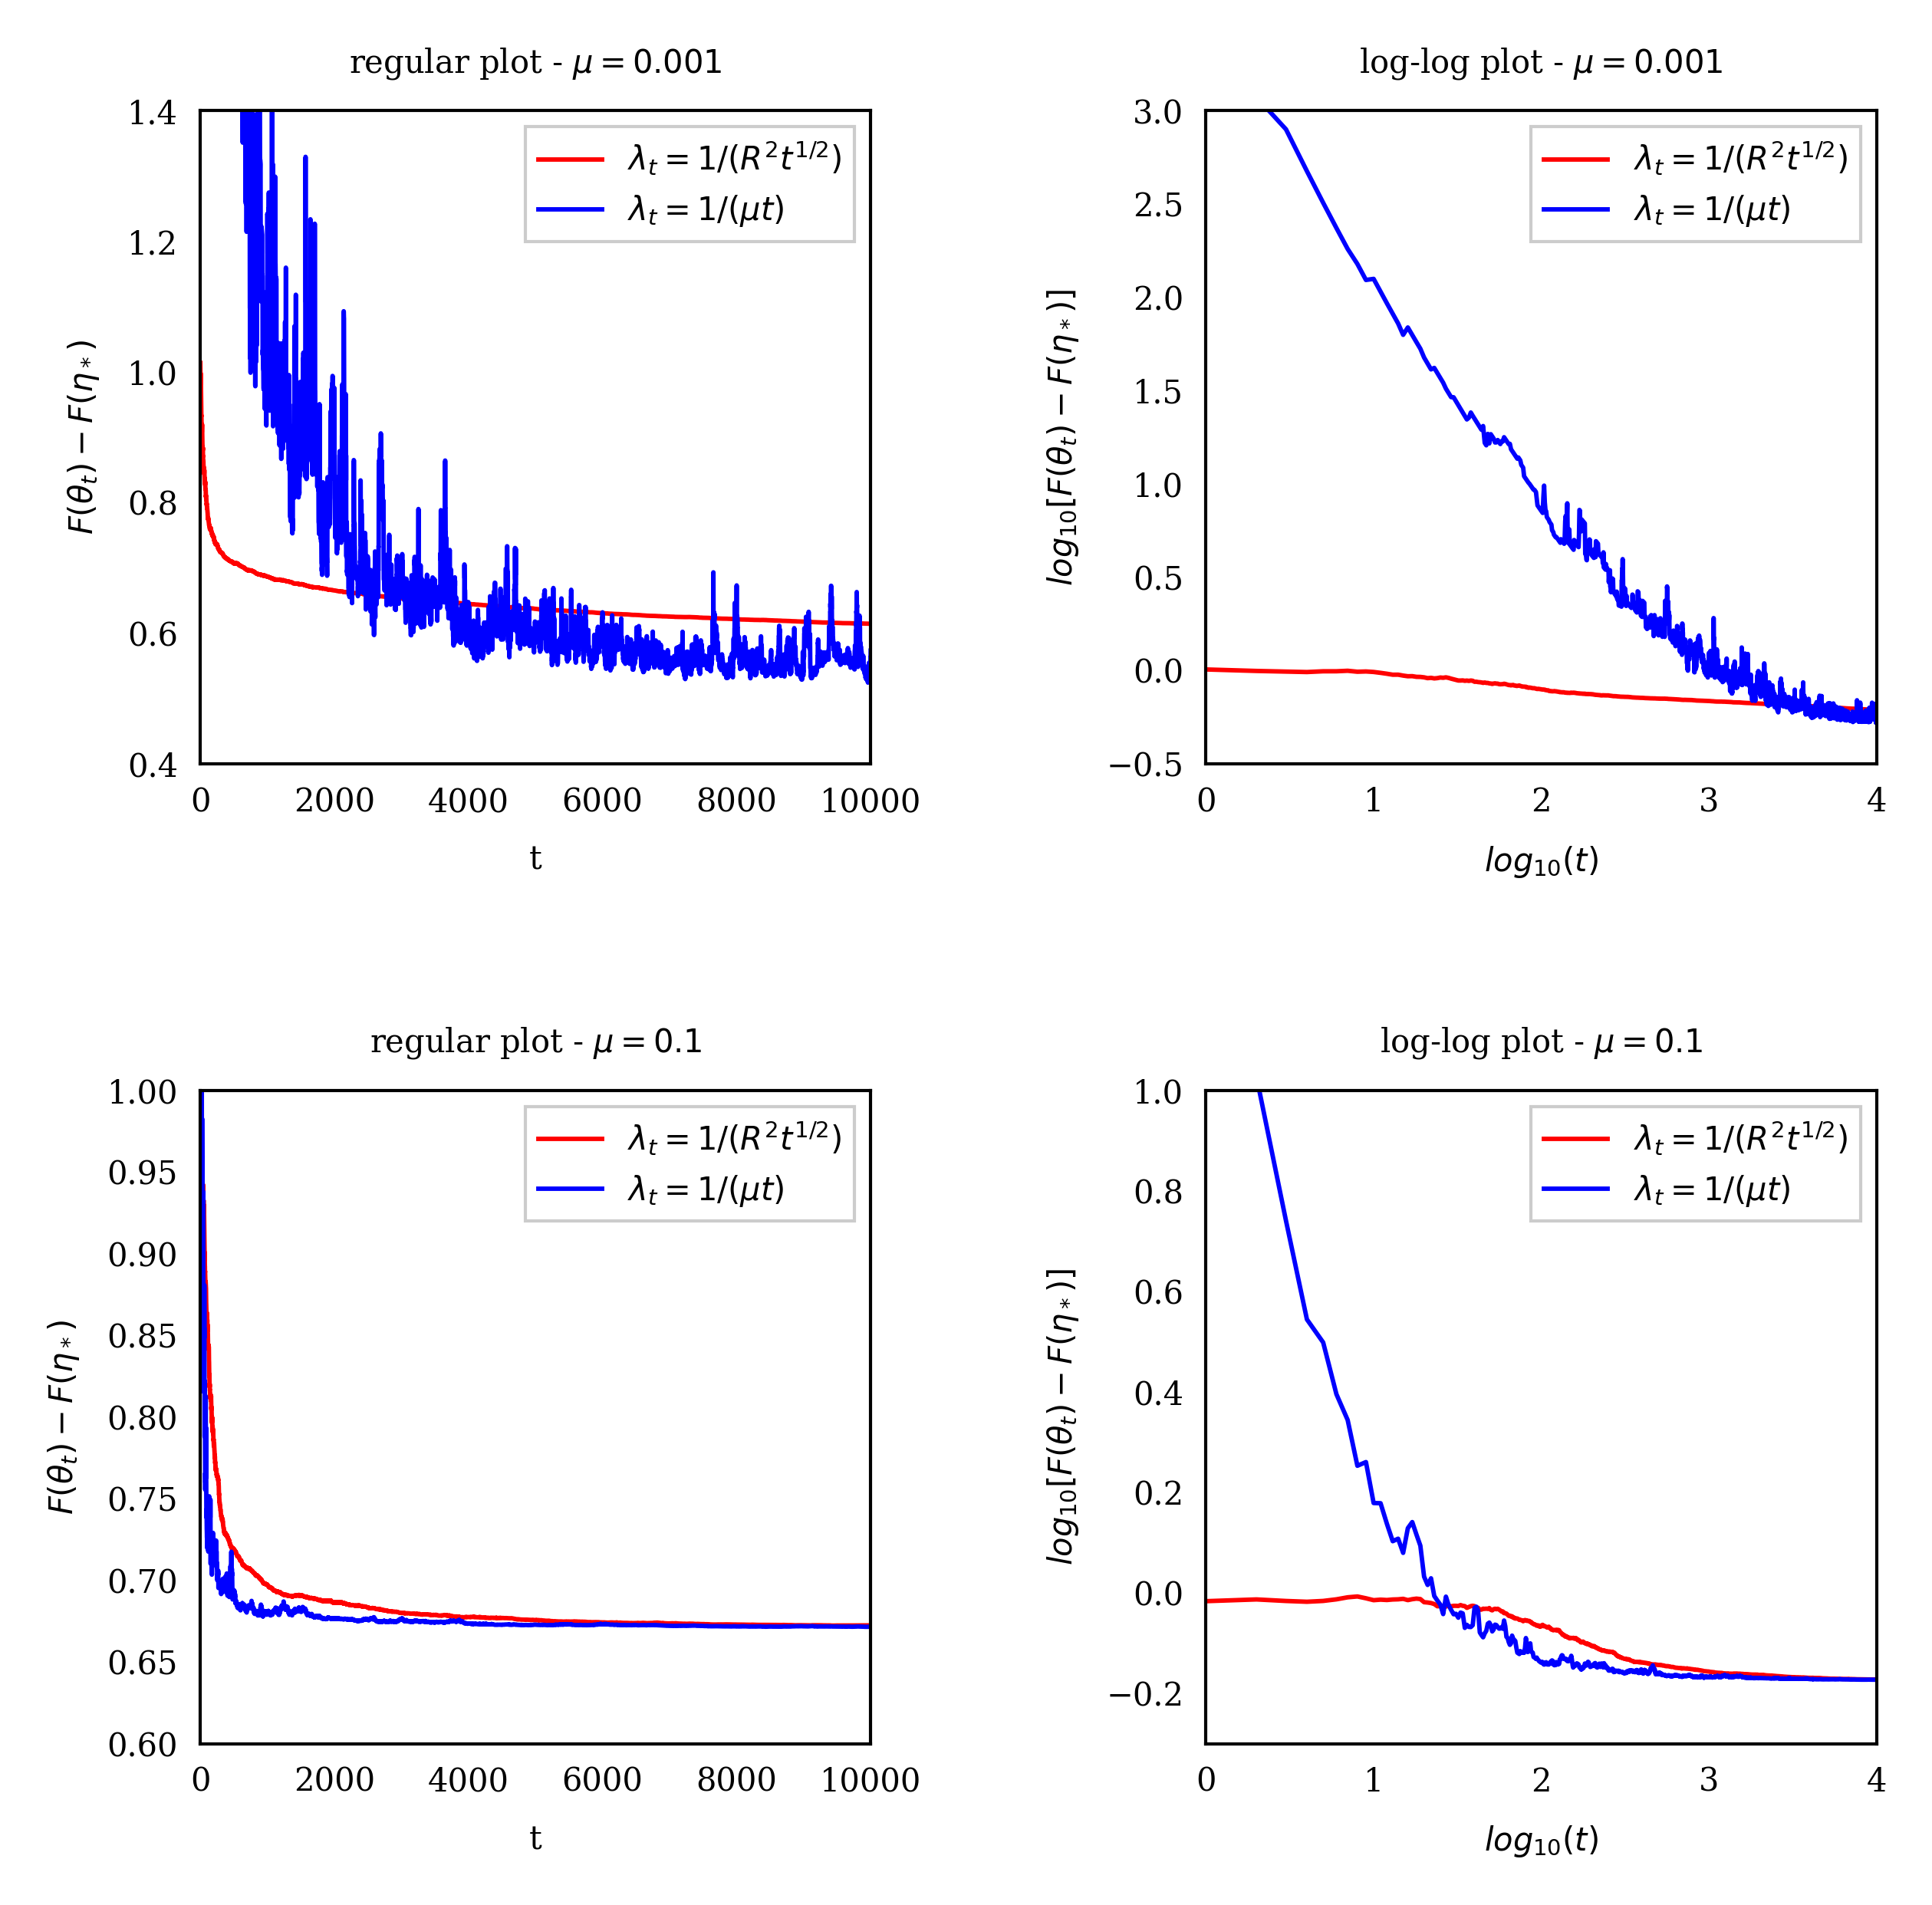

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = medium_square, gridspec_kw = inner_space)
l10 = np.log10

axs[0,0].plot(range(max_iter)[1:],(F1_R - F_nu1)[1:], color = 'r', label = '$\lambda_t = 1/(R^2 t^{1/2})$')
axs[0,0].plot(range(max_iter)[1:],(F1_mu - F_nu1)[1:], color = 'b', label = '$\lambda_t = 1/(\mu t)$')
axs[0,0].legend()
axs[0,0].set_ylim(0.4, 1.4)
axs[0,0].set_xlim(0, max_iter)
axs[0,0].set_title("regular plot - $\mu = 0.001$")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel('$F(\\theta_t) - F(\eta_*)$')

axs[0,1].plot(l10(range(max_iter)[1:]),l10((F1_R - F_nu1)[1:]), color = 'r', label = '$\lambda_t = 1/(R^2 t^{1/2})$')
axs[0,1].plot(l10(range(max_iter)[1:]),l10((F1_mu - F_nu1)[1:]), color = 'b', label = '$\lambda_t = 1/(\mu t)$')
axs[0,1].legend()
axs[0,1].set_ylim(-0.5,3)
axs[0,1].set_xlim(0, l10(max_iter))
axs[0,1].set_title("log-log plot - $\mu = 0.001$")
axs[0,1].set_xlabel("$log_{10}(t)$")
axs[0,1].set_ylabel('$log_{10}[F(\\theta_t) - F(\eta_*)]$')

axs[1,0].plot(range(max_iter)[1:],(F2_R - F_nu2)[1:], color = 'r', label = '$\lambda_t = 1/(R^2 t^{1/2})$')
axs[1,0].plot(range(max_iter)[1:],(F2_mu - F_nu2)[1:], color = 'b', label = '$\lambda_t = 1/(\mu t)$')
axs[1,0].legend()
axs[1,0].set_ylim(0.6,1)
axs[1,0].set_xlim(0, max_iter)
axs[1,0].set_title("regular plot - $\mu = 0.1$")
axs[1,0].set_xlabel("t")
axs[1,0].set_ylabel('$F(\\theta_t) - F(\eta_*)$')

axs[1,1].plot(l10(range(max_iter)[1:]),l10((F2_R - F_nu2)[1:]), color = 'r', label = '$\lambda_t = 1/(R^2 t^{1/2})$')
axs[1,1].plot(l10(range(max_iter)[1:]),l10((F2_mu - F_nu2)[1:]), color = 'b', label = '$\lambda_t = 1/(\mu t)$')
axs[1,1].legend()
axs[1,1].set_ylim(-0.3,1)
axs[1,1].set_xlim(0, l10(max_iter))
axs[1,1].set_title("log-log plot - $\mu = 0.1$")
axs[1,1].set_xlabel("$log_{10}(t)$")
axs[1,1].set_ylabel('$log_{10}[F(\\theta_t) - F(\eta_*)]$')

plt.savefig('fig52.svg')
files.download("fig52.svg")

plt.show()

### 5.3

<ipython-input-26-487d1d5bca46>:256: RuntimeWarning: divide by zero encountered in log10
  plt.plot((tostore)/n, np.log10(functionval_saga - optvalue), 'r')
<ipython-input-26-487d1d5bca46>:256: RuntimeWarning: invalid value encountered in log10
  plt.plot((tostore)/n, np.log10(functionval_saga - optvalue), 'r')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

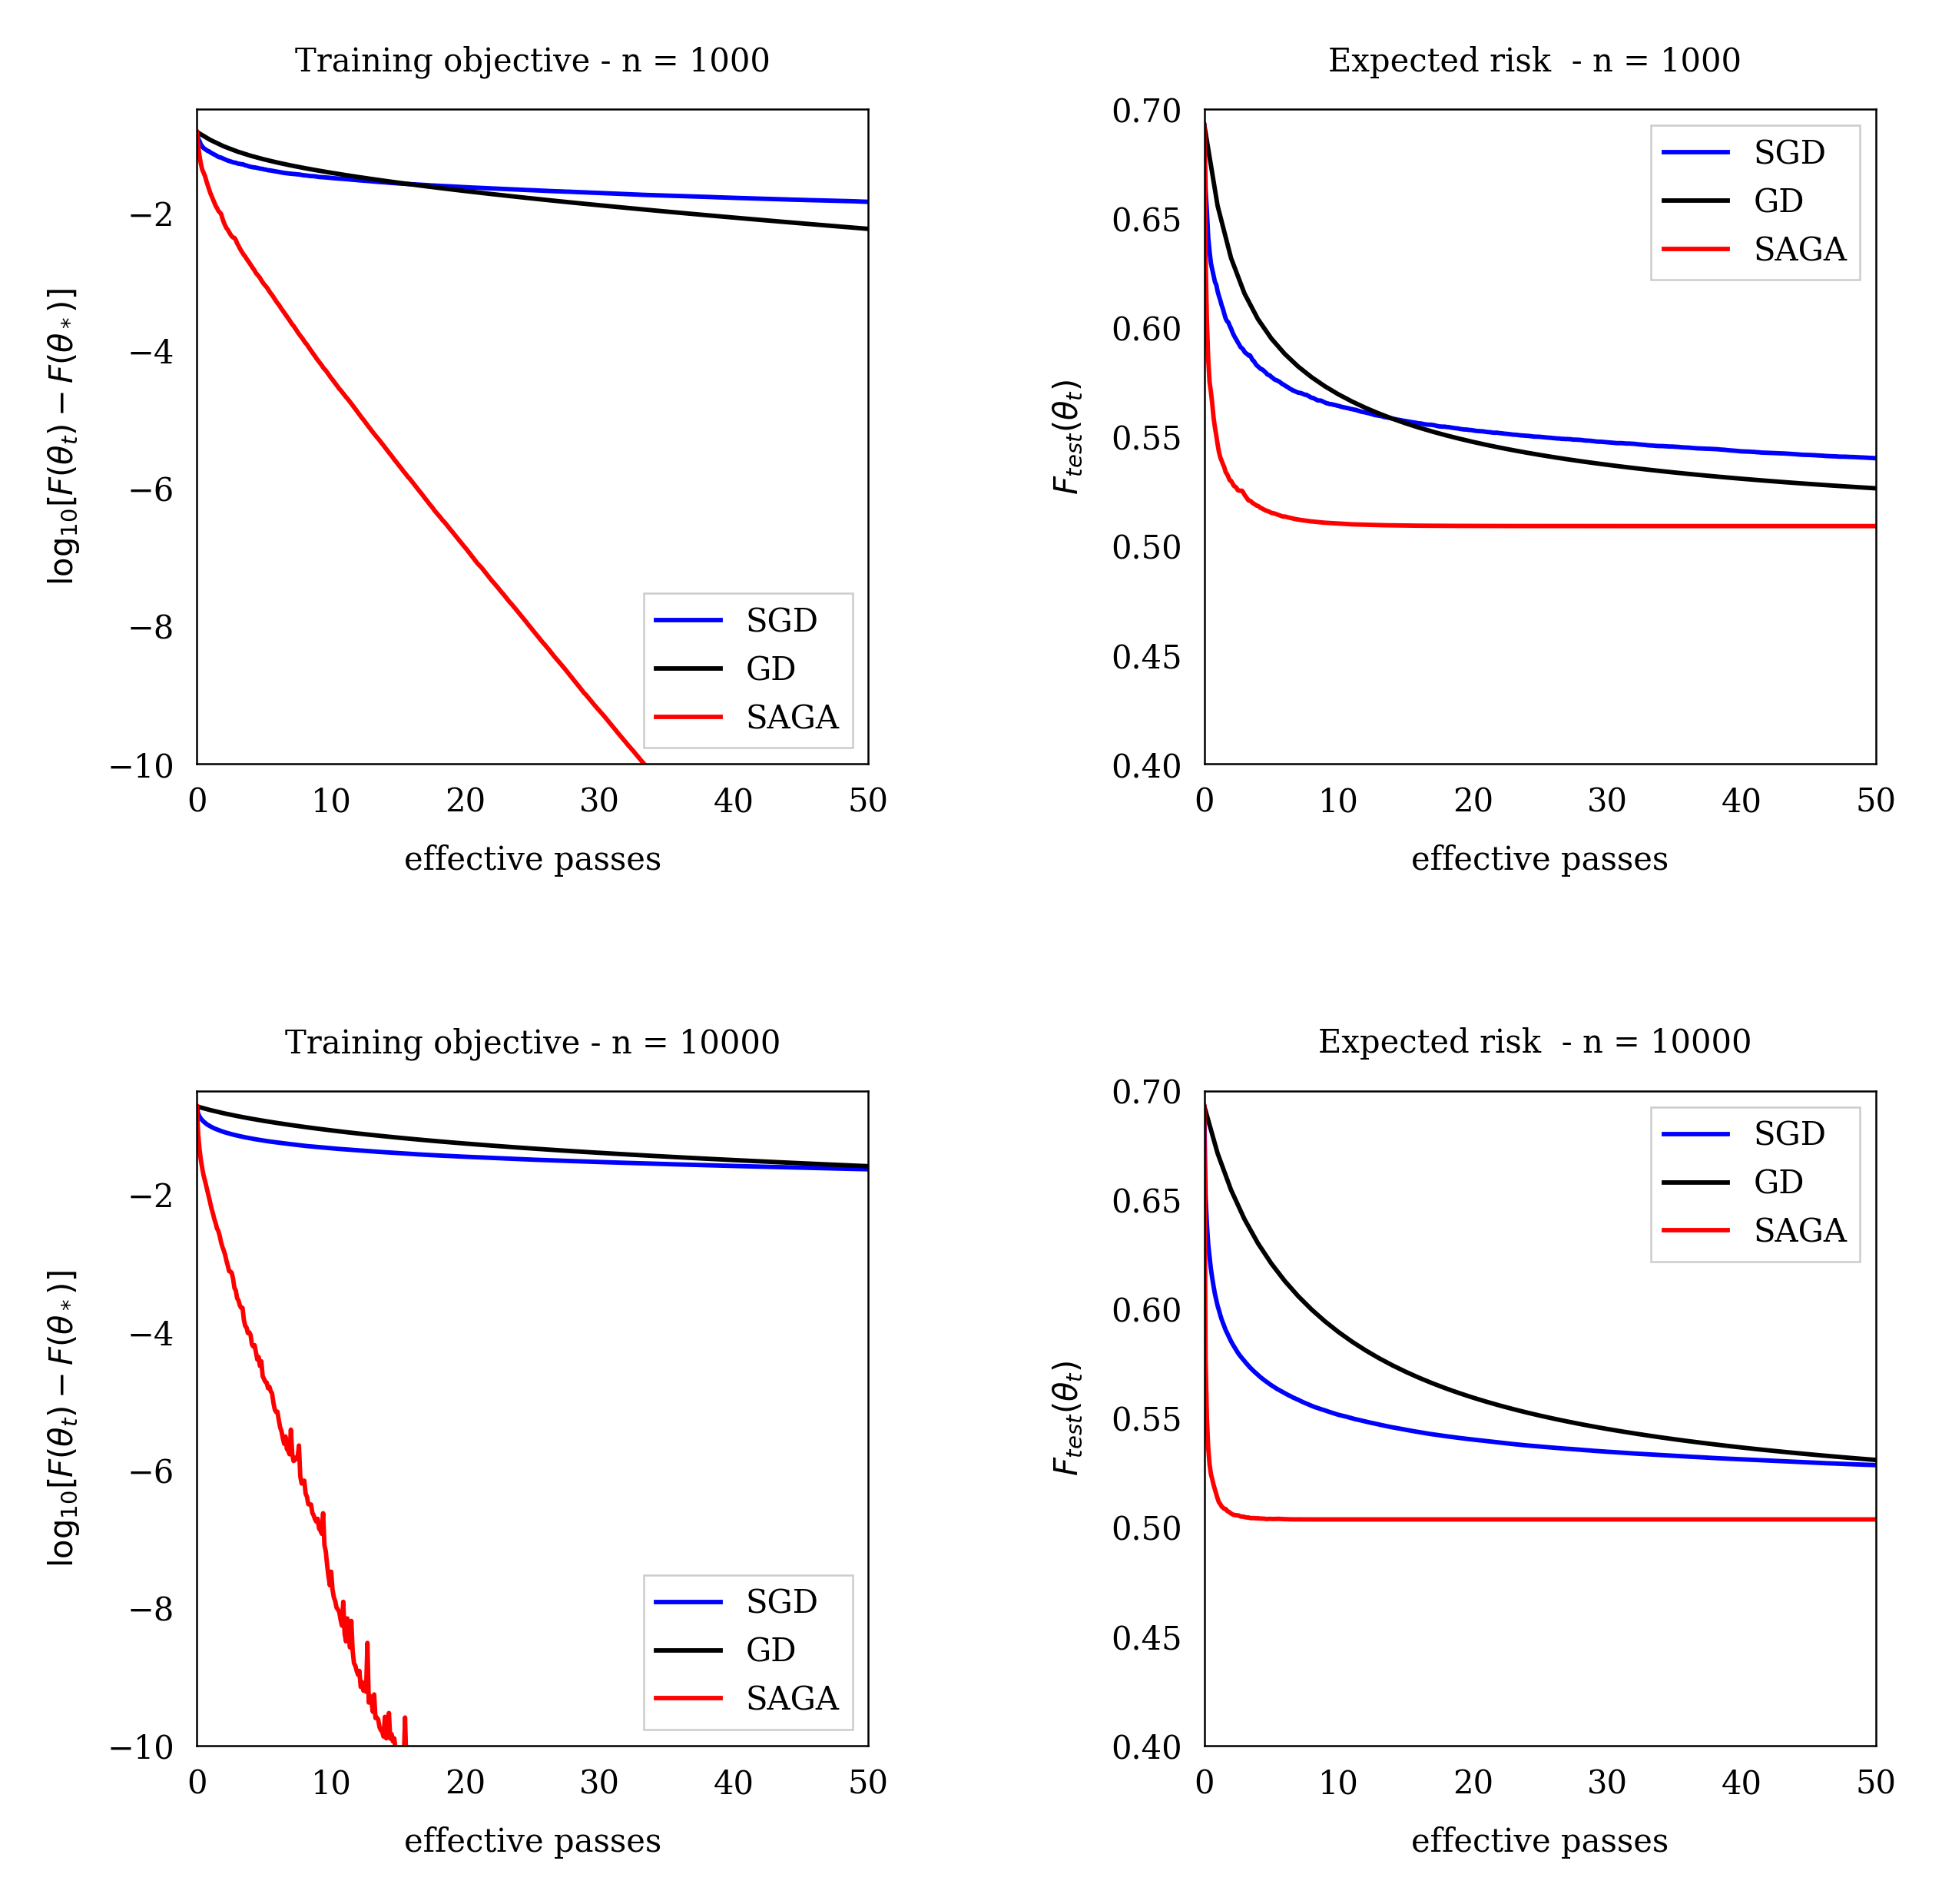

In [ ]:
# fixed matrix with planted singular values
d = 40
n = 2000

H = np.random.randn(d, d)
u, s, v = np.linalg.svd(H)
H = u @ np.diag(1./np.arange(1, d+1)) @ u.T
Hsqrt = sqrtm(H)

X = np.random.randn(n, d) @ Hsqrt
w0 = np.random.randn(d, 1)
w0 = w0 / np.sqrt(w0.T @ H @ w0)
noise_std = 1
y = np.sign(X @ w0 + noise_std * np.random.randn(n, 1))
R2 = np.max(np.sum(X**2, axis=1))
L = np.max(np.linalg.eig(X.T @ X / n)[0])
w = np.zeros((d, 1))

mu = 1e-2
mu = R2 / n
n = n // 2
Xtest = X[n:,:]
ytest = y[n:]
X = X[:n,:]
y = y[:n]

# SGD step
w = np.zeros((d, 1))
wave = np.zeros((d, 1))
number_of_passes = 50
tostore = np.arange(1, number_of_passes * n + 1, n//10)
tostore_ind = np.zeros(number_of_passes * n, dtype=bool)
tostore_ind[tostore] = True
maxiter_sto = number_of_passes * n

functionval_sc = np.zeros(maxiter_sto)
functionval_sc_ave = np.zeros(maxiter_sto)
functionval_sc_ave_test = np.zeros(maxiter_sto)
functionval_sc_test = np.zeros(maxiter_sto)

istore = 0
for iter in range(1, maxiter_sto + 1):
    if tostore_ind[iter - 1]:
        functionval_sc[istore] = np.mean(np.log(1 + np.exp(- y * X @ w ))) + mu / 2 * np.sum(w**2)
        functionval_sc_ave[istore] = np.mean(np.log(1 + np.exp(- y * X @ wave ))) + mu / 2 * np.sum(wave**2)
        functionval_sc_test[istore] = np.mean(np.log(1 + np.exp(- ytest * Xtest @ w )))
        functionval_sc_ave_test[istore] = np.mean(np.log(1 + np.exp(- ytest * Xtest @ wave )))
        istore += 1

    it = np.random.randint(n)
    temp = X[it,:] @ w * y[it]
    w = w.reshape(d,) - 1 / (R2 * np.sqrt(iter + 1) + mu * (iter + 1)) * (mu * w.reshape(d,) + X[it,:].T * (y[it] * (-1 / (1 + np.exp(temp)))))
    wave = (1 - 1 / iter) * wave.reshape(d,) + w.reshape(d,) / iter

functionval_sc=functionval_sc[:istore]
functionval_sc_ave=functionval_sc_ave[:istore]
functionval_sc_test=functionval_sc_test[:istore]
functionval_sc_ave_test=functionval_sc_ave_test[:istore]

#GD
w = np.zeros((d, 1))
maxiter_det = number_of_passes + 1
functionval_sc_det = np.zeros(maxiter_det)
functionval_sc_det_test = np.zeros(maxiter_det)

for iter in range(maxiter_det):
    temp = np.multiply(np.dot(X, w), y)
    functionval_sc_det[iter] = np.mean(np.log(1 + np.exp(-y * (np.dot(X, w))))) + mu/2 * np.sum(np.square(w))
    functionval_sc_det_test[iter] = np.mean(np.log(1 + np.exp(-ytest * (np.dot(Xtest, w)))))

    grad = mu * w + (1/n) * np.dot(np.transpose(X), np.multiply(y, -1 / (1 + np.exp(temp))))
    w = w - (1/L) * grad

# SAGA
w = np.zeros((d, 1))

tostore = np.arange(1, number_of_passes * n + 1, n//10)
tostore_ind = np.zeros(number_of_passes * n * 4, dtype=bool)
tostore_ind[tostore] = True

temp = np.multiply((X @ w).reshape(n,), y.reshape(n,))
zs = np.multiply(X.T, np.repeat( (np.multiply(y.reshape(n,),(-1 / (1 + np.exp(temp))))).reshape(1, n), d, axis=0)) + np.repeat(mu * w, n,axis=1)
meanzs = np.mean(zs, axis=1)

maxiter_saga = number_of_passes * n * 2
functionval_saga = np.zeros(maxiter_saga)
functionval_saga_test = np.zeros(maxiter_saga)
istore = 0

for iter in range(maxiter_saga):
    if tostore_ind[iter]:
        functionval_saga[istore] = np.mean(np.log(1 + np.exp(np.multiply(-y.reshape(n,), (X @ w).reshape(n,))))) + (mu/2) * np.sum(w**2)
        functionval_saga_test[istore] = np.mean(np.log(1 + np.exp(np.multiply(-ytest.reshape(n,) , (Xtest @ w).reshape(n,)))))
        istore += 1

    if iter == maxiter_saga - 1:
        optvalue = np.mean(np.log(1 + np.exp(np.multiply(-y.reshape(n,), (X @ w).reshape(n,))))) + (mu/2) * np.sum(w**2)

    it = np.random.randint(n)
    temp = np.multiply((X[it, :] @ w), y[it])
    gradloc = (mu * w.reshape(d,) + np.multiply(X[it, :].T , (y[it] * (-1 / (1 + np.exp(temp))))))
    w = w.reshape(d,) - 1 / (3 * R2) * (gradloc.reshape(d,) - zs[:, it] + meanzs.reshape(d,))
    meanzs = meanzs.reshape(d,) + gradloc.reshape(d,)/n - zs[:, it]/n
    zs[:, it] = gradloc.reshape(d,)

functionval_saga=functionval_saga[:istore]
functionval_saga_test=functionval_saga_test[:istore]

fig, axs = plt.subplots(2, 2, figsize = medium_square, gridspec_kw = inner_space)

plt.sca(axs[0,1])
plt.plot((tostore)/n, functionval_sc_test ,'b')
plt.plot(range(maxiter_det), functionval_sc_det_test, 'k')
plt.plot((tostore)/n, functionval_saga_test, 'r')
plt.legend(['SGD','GD','SAGA'], loc='upper right')
plt.xlabel('effective passes')
plt.ylabel('$F_{test}(\\theta_t)$')
plt.title('Expected risk  - n = 1000 ')
plt.xlim(0, number_of_passes)
plt.ylim(0.4, 0.7)

plt.sca(axs[0,0])
plt.plot((tostore)/n, np.log10(functionval_sc - optvalue), 'b')
plt.plot(range(maxiter_det), np.log10(functionval_sc_det - optvalue), 'k')
plt.plot((tostore)/n, np.log10(functionval_saga - optvalue), 'r')
plt.legend(['SGD','GD','SAGA'], loc='lower right')
plt.xlabel('effective passes')
plt.ylabel('$\\log_{10}[F(\\theta_t) - F(\\theta_*)]$')
plt.title('Training objective - n = 1000')
plt.xlim(0, number_of_passes)
plt.ylim(-10, -0.5)

# fixed matrix with planted singular values
d = 40
n = 20000

H = np.random.randn(d, d)
u, s, v = np.linalg.svd(H)
H = u @ np.diag(1./np.arange(1, d+1)) @ u.T
Hsqrt = sqrtm(H)

X = np.random.randn(n, d) @ Hsqrt
w0 = np.random.randn(d, 1)
w0 = w0 / np.sqrt(w0.T @ H @ w0)
noise_std = 1
y = np.sign(X @ w0 + noise_std * np.random.randn(n, 1))
R2 = np.max(np.sum(X**2, axis=1))
L = np.max(np.linalg.eig(X.T @ X / n)[0])
w = np.zeros((d, 1))

mu = 1e-2
mu = R2 / n
n = n // 2
Xtest = X[n:,:]
ytest = y[n:]
X = X[:n,:]
y = y[:n]

# SGD step
w = np.zeros((d, 1))
wave = np.zeros((d, 1))
number_of_passes = 50
tostore = np.arange(1, number_of_passes * n + 1, n//10)
tostore_ind = np.zeros(number_of_passes * n, dtype=bool)
tostore_ind[tostore] = True
maxiter_sto = number_of_passes * n

functionval_sc = np.zeros(maxiter_sto)
functionval_sc_ave = np.zeros(maxiter_sto)
functionval_sc_ave_test = np.zeros(maxiter_sto)
functionval_sc_test = np.zeros(maxiter_sto)

istore = 0
for iter in range(1, maxiter_sto + 1):
    if tostore_ind[iter - 1]:
        functionval_sc[istore] = np.mean(np.log(1 + np.exp(- y * X @ w ))) + mu / 2 * np.sum(w**2)
        functionval_sc_ave[istore] = np.mean(np.log(1 + np.exp(- y * X @ wave ))) + mu / 2 * np.sum(wave**2)
        functionval_sc_test[istore] = np.mean(np.log(1 + np.exp(- ytest * Xtest @ w )))
        functionval_sc_ave_test[istore] = np.mean(np.log(1 + np.exp(- ytest * Xtest @ wave )))
        istore += 1

    it = np.random.randint(n)
    temp = X[it,:] @ w * y[it]
    w = w.reshape(d,) - 1 / (R2 * np.sqrt(iter + 1) + mu * (iter + 1)) * (mu * w.reshape(d,) + X[it,:].T * (y[it] * (-1 / (1 + np.exp(temp)))))
    wave = (1 - 1 / iter) * wave.reshape(d,) + w.reshape(d,) / iter

functionval_sc=functionval_sc[:istore]
functionval_sc_ave=functionval_sc_ave[:istore]
functionval_sc_test=functionval_sc_test[:istore]
functionval_sc_ave_test=functionval_sc_ave_test[:istore]

#GD
w = np.zeros((d, 1))
maxiter_det = number_of_passes + 1
functionval_sc_det = np.zeros(maxiter_det)
functionval_sc_det_test = np.zeros(maxiter_det)

for iter in range(maxiter_det):
    temp = np.multiply(np.dot(X, w), y)
    functionval_sc_det[iter] = np.mean(np.log(1 + np.exp(-y * (np.dot(X, w))))) + mu/2 * np.sum(np.square(w))
    functionval_sc_det_test[iter] = np.mean(np.log(1 + np.exp(-ytest * (np.dot(Xtest, w)))))

    grad = mu * w + (1/n) * np.dot(np.transpose(X), np.multiply(y, -1 / (1 + np.exp(temp))))
    w = w - (1/L) * grad

# SAGA
w = np.zeros((d, 1))

tostore = np.arange(1, number_of_passes * n + 1, n//10)
tostore_ind = np.zeros(number_of_passes * n * 4, dtype=bool)
tostore_ind[tostore] = True

temp = np.multiply((X @ w).reshape(n,), y.reshape(n,))
zs = np.multiply(X.T, np.repeat( (np.multiply(y.reshape(n,),(-1 / (1 + np.exp(temp))))).reshape(1, n), d, axis=0)) + np.repeat(mu * w, n,axis=1)
meanzs = np.mean(zs, axis=1)

maxiter_saga = number_of_passes * n * 2
functionval_saga = np.zeros(maxiter_saga)
functionval_saga_test = np.zeros(maxiter_saga)

istore = 0
for iter in range(maxiter_saga):
    if tostore_ind[iter]:
        functionval_saga[istore] = np.mean(np.log(1 + np.exp(np.multiply(-y.reshape(n,), (X @ w).reshape(n,))))) + (mu/2) * np.sum(w**2)
        functionval_saga_test[istore] = np.mean(np.log(1 + np.exp(np.multiply(-ytest.reshape(n,) , (Xtest @ w).reshape(n,)))))
        istore += 1

    if iter == maxiter_saga - 1:
        optvalue = np.mean(np.log(1 + np.exp(np.multiply(-y.reshape(n,), (X @ w).reshape(n,))))) + (mu/2) * np.sum(w**2)

    it = np.random.randint(n)
    temp = np.multiply((X[it, :] @ w), y[it])
    gradloc = (mu * w.reshape(d,) + np.multiply(X[it, :].T , (y[it] * (-1 / (1 + np.exp(temp))))))
    w = w.reshape(d,) - 1 / (3 * R2) * (gradloc.reshape(d,) - zs[:, it] + meanzs.reshape(d,))
    meanzs = meanzs.reshape(d,) + gradloc.reshape(d,)/n - zs[:, it]/n
    zs[:, it] = gradloc.reshape(d,)

functionval_saga=functionval_saga[:istore]
functionval_saga_test=functionval_saga_test[:istore]


plt.sca(axs[1,1])
plt.plot((tostore)/n, functionval_sc_test ,'b')
plt.plot(range(maxiter_det), functionval_sc_det_test, 'k')
plt.plot((tostore)/n, functionval_saga_test, 'r')
plt.legend(['SGD','GD','SAGA'], loc='upper right')
plt.xlabel('effective passes')
plt.ylabel('$F_{test}(\\theta_t)$')
plt.title('Expected risk  - n = 10000 ')
plt.xlim(0, number_of_passes)
plt.ylim(0.4, 0.7)

plt.sca(axs[1,0])
plt.plot((tostore)/n, np.log10(functionval_sc - optvalue), 'b')
plt.plot(range(maxiter_det), np.log10(functionval_sc_det - optvalue), 'k')
plt.plot((tostore)/n, np.log10(functionval_saga - optvalue), 'r')
plt.legend(['SGD','GD','SAGA'], loc='lower right')
plt.xlabel('effective passes')
plt.ylabel('$\\log_{10}[F(\\theta_t) - F(\\theta_*)]$')
plt.title('Training objective - n = 10000')
plt.xlim(0, number_of_passes)
plt.ylim(-10, -0.5)

plt.savefig('fig53.svg')
files.download("fig53.svg")

plt.show()

# Chapter 6

### 6.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

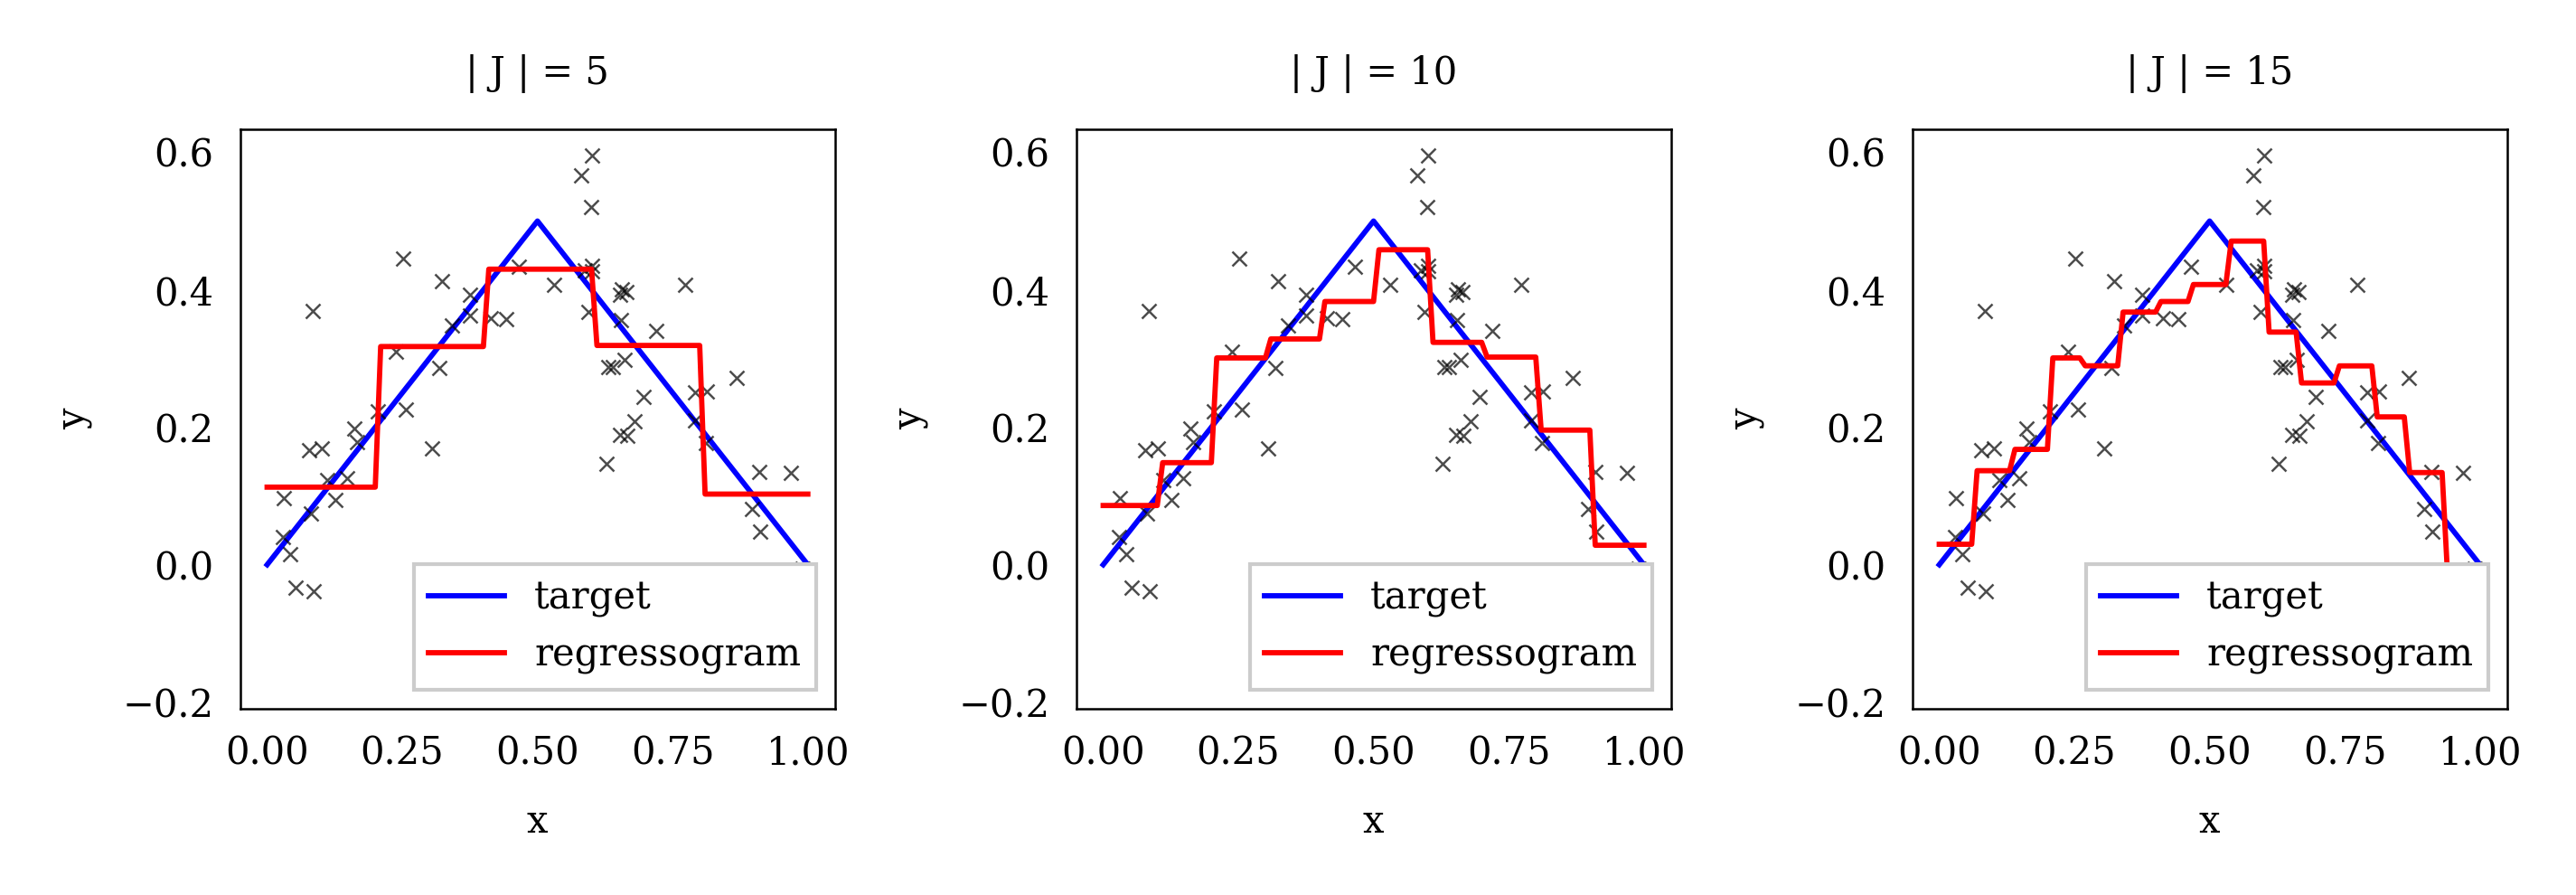

In [ ]:
target = lambda x: -np.abs(x-0.5)+0.5
target = np.vectorize(target)

def stepF(w, J):
    bin = np.linspace(0, 1, J+1)
    def f(x):
        for b in range(len(bin)-1):
            if x <= bin[b+1]:
                return w[b]
    f = np.vectorize(f)
    return f

def regressoPredict(J, x_obs, y_obs):
    bins = np.linspace(0, 1, J+1)
    weights = np.zeros(J)
    for j in range(J):
        index = [i for i in range(len(x_obs)) if (x_obs[i] < bins[j+1] and x_obs[i]>bins[j]) ]
        weights[j] = np.mean(y_obs[index]) if len(index)>0 else 0
    fJ = stepF(weights, J)
    return fJ

def plotFixedPartition(figure, x, y, j, i, x_obs, y_obs):
    axes = figure.add_subplot(1, 3, i)
    axes.plot(x, y ,'b', label='target')
    axes.plot(x_obs, y_obs, 'xk', alpha = 0.7)
    fJ = regressoPredict(j, x_obs, y_obs)
    axes.plot(x, fJ(x), 'r', label='regressogram')
    axes.set_title(f'| J | = {j}')
    axes.legend(loc='lower right')
    axes.set_xlabel('x')
    axes.set_ylabel('y')

figure = plt.figure(figsize = medium_rectangle, tight_layout=True)
x = np.linspace(0, 1, 101)
y = target(x)

n = 60
std_noise = 0.1
x_obs = np.sort(np.random.uniform(0, 1, n))
y_obs = target(x_obs) + std_noise*np.random.randn(n)
J = [5, 10, 15]
for i in range(len(J)):
    plotFixedPartition(figure, x, y, J[i], i+1, x_obs, y_obs)

plt.savefig('fig62.svg')
files.download("fig62.svg")

### 6.3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

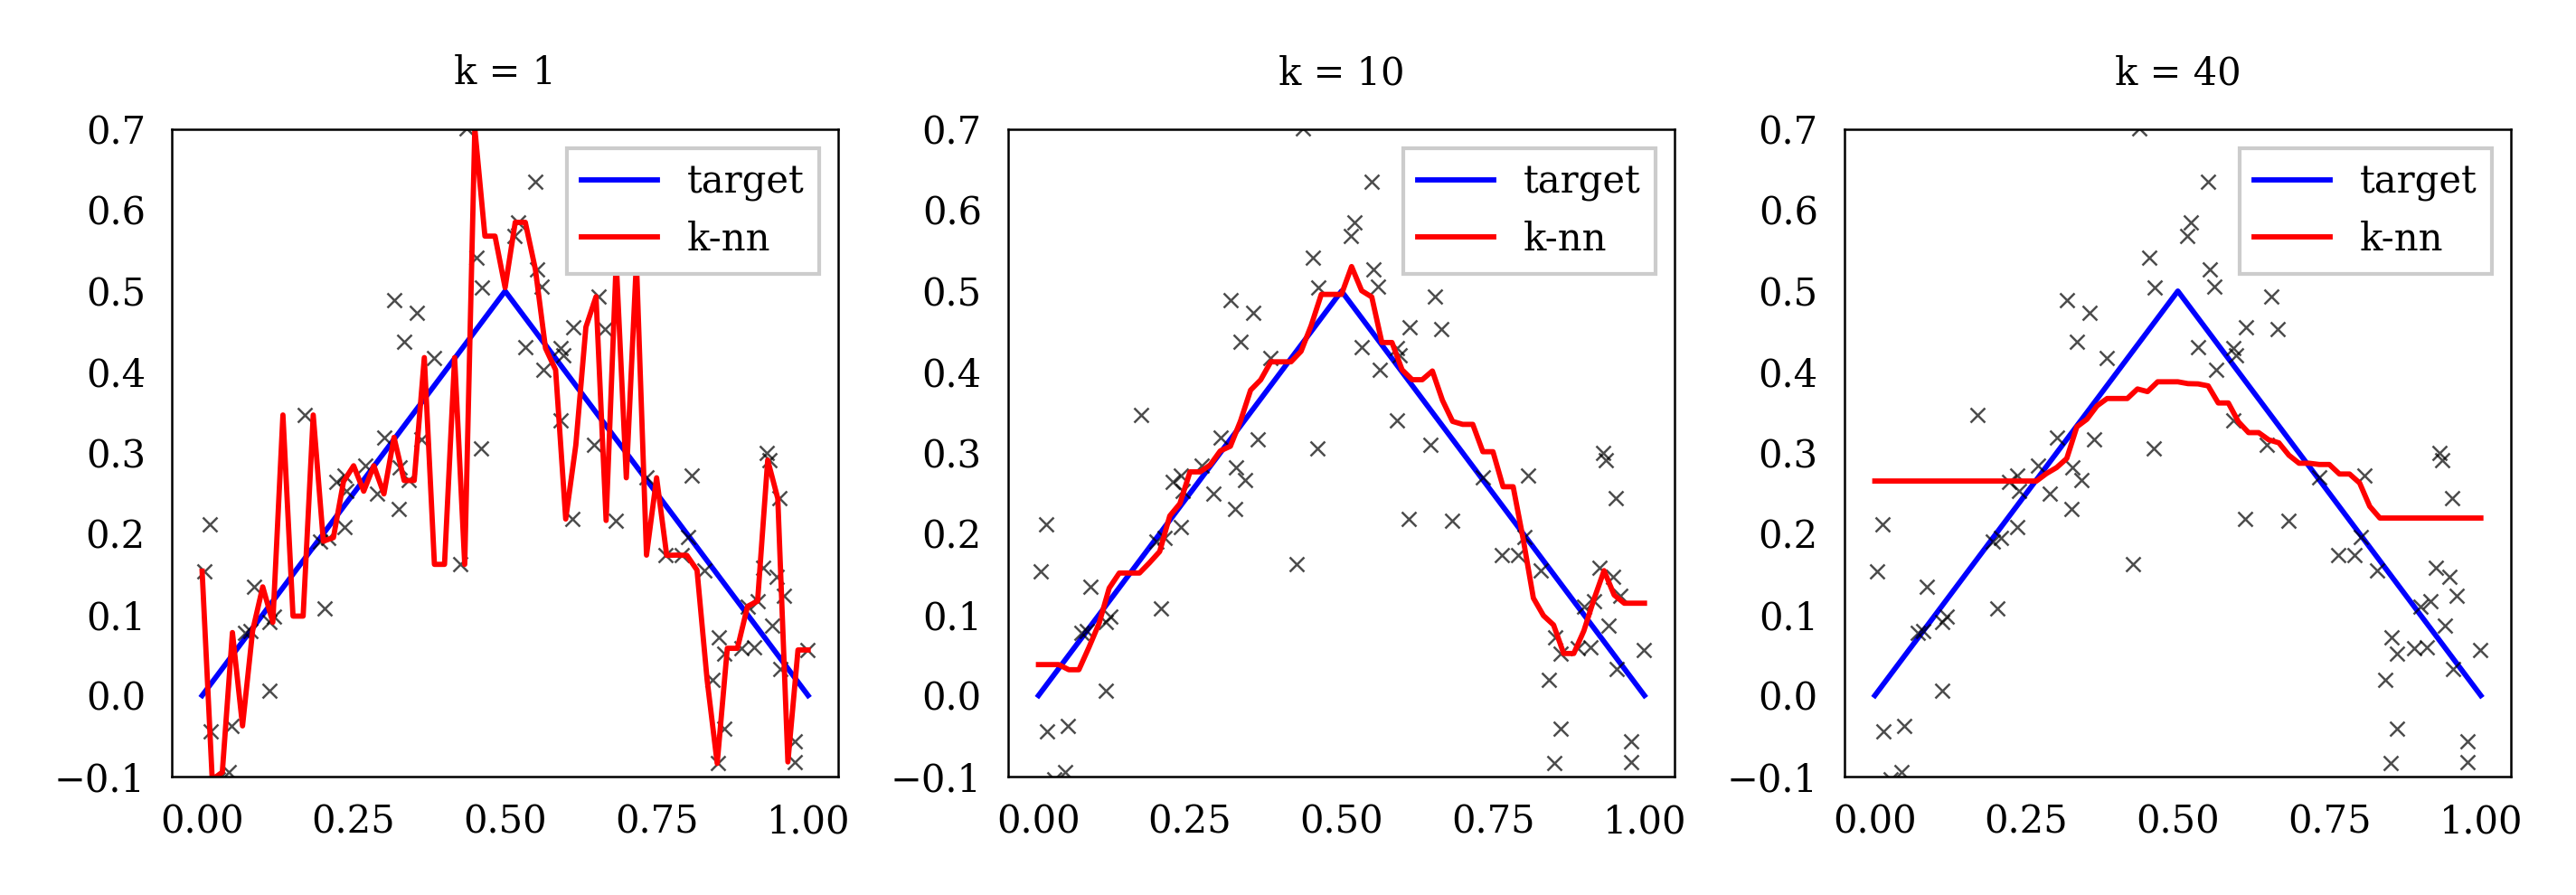

In [ ]:
def knn1(newinputx, obs_x, obs_y, n):
    f1 = np.zeros(len(newinputx))
    indices = np.zeros(len(newinputx))
    for i in range(len(newinputx)):
        indexafter = bisect((obs_x), newinputx[i])
        d1 = np.abs(newinputx[i] - obs_x[indexafter]) if indexafter<len(newinputx) else np.abs(newinputx[i] - obs_x[indexafter-1])
        d2 = np.abs(newinputx[i] - obs_x[indexafter-1])
        index = indexafter-1 if ((d2 > d1) and indexafter>0) else indexafter
        if (index==n):
          index-=1
        indices[i] = index
        f1[i] = obs_y[index]
    return f1

def knn(k, newinputx, obs_x, obs_y, n):
    if k==1:
        return knn1(newinputx, obs_x, obs_y, n)
    fk = np.zeros(len(newinputx))
    for i in range(len(newinputx)):
        indexafter = bisect((obs_x), newinputx[i])
        if indexafter<k//2:
            indices = [j for j in range(0,k)]
        elif indexafter>n-k//2:
            indices = [j for j in range(n-k, n)]
        else:
            indices = [j for j in range(indexafter-k//2, indexafter+k//2)]
        fk[i] = np.mean(obs_y[indices])
    return fk

target = lambda x: -np.abs(x-0.5)+0.5
target = np.vectorize(target)

def plotKNN(figure, k, i, x_obs, y_obs, y_pred):
    axes = figure.add_subplot(1, 3, i)
    axes.plot(xtrain, ytrain ,'b', label='target')
    axes.plot(x_obs, y_obs, 'kx', alpha = 0.7)
    axes.plot(xtrain, y_pred, 'r', label='k-nn')
    axes.set_ylim(-0.1, 0.7)
    axes.legend(loc='upper right')
    axes.set_title(f'k = {k}')


n=80
xtrain = np.linspace(0, 1, 61)
ytrain = target(xtrain)
xtest = np.sort(np.random.uniform(0, 1, n))
ytest = target(xtest) + 0.12*np.random.randn(n)

#Values of k
K = [1, 10, 40]

# Plot
figure = plt.figure(figsize = medium_rectangle, tight_layout=True)
i = 1
for k in K:
  f = knn(k, xtrain, xtest, ytest, n)
  plotKNN(figure, k, i, xtest, ytest, f)
  i = i+1

plt.savefig('fig63.svg')
files.download("fig63.svg")


### 6.4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

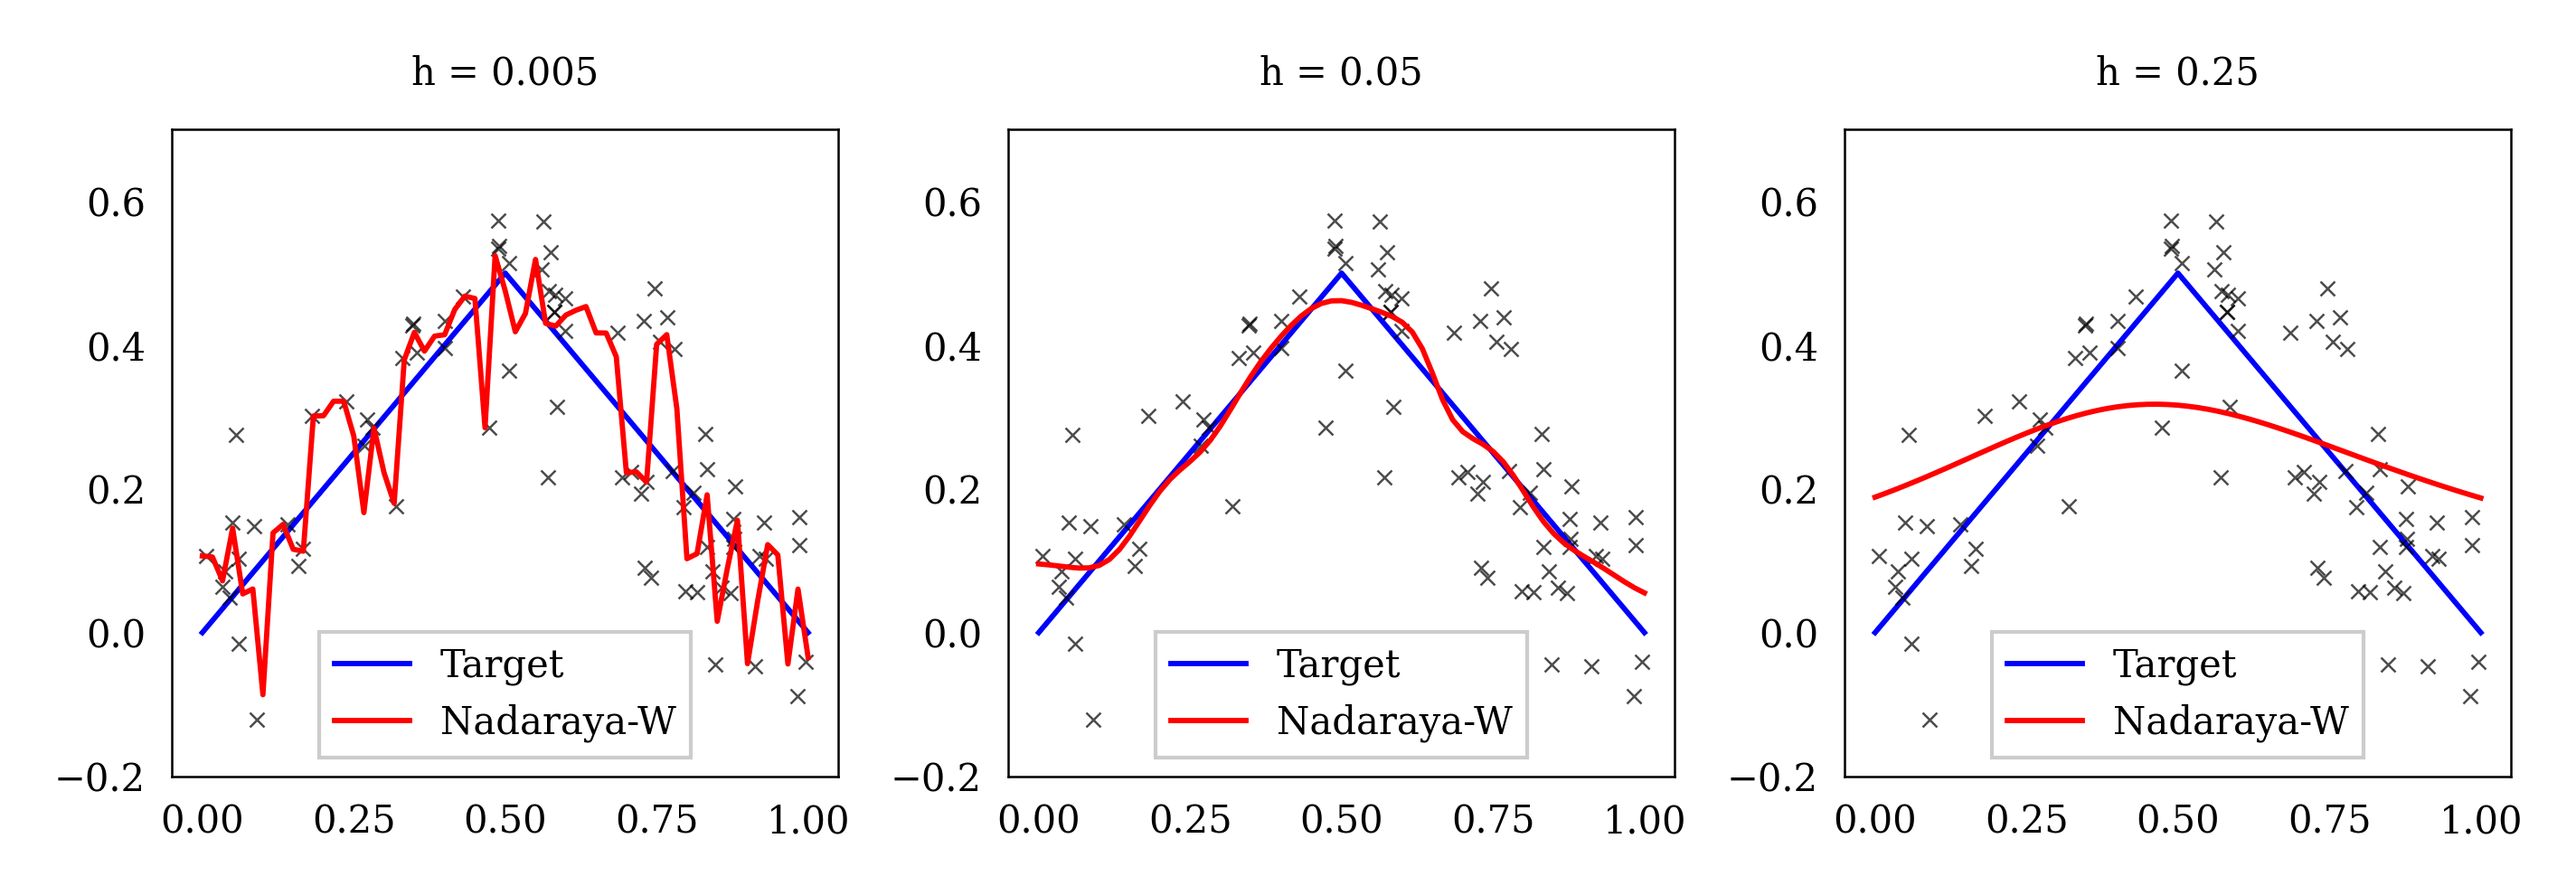

In [ ]:
q = lambda x: np.exp(-np.sum(x**2)/2)

def k(x, x_, h, d=1):
    return h**(-d) * q((1/h)*(x-x_))

def NW_predict(x_in, y_obs, h, x_obs):
    weights = np.array([k(x_in, x_obs[i], h) for i in range(n)])
    weights = weights / np.sum(weights)
    return np.dot(weights, y_obs)

target = lambda x: -np.abs(x-0.5)+0.5
target = np.vectorize(target)


def plot_NW_h(figure, h, index):
    f1 = [NW_predict(x, Ytest, h, Xtest) for x in Xtrain]
    axes = figure.add_subplot(1, 3, index)
    axes.plot(Xtrain, Ytrain ,'b', label='Target')
    axes.plot(Xtest, Ytest, 'kx', alpha = 0.7)
    axes.plot(Xtrain, f1, 'r', label='Nadaraya-W')
    axes.legend()
    axes.set_ylim([-0.2, 0.7])
    axes.set_title(f'h = {h}')

figure = plt.figure(figsize = medium_rectangle, tight_layout=True)
d = 1
n = 80
Xtrain = np.linspace(0, 1, 61) #odd to have point in graph at max
Ytrain = target(Xtrain)
Xtest = np.sort(np.random.uniform(0, 1, n))
Ytest = target(Xtest) + 0.12*np.random.randn(n)

H = [0.005, 0.050, 0.250]
for i in range(len(H)):
    plot_NW_h(figure, H[i], i+1)

plt.savefig('fig64.svg')
files.download("fig64.svg")

### 6.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

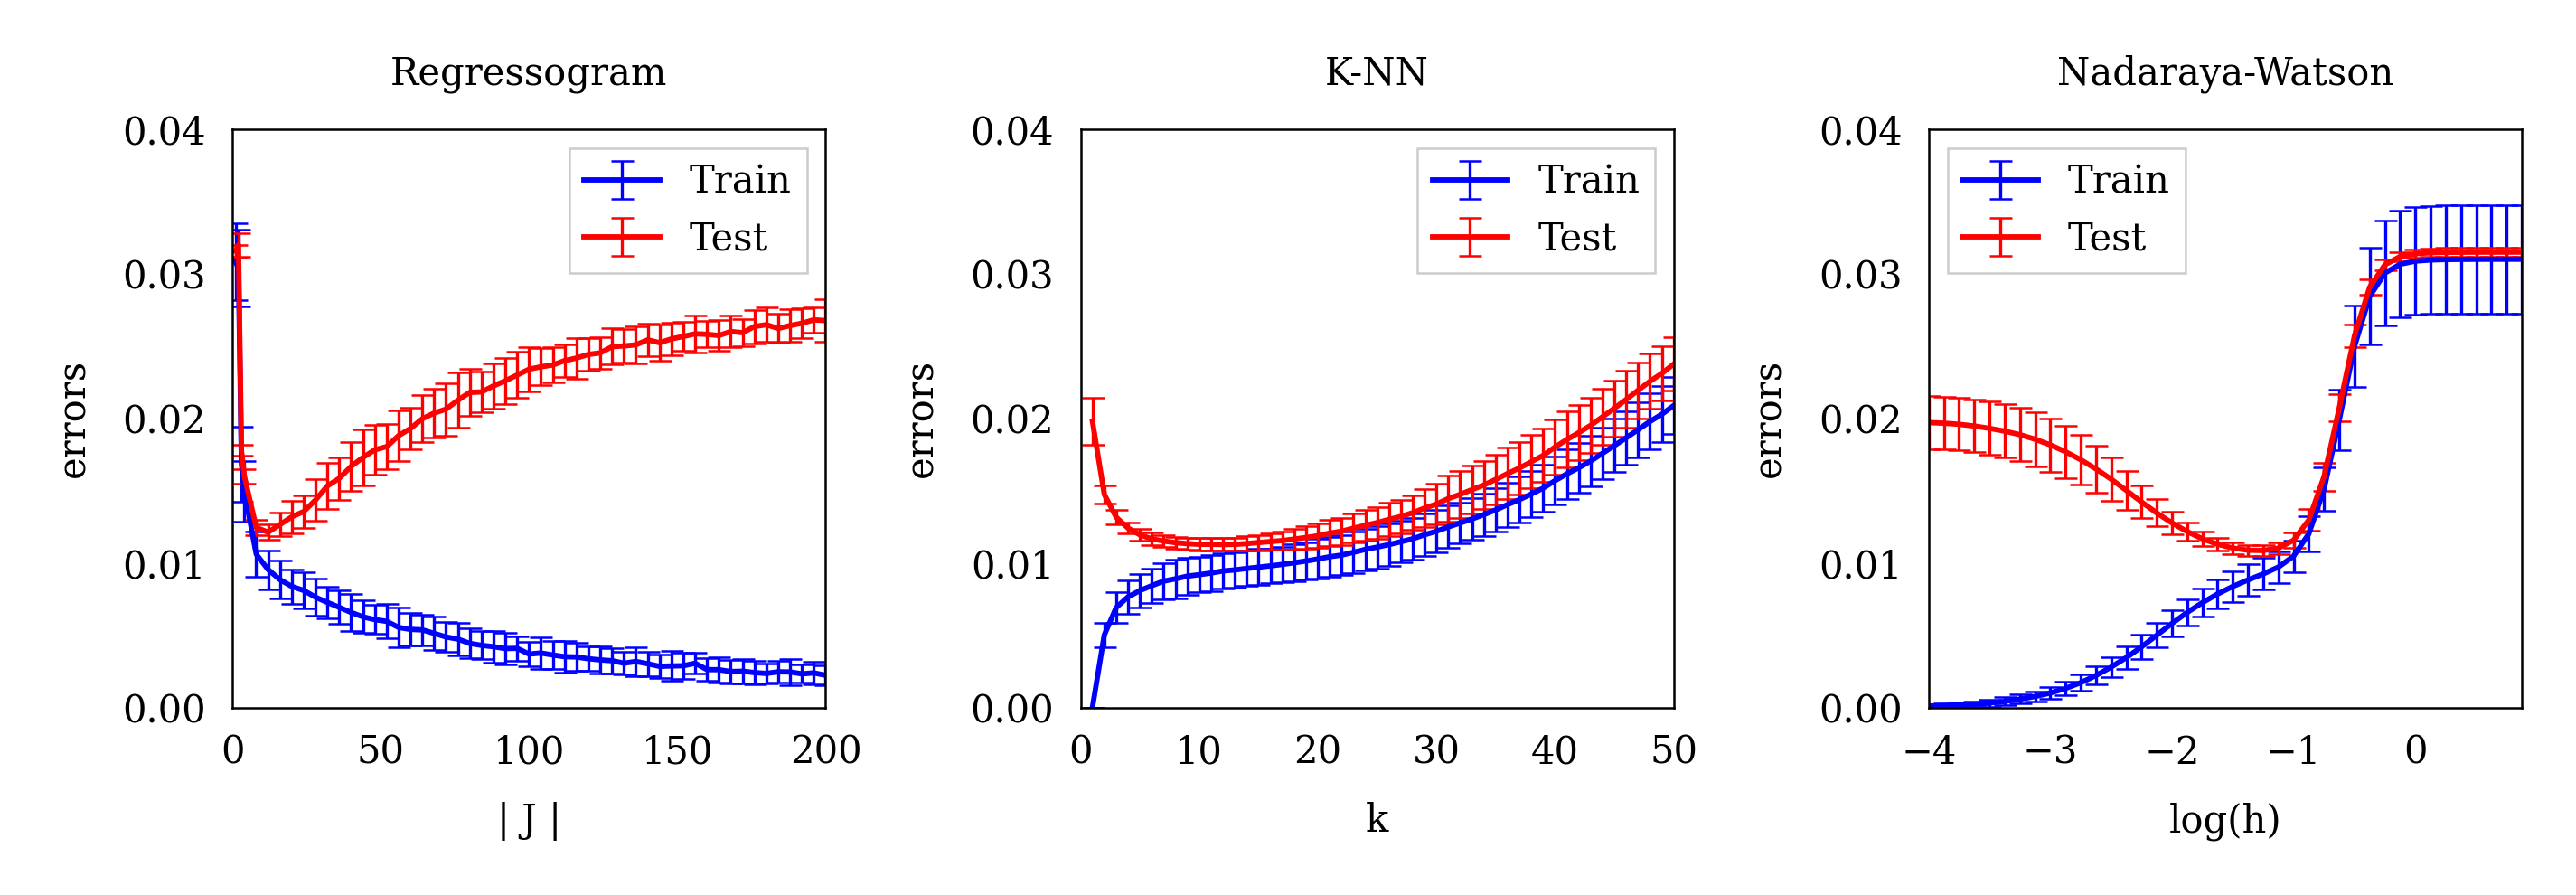

In [ ]:
l10 = np.log10

nrep = 32
n = 100
sdnoise = .1

def genDat(n, sd):
    Xtrain = np.random.rand(n,1)
    ytrain = 0.5 - np.abs(Xtrain - 0.5) + sd * np.random.randn(n,1)
    Xtest =np.arange(0, 1.01, 0.01)
    ytest = 0.5 - np.abs(Xtest - 0.5)
    return Xtrain, ytrain, Xtest, ytest

#Regresso
Jcards = [1,2,3] + [4*i for i in range(1,51)]
trainerrReg = np.zeros((nrep, len(Jcards)))
testerrReg = np.zeros((nrep, len(Jcards)))
for irep in range(nrep):
    Xtrain, ytrain, Xtest, ytest = genDat(n, sdnoise)

    for icard in range(len(Jcards)):
        Jcard = Jcards[icard]
        ftest = Xtest*0
        ftrain = Xtrain*0

        bintest = np.ceil(Xtest*Jcard)
        bintest = bintest + (bintest==0)
        bintrain = np.ceil(Xtrain*Jcard)
        bintrain = bintrain + (bintrain==0)

        for itest in range(len(Xtest)):
            x = Xtest[itest]
            bin = bintest[itest]
            ind = np.where(bintrain==bin)
            if np.size(ind)==0:
                ftest[itest] = np.mean(ytrain)
            else:
                ftest[itest] = np.mean(ytrain[ind])

        for itrain in range(len(Xtrain)):
            x = Xtest[itrain]
            bin = bintrain[itrain]
            ind = np.where(bintrain==bin)
            if np.size(ind)==0:
                ftrain[itrain] = np.mean(ytrain)
            else:
                ftrain[itrain] = np.mean(ytrain[ind])

        trainerrReg[irep, icard] = mse(ytrain, ftrain)
        testerrReg[irep, icard] = mse(ytest, ftest) + sdnoise**2

#K-NN
K = np.arange(1, 51, 1)

trainerrKNN = np.zeros((nrep, len(K)))
testerrKNN = np.zeros((nrep, len(K)))

for irep in range(nrep):
    Xtrain, ytrain, Xtest, ytest = genDat(n, sdnoise)

    for ik in range(len(K)):
        k = K[ik]
        ftest = Xtest*0
        ftrain = Xtrain*0

        for itest in range(len(Xtest)):
            x = Xtest[itest]
            b = np.argsort(np.abs(Xtrain-x), axis=0)
            ftest[itest] = np.mean(ytrain[b[:k]])

        for itrain in range(len(Xtrain)):
            x = Xtrain[itrain]
            b = np.argsort( np.abs(Xtrain-x), axis=0)
            ftrain[itrain] = np.mean(ytrain[b[:k]])

        trainerrKNN[irep, ik] = mse(ytrain, ftrain)
        testerrKNN[irep, ik] = mse(ytest, ftest) + sdnoise**2

#Nad-Wats
H = 10**np.arange(-4,1, 0.125)
trainerrNW = np.zeros((nrep, len(H)))
testerrNW = np.zeros((nrep, len(H)))

for irep in range(nrep):
    Xtrain, ytrain, Xtest, ytest = genDat(n, sdnoise)

    for ih in range(len(H)):
        h = H[ih]
        ftest = Xtest*0
        ftrain = Xtrain*0

        for itest in range(len(Xtest)):
            x = Xtest[itest]
            temp = np.exp(-(np.abs(x-Xtrain) - np.min(np.abs(x-Xtrain)))**2 / 2/h/h)
            ftest[itest] = (temp.T.dot(ytrain))/np.sum(temp)

        for itrain in range(len(Xtrain)):
            x = Xtrain[itrain]
            temp = np.exp(-( np.abs(x-Xtrain) -np.min(np.abs(x-Xtrain)) )**2 / 2/h/h)
            ftrain[itrain] = temp.T.dot(ytrain) / np.sum(temp)

        trainerrNW[irep, ih] = mse(ytrain, ftrain)
        testerrNW[irep, ih] = mse(ytest, ftest) + sdnoise**2


plt.figure(figsize = medium_rectangle, tight_layout=True)
plt.subplot(1,3,1)
plt.errorbar(x=Jcards, y=np.mean(trainerrReg, 0), yerr=np.std(trainerrReg, 0), c='b', elinewidth = 0.4)
plt.errorbar(x=Jcards, y=np.mean(testerrReg, 0), yerr=np.std(testerrReg, 0), c='r', elinewidth = 0.4)
plt.xlabel('| J |')
plt.ylabel('errors')
plt.legend(('Train', 'Test'))
plt.title('Regressogram')
plt.xlim(0,200)
plt.ylim(0, 0.04);

plt.subplot(1,3,2)
plt.errorbar(x=K, y=np.mean(trainerrKNN, axis=0), yerr=np.std(trainerrKNN, axis=0), c='b', elinewidth = 0.4)
plt.errorbar(x=K, y=np.mean(testerrKNN, axis=0), yerr=np.std(testerrKNN, 0), c='r', elinewidth = 0.4)
plt.xlabel('k')
plt.ylabel('errors')
plt.legend(('Train', 'Test'))
plt.title('K-NN')
plt.xlim(0,50)
plt.ylim(0, 0.04);

plt.subplot(1,3,3)
plt.errorbar(x=l10(H), y=np.mean(trainerrNW, 0), yerr=np.std(trainerrNW, 0), c='b', elinewidth = 0.4)
plt.errorbar(x=l10(H), y=np.mean(testerrNW, 0), yerr=np.std(testerrNW, 0), c='r', elinewidth = 0.4)
plt.xlabel('log(h)')
plt.ylabel('errors')
plt.legend(('Train', 'Test'))
plt.title('Nadaraya-Watson')
plt.xlim(np.min(l10(H)),np.max(l10(H)))
plt.ylim(0, 0.04);

plt.savefig('fig65.svg')
files.download("fig65.svg")


### 6.6

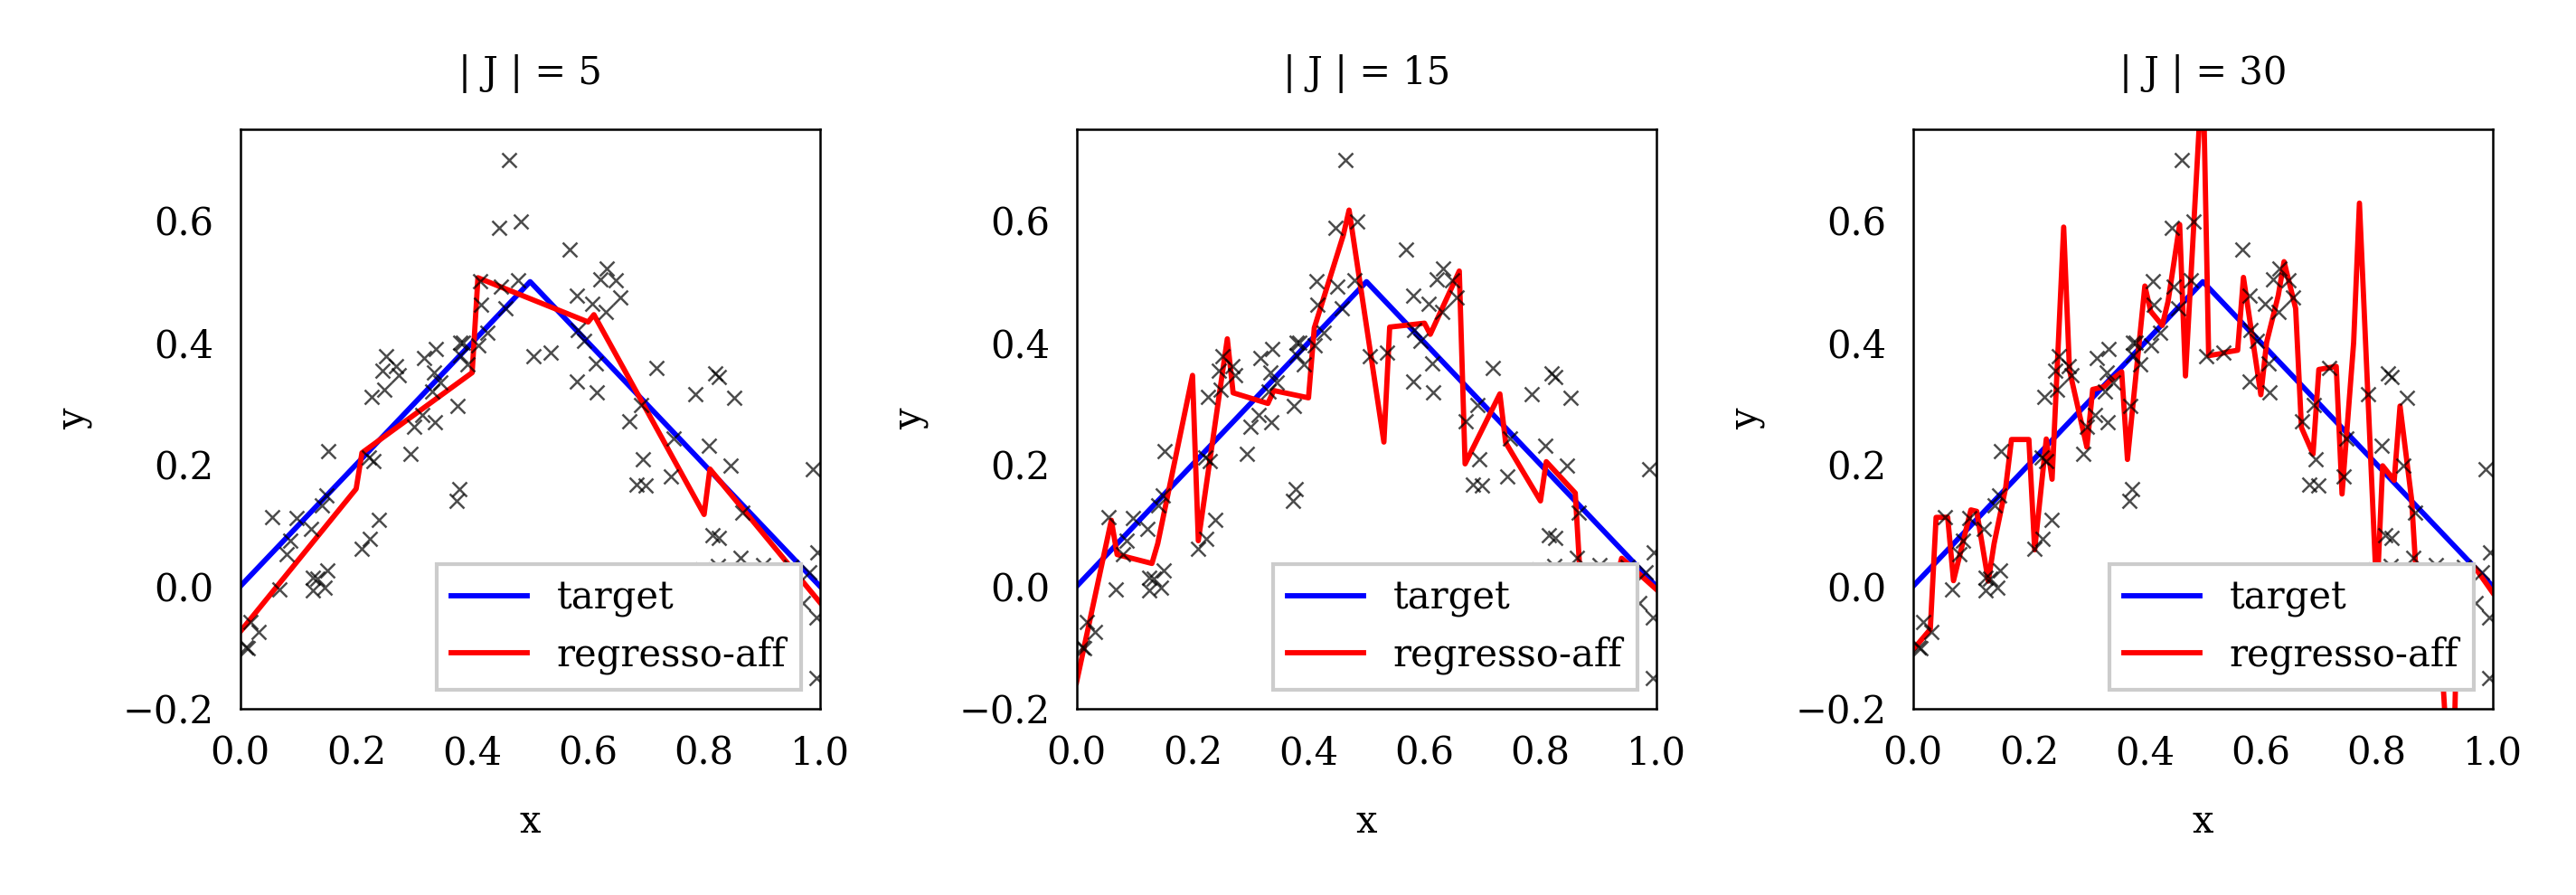

In [ ]:
l10 = np.log10

nrep = 32
n = 100
sdnoise = .1

def genDat(n, sd):
    Xtrain = np.random.rand(n,1)
    ytrain = 0.5 - np.abs(Xtrain - 0.5) + sd * np.random.randn(n,1)
    Xtest =np.arange(0, 1.01, 0.01)
    ytest = 0.5 - np.abs(Xtest - 0.5)
    return Xtrain, ytrain, Xtest, ytest

Xtrain, ytrain, Xtest, ytest = genDat(n=n, sd=sdnoise)

Jcards = [5, 15, 30]

ftest = np.zeros((len(Xtest), len(Jcards)))

for it in range(len(Jcards)):
    Jcard = Jcards[it]
    bintest = np.ceil(Xtest*Jcard)
    bintest = bintest + (bintest==0)
    bintrain = np.ceil(Xtrain*Jcard)
    bintrain = bintrain + (bintrain==0)

    for itest in range(len(Xtest)):
        x = Xtest[itest]
        bin = bintest[itest]
        ind = list(np.where(bintrain==bin)[0])
        if np.size(ind)==0:
            ftest[itest, it] = np.mean(ytrain)
        else:
            yloc = ytrain[ind]
            Xloc = np.vstack( (Xtrain[ind,0], np.ones(len(ind))) ).T
            th = np.linalg.lstsq(Xloc.T.dot(Xloc), Xloc.T.dot(yloc), rcond=None)[0]
            ftest[itest, it] = np.hstack((Xtest[itest], 1)).dot(th)

plt.figure(figsize = medium_rectangle, tight_layout = True)
for i in range(len(Jcards)):
    plt.subplot(1,3,i+1)
    plt.plot(Xtest, ytest, 'b')
    plt.plot(Xtest, ftest[:, i], 'r')
    plt.plot(Xtrain, ytrain, 'xk', alpha=0.7)
    plt.title(f'| J | = {Jcards[i]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-0.2, 0.75))
    plt.legend(('target', 'regresso-aff'), loc='lower right');

plt.savefig('fig66.svg')
files.download("fig66.svg")

# Chapter 7


### 7.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

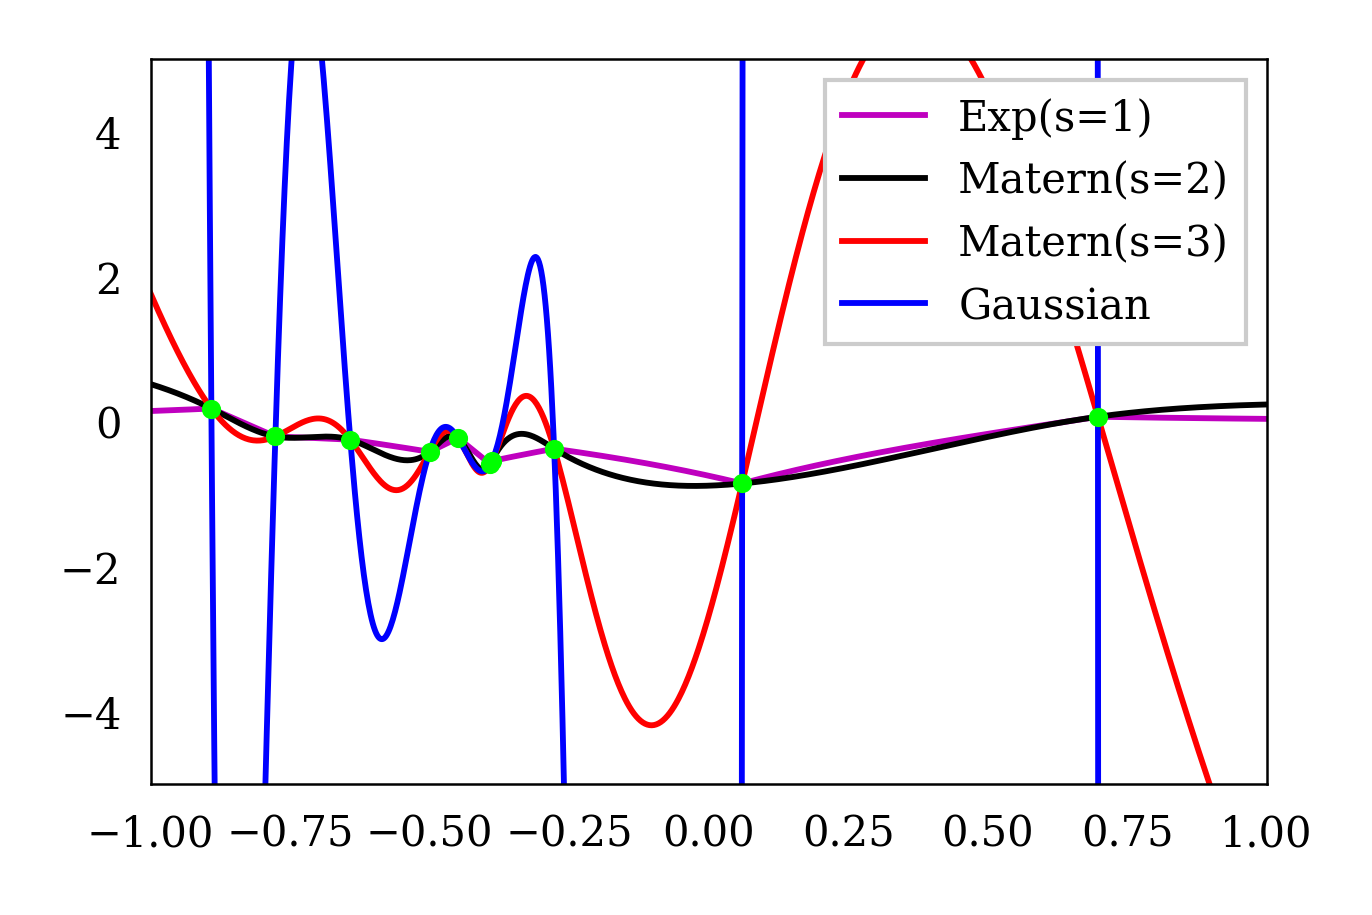

In [ ]:
np.random.seed(15)

def distmat(a,b):
    C = ((a[:,None]-b[None,:])**2)
    # C = np.sum(a**2,0)[:,None] + np.sum(b**2,0)[None,:] - 2*a.transpose().dot(b)
    return C

def solve(K, Kt, y):
    a = np.linalg.lstsq(K, y, rcond=None)[0]
    return Kt.dot(a)

n = 10
sdnoise = 0.4
x = np.random.rand(n)*2-1
y = np.abs(x)-1 + np.random.rand(n)*sdnoise
Xtest = 2*np.arange(0, 1.001, 0.001)-1

#Gaussian
alphak = 6
K = np.exp( -distmat(x, x) * alphak)
Ktest = np.exp( -distmat(Xtest, x) * alphak)
y_est1 = solve(K, Ktest, y)


#Exponential - 1
alphak = 2
temp = np.sqrt(distmat(x, x))
K = np.exp( -temp*alphak)
temp = np.sqrt(distmat(Xtest, x))
Ktest = np.exp( -temp*alphak)
y_est2 = solve(K, Ktest, y)

#Exponential - 2
alphak = 2
temp = np.sqrt(distmat(x, x))
K = (1 + temp*alphak) * np.exp(-temp*alphak)
temp = np.sqrt(distmat(Xtest, x))
Ktest = (1 + temp*alphak) * np.exp(-temp*alphak)
y_est3 = solve(K, Ktest, y)

#Exp - 3
alphak = 2
temp = distmat(x, x)
K = (1 + np.sqrt(temp)*alphak + temp*alphak**2/3) * np.exp(-np.sqrt(temp)*alphak)
temp = (distmat(Xtest, x))
Ktest = (1 + np.sqrt(temp) * alphak  +  temp * alphak**2 / 3 )* np.exp( -np.sqrt(temp) * alphak )
y_est4 = solve(K, Ktest, y)

plt.plot(Xtest, y_est2, 'm')
plt.plot(Xtest, y_est3, 'k');
plt.plot(Xtest, y_est4, 'r');
plt.plot(Xtest, y_est1, 'b')
plt.legend(['Exp(s=1)', 'Matern(s=2)', 'Matern(s=3)', 'Gaussian'], loc='upper right')

plt.plot(x, y, '.', markersize = 4, c='lime')
plt.ylim(-5,5)
plt.xlim(-1,1);

plt.savefig('fig72.svg')
files.download("fig72.svg")


### 7.3



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

plt.figure(figsize=(10,8))


def sq_dist(a, b):
    C = ((a[:,None]-b[None,:])**2)
    return C


def affine_fit(x, y):
    a = np.polyfit(x, y, 1)
    b = a[1]
    a = a[0]
    return a, b


ns = np.round(2.0 ** np.arange(2, 10.25, 0.25)).astype(int)
nrep = 20
kernel_types = [1, 2, 4]
lambdas = 10**np.arange(2, -12, -0.25)
valtests = np.zeros((len(lambdas),len(ns),nrep,2))
kkk = 0
for kernel_type in kernel_types:
    kkk += 1
    seed = 1
    np.random.seed(seed)

    for idata in [1, 2]:
        for irep in tqdm.tqdm(range(nrep)):
            n = int(np.max(ns))
            ntest = int(np.max(ns)) * 4
            Xfull = np.random.rand(n, 1)
            Xtest = np.arange(0,ntest-1).T/(ntest-1)
            std_noise = 0.2

            if idata == 1:
                yfull = np.sin(4 * np.pi * Xfull) + std_noise * np.random.randn(n, 1)
                ytest = np.sin(4 * np.pi * Xtest)
            else:
                yfull = np.sign(np.sin(4 * np.pi * Xfull)) + std_noise * np.random.randn(n, 1)
                ytest = np.sign(np.sin(4 * np.pi * Xtest))

            for in_, n in enumerate(ns):
                X = Xfull[:n,0]
                y = yfull[:n]
                alphak = 2
                if kernel_type == 1:
                    K = np.exp(-np.sqrt(sq_dist(X,X)) * alphak)
                    Ktest = np.exp(-np.sqrt(sq_dist(Xtest,X)) * alphak)

                elif kernel_type == 2:
                    temp = np.sqrt(sq_dist(X, X))
                    K = (1 + temp * alphak) * np.exp(-temp * alphak)
                    Ktest = (1 + np.sqrt(sq_dist(Xtest, X)) * alphak) * np.exp(-np.sqrt(sq_dist(Xtest, X)) * alphak)
                elif kernel_type == 4:
                    K = np.exp(-sq_dist(X, X) * alphak * 3)
                    Ktest = np.exp(-sq_dist(Xtest, X) * alphak * 3)
                u, e = np.linalg.eig(K)
                e = np.diag(e)

                valtest = np.zeros(len(lambdas))
                for ilambda, lambda_ in enumerate(lambdas):
                    alpha = u * 1/(e + n*lambda_)* u.T * y.reshape(n,)
                    ytest_pred = Ktest * alpha
                    valtest[ilambda] = np.sum( (ytest_pred - ytest[:n])**2 )/ntest
                valtests[:,in_,irep,idata-1] = valtest

##########
    print("Second loop")
    for idata in [1,2]:

        plt.subplot(3, 3, (kkk-1)*3 + idata)
        n = 128

        X = np.random.rand(n)
        Xtest = np.linspace(0, 1, ntest)
        std_noise = 0.2
        if idata == 1:
            y = np.sin(4 * np.pi * X) + std_noise * np.random.randn(n)
            ytest = np.sin(4 * np.pi * Xtest)
        elif idata == 2:
            y = np.sign(np.sin(4 * np.pi * X)) + std_noise * np.random.randn(n)
            ytest = np.sign(np.sin(4 * np.pi * Xtest))

        alphak = 2
        if kernel_type == 1:
            K = np.exp(-np.sqrt(sq_dist(X,X)) * alphak)
            Ktest = np.exp(-np.sqrt(sq_dist(Xtest,X)) * alphak)
        elif kernel_type == 2:
            temp = np.sqrt(sq_dist(X, X))
            K = (1 + temp * alphak) * np.exp(-temp * alphak)
            Ktest = (1 + np.sqrt(sq_dist(Xtest, X)) * alphak) * np.exp(-np.sqrt(sq_dist(Xtest, X)) * alphak)
        elif kernel_type == 3:
            temp = np.sqrt(sq_dist(X, X))
            K = (1 + np.sqrt(sq_dist(X, X)) * alphak + sq_dist(X, X) * alphak**2 / 3) * np.exp(-np.sqrt(sq_dist(X, X)) * alphak)
            Ktest = (1 + np.sqrt(sq_dist(Xtest, X)) * alphak + sq_dist(Xtest, X) * alphak**2 / 3) * np.exp(-np.sqrt(sq_dist(Xtest, X)) * alphak)
        elif kernel_type == 4:
            K = np.exp(-sq_dist(X, X) * alphak * 3)
            Ktest = np.exp(-sq_dist(Xtest, X) * alphak * 3)


        u, e = np.linalg.eig(K)
        e = np.diag(e)

        lambdas = 10 ** np.arange(2, -12, -0.25)

        valtest = np.zeros(len(lambdas))
        for ilambda in range(len(lambdas)):
            lambda_ = lambdas[ilambda]

            alpha = u * 1/(e + n*lambda_)* np.dot(u.T, y)
            ytest_pred = Ktest @ alpha
            valtest[ilambda] = 1 / ntest * np.sum((ytest_pred - ytest) ** 2)

        ilambda = np.argmin(valtest)
        lambda_ = lambdas[ilambda]

        alpha = u * 1/(e + n*lambda_)* np.dot(u.T, y)
        ytest_pred = Ktest @ alpha

        plt.plot(Xtest, ytest, 'r', linewidth=2)
        plt.plot(Xtest, ytest_pred, 'k', linewidth=2)
        plt.plot(X, y, 'kx')
        plt.legend(['target', 'prediction'])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis([0, 1, -1.5, 2])

        if idata == 1:
            plt.title('Smooth target')
        elif idata == 2:
            plt.title('Non-smooth target')


    plt.subplot(3, 3, (kkk - 1) * 3 + 3)
    plt.plot(np.log2(ns), np.log2(np.min(np.mean(valtests[:, :, :, 0], axis=2),axis=0)), 'b', linewidth=2)
    plt.plot(np.log2(ns), np.log2(np.min(np.mean(valtests[:, :, :, 1], axis=2),axis=0)), 'r', linewidth=2)

    a, b = affine_fit(np.log2(ns), np.log2(np.min(np.mean(valtests[:, :, :, 0], axis=2),axis=0)))
    plt.plot(np.log2(ns), a * np.log2(ns) + b, 'b:', linewidth=2)

    a, b = affine_fit(np.log2(ns), np.log2(np.min(np.mean(valtests[:, :, :, 1], axis=2),axis=0)))
    plt.plot(np.log2(ns), a * np.log2(ns) + b, 'r:', linewidth=2)

    plt.xlabel('log_2(n)')
    plt.ylabel('log_2(excess risk)')
    plt.legend(['smooth target', 'non-smooth target'], loc='lower left')
    plt.title('Convergence rates', fontweight='normal')
    plt.ylim([-11, 0.5])
    plt.xlim([2, 10])
plt.tight_layout(pad=2.0)
plt.show()


 60%|██████    | 12/20 [03:08<02:05, 15.70s/it]


KeyboardInterrupt: ignored

<Figure size 6000x4800 with 0 Axes>

# Chapter 8


### 8.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

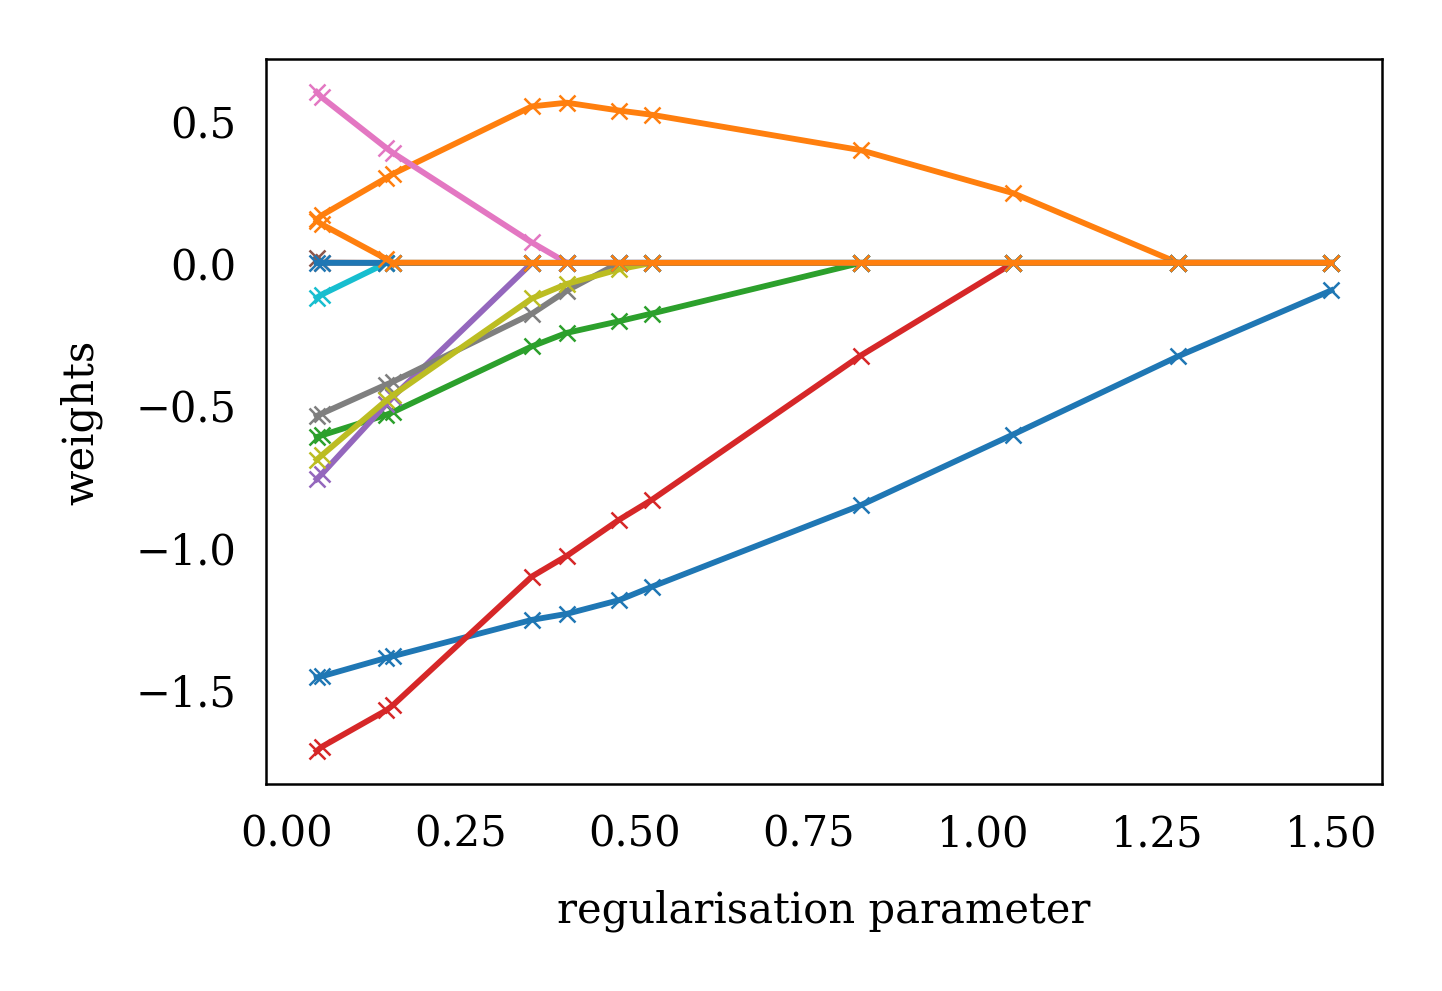

In [ ]:
n = 32
d = 12
k = 4
sd_noise = 1
X = np.random.randn(n, d)
wast = np.zeros(d)
wast[0:k] = np.sign(np.random.randn(k))
y = X.dot(wast) + sd_noise*np.sqrt(k)*np.random.randn(n)

#Lasso
w = np.zeros(d)
LAMBDAS = np.arange(0, 1.5005, 0.0005)
L = np.max(np.linalg.eigvals(X.T.dot(X)/n))

ws = np.zeros((len(LAMBDAS), d))
for il in range(len(LAMBDAS)):
    lmbd = LAMBDAS[il]
    maxit = 200
    for iter in range(maxit):
        grad = (1/n)*X.T.dot(X.dot(w)-y)
        w = w - (1/L)*grad
        w = np.sign(w) * np.maximum(np.abs(w)  - lmbd/L, 0)
    ws[il, ] = w

nactive = np.sum(np.abs(ws)>1e-4, axis=1)
ind = list(np.where(np.abs(nactive[1:] - nactive[:-1])>0)[0])
ind.append(len(LAMBDAS)-1)


plt.figure(figsize = small_rectangle)
plt.plot(LAMBDAS[ind], ws[ind], '-x')
plt.xlabel('regularisation parameter')
plt.ylabel('weights');

plt.savefig('fig81.svg')
files.download("fig81.svg")

## 8.2

In [ ]:
def script_model_selection(n,d,k,std_noise,seeds,dmax):

    nrep = len(seeds)
    lambdas = 10**np.arange(1, -7, -0.1)

    performance_lasso = np.zeros((len(lambdas), nrep))
    performance_ridge = np.zeros((len(lambdas), nrep))
    performance_OMP = np.zeros((d, nrep))
    performance_oracle = np.zeros(nrep)
    performance_zero = np.zeros(nrep)

    for iseed in range(nrep):
        seed = seeds[iseed]
        np.random.seed(seed)

        X = np.random.randn(n, dmax)
        X = X[:, :d]
        wast = np.zeros(d)
        wast[0:k] = np.sign(np.random.randn(k))
        y = X @ wast + std_noise * np.sqrt(k) * np.random.randn(n)

        # zero prediction
        w = np.zeros(d)
        performance_zero[iseed] = np.mean((X @ (w - wast))**2)

        # lasso
        w = np.zeros(d)
        L = np.max(np.linalg.eig(X.T @ X/n)[0])
        ws = np.zeros((d, len(lambdas)))
        vals = np.zeros(len(lambdas))

        for ilambda in range(len(lambdas)):
            lambda_ = lambdas[ilambda]
            maxiter = 20
            for iter_ in range(maxiter):
                grad = 1/n * X.T @ (X @ w - y)
                w = w - 1/L * grad
                w = np.sign(w) * np.maximum(np.abs(w) - lambda_/L, 0)

            ws[:, ilambda] = w
            vals[ilambda] = np.mean((X @ (w - wast))**2)

        performance_lasso[:, iseed] = vals

        # ridge
        w = np.zeros((d, 1))
        vals = np.zeros(len(lambdas))

        for ilambda in range(len(lambdas)):
            lambda_ = lambdas[ilambda]
            w_ridge = np.linalg.inv(X.T @ X + n*lambda_*np.eye(d)) @ (X.T @ y)
            vals[ilambda] = np.sum(1/n * (X @ (w_ridge - wast))**2)

        performance_ridge[:, iseed] = vals

        # omp
        I = []
        Ic = np.arange(d)
        vals_OMP = np.zeros(d)
        Xorth = X.copy()
        yorth = y.copy()

        for i in range(d):
            perfloc = np.zeros(len(Ic))
            for j in range(len(Ic)):
                icand = Ic[j]
                wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
                perfloc[j] = np.mean((Xorth[:, icand] * wcand - yorth)**2)

            b = np.argmin(perfloc)
            I.append(Ic[b])
            inew = Ic[b]
            Ic = np.delete(Ic, b)
            wcand = np.linalg.solve(X[:, I].T @ X[:, I] + n * 1e-12 * np.eye(i+1), X[:, I].T @ y)
            w = np.zeros(d)
            w[I] = wcand
            vals_OMP[i] = np.mean((X @ (w - wast))**2)
            temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
            Xorth = temp @ Xorth
            yorth = temp @ yorth

        performance_OMP[:, iseed] = vals_OMP

        w_ols = np.linalg.solve(X.T @ X + n*1e-14*np.eye(d), X.T @ y)
        performance_ols = np.mean((X @ (w_ols - wast))**2)
        I = np.arange(k)
        wcand = np.linalg.solve(X[:, I].T @ X[:, I] + n*1e-12*np.eye(k), X[:, I].T @ y)
        w = np.zeros(d)
        w[I] = wcand
        performance_oracle[iseed] = np.mean((X @ (w - wast))**2)

    return performance_lasso, performance_ridge, performance_OMP, performance_oracle, performance_zero


In [ ]:
def script_model_selectionROT(n,d,k,std_noise,seeds,dmax):

    nrep = len(seeds)
    lambdas = 10**np.arange(1, -7, -0.1)

    performance_lasso = np.zeros((len(lambdas), nrep))
    performance_ridge = np.zeros((len(lambdas), nrep))
    performance_OMP = np.zeros((d, nrep))

    for iseed in range(nrep):
        seed = seeds[iseed]
        np.random.seed(seed)

        X = np.random.randn(n, dmax)
        X = X[:, :d]
        wast = np.zeros(d)
        wast[0:k] = np.sign(np.random.randn(k))
        y = X @ wast + std_noise * np.sqrt(k) * np.random.randn(n)

        # random rotation
        u, s, v = np.linalg.svd(np.random.randn(d, d))
        X = X @ u
        wast = u.T @ wast

        # lasso
        w = np.zeros(d)
        L = np.max(np.linalg.eig(X.T @ X/n)[0])
        ws = np.zeros((d, len(lambdas)))
        vals = np.zeros(len(lambdas))

        for ilambda in range(len(lambdas)):
            lambda_ = lambdas[ilambda]
            maxiter = 20
            for iter_ in range(maxiter):
                grad = 1/n * X.T @ (X @ w - y)
                w = w - 1/L * grad
                w = np.sign(w) * np.maximum(np.abs(w) - lambda_/L, 0)

            ws[:, ilambda] = w
            vals[ilambda] = np.mean((X @ (w - wast))**2)

        performance_lasso[:, iseed] = vals

        # ridge
        w = np.zeros((d, 1))
        vals = np.zeros(len(lambdas))

        for ilambda in range(len(lambdas)):
            lambda_ = lambdas[ilambda]
            w_ridge = np.linalg.inv(X.T @ X + n*lambda_*np.eye(d)) @ (X.T @ y)
            vals[ilambda] = np.sum(1/n * (X @ (w_ridge - wast))**2)

        performance_ridge[:, iseed] = vals

        # omp
        I = []
        Ic = np.arange(d)
        vals_OMP = np.zeros(d)
        Xorth = X.copy()
        yorth = y.copy()

        for i in range(d):
            perfloc = np.zeros(len(Ic))
            for j in range(len(Ic)):
                icand = Ic[j]
                wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
                perfloc[j] = np.mean((Xorth[:, icand] * wcand - yorth)**2)

            b = np.argmin(perfloc)
            I.append(Ic[b])
            inew = Ic[b]
            Ic = np.delete(Ic, b)
            wcand = np.linalg.solve(X[:, I].T @ X[:, I] + n * 1e-12 * np.eye(i+1), X[:, I].T @ y)
            w = np.zeros(d)
            w[I] = wcand
            vals_OMP[i] = np.mean((X @ (w - wast))**2)
            temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
            Xorth = temp @ Xorth
            yorth = temp @ yorth

        performance_OMP[:, iseed] = vals_OMP

        w_ols = np.linalg.solve(X.T @ X + n*1e-14*np.eye(d), X.T @ y)
        performance_ols = np.mean((X @ (w_ols - wast))**2)

    return performance_lasso, performance_ridge, performance_OMP


In [ ]:
n = 64
k = 4
std_noise = 1

ds = np.unique(np.round(2**(np.arange(2, 8.1, 0.1))))
ds = ds.astype(int)
performance_lassos = np.zeros(len(ds))
performance_ridges = np.zeros(len(ds))
performance_OMPs = np.zeros(len(ds))
performance_oracles = np.zeros(len(ds))
performance_zeros = np.zeros(len(ds))

for id in range(len(ds)):
    d = ds[id]
    print(id)
    performance_lasso, performance_ridge, performance_OMP, performance_oracle, performance_zero = script_model_selection(n, d, k, std_noise, np.arange(1, 129), max(ds))
    performance_lassos[id] = np.min(np.mean(performance_lasso, axis=1))
    performance_ridges[id] = np.min(np.mean(performance_ridge, axis=1))
    performance_OMPs[id] = np.min(np.mean(performance_OMP, axis=1))
    performance_oracles[id] = np.mean(performance_oracle)
    performance_zeros[id] = np.mean(performance_zero)

performance_lassosROT = np.zeros(len(ds))
performance_ridgesROT = np.zeros(len(ds))
performance_OMPsROT = np.zeros(len(ds))
performance_oraclesROT = np.zeros(len(ds))

for id in range(len(ds)):
    d = ds[id]
    performance_lassoROT, performance_ridgeROT, performance_OMPROT = script_model_selectionROT(n, d, k, std_noise, np.arange(1, 129), max(ds))
    performance_lassosROT[id] = np.min(np.mean(performance_lassoROT, axis=1))
    performance_ridgesROT[id] = np.min(np.mean(performance_ridgeROT, axis=1))
    performance_OMPsROT[id] = np.min(np.mean(performance_OMPROT, axis=1))
    performance_oraclesROT[id] = np.mean(performance_oracle)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


<ipython-input-5-48d8420b0387>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  ws[:, ilambda] = w
<ipython-input-5-48d8420b0387>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  vals[ilambda] = np.mean((X @ (w - wast))**2)


34
35
36
37


<ipython-input-5-48d8420b0387>:67: RuntimeWarning: overflow encountered in matmul
  wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
<ipython-input-5-48d8420b0387>:67: RuntimeWarning: invalid value encountered in double_scalars
  wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
<ipython-input-5-48d8420b0387>:78: RuntimeWarning: overflow encountered in matmul
  temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
<ipython-input-5-48d8420b0387>:78: RuntimeWarning: invalid value encountered in double_scalars
  temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
<ipython-input-5-48d8420b0387>:68: RuntimeWarning: overflow encountered in square
  perfloc[j] = np.mean((Xorth[:, icand] * wcand - yorth)**2)


38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


<ipython-input-6-cedbdc7a7a32>:39: ComplexWarning: Casting complex values to real discards the imaginary part
  ws[:, ilambda] = w
<ipython-input-6-cedbdc7a7a32>:66: RuntimeWarning: overflow encountered in matmul
  wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
<ipython-input-6-cedbdc7a7a32>:66: RuntimeWarning: invalid value encountered in double_scalars
  wcand = (Xorth[:, icand].T @ Xorth[:, icand] + n*1e-14) / (Xorth[:, icand].T @ yorth)
<ipython-input-6-cedbdc7a7a32>:77: RuntimeWarning: overflow encountered in matmul
  temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
<ipython-input-6-cedbdc7a7a32>:77: RuntimeWarning: invalid value encountered in double_scalars
  temp = (np.eye(n) - Xorth[:, inew] @ Xorth[:, inew].T / (Xorth[:, inew].T @ Xorth[:, inew] + n * 1e-14))
<ipython-input-6-cedbdc7a7a32>:67: RuntimeWarning: overflow encountered in square
  perfloc[j] = np.mean((Xorth[:, icand] * w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

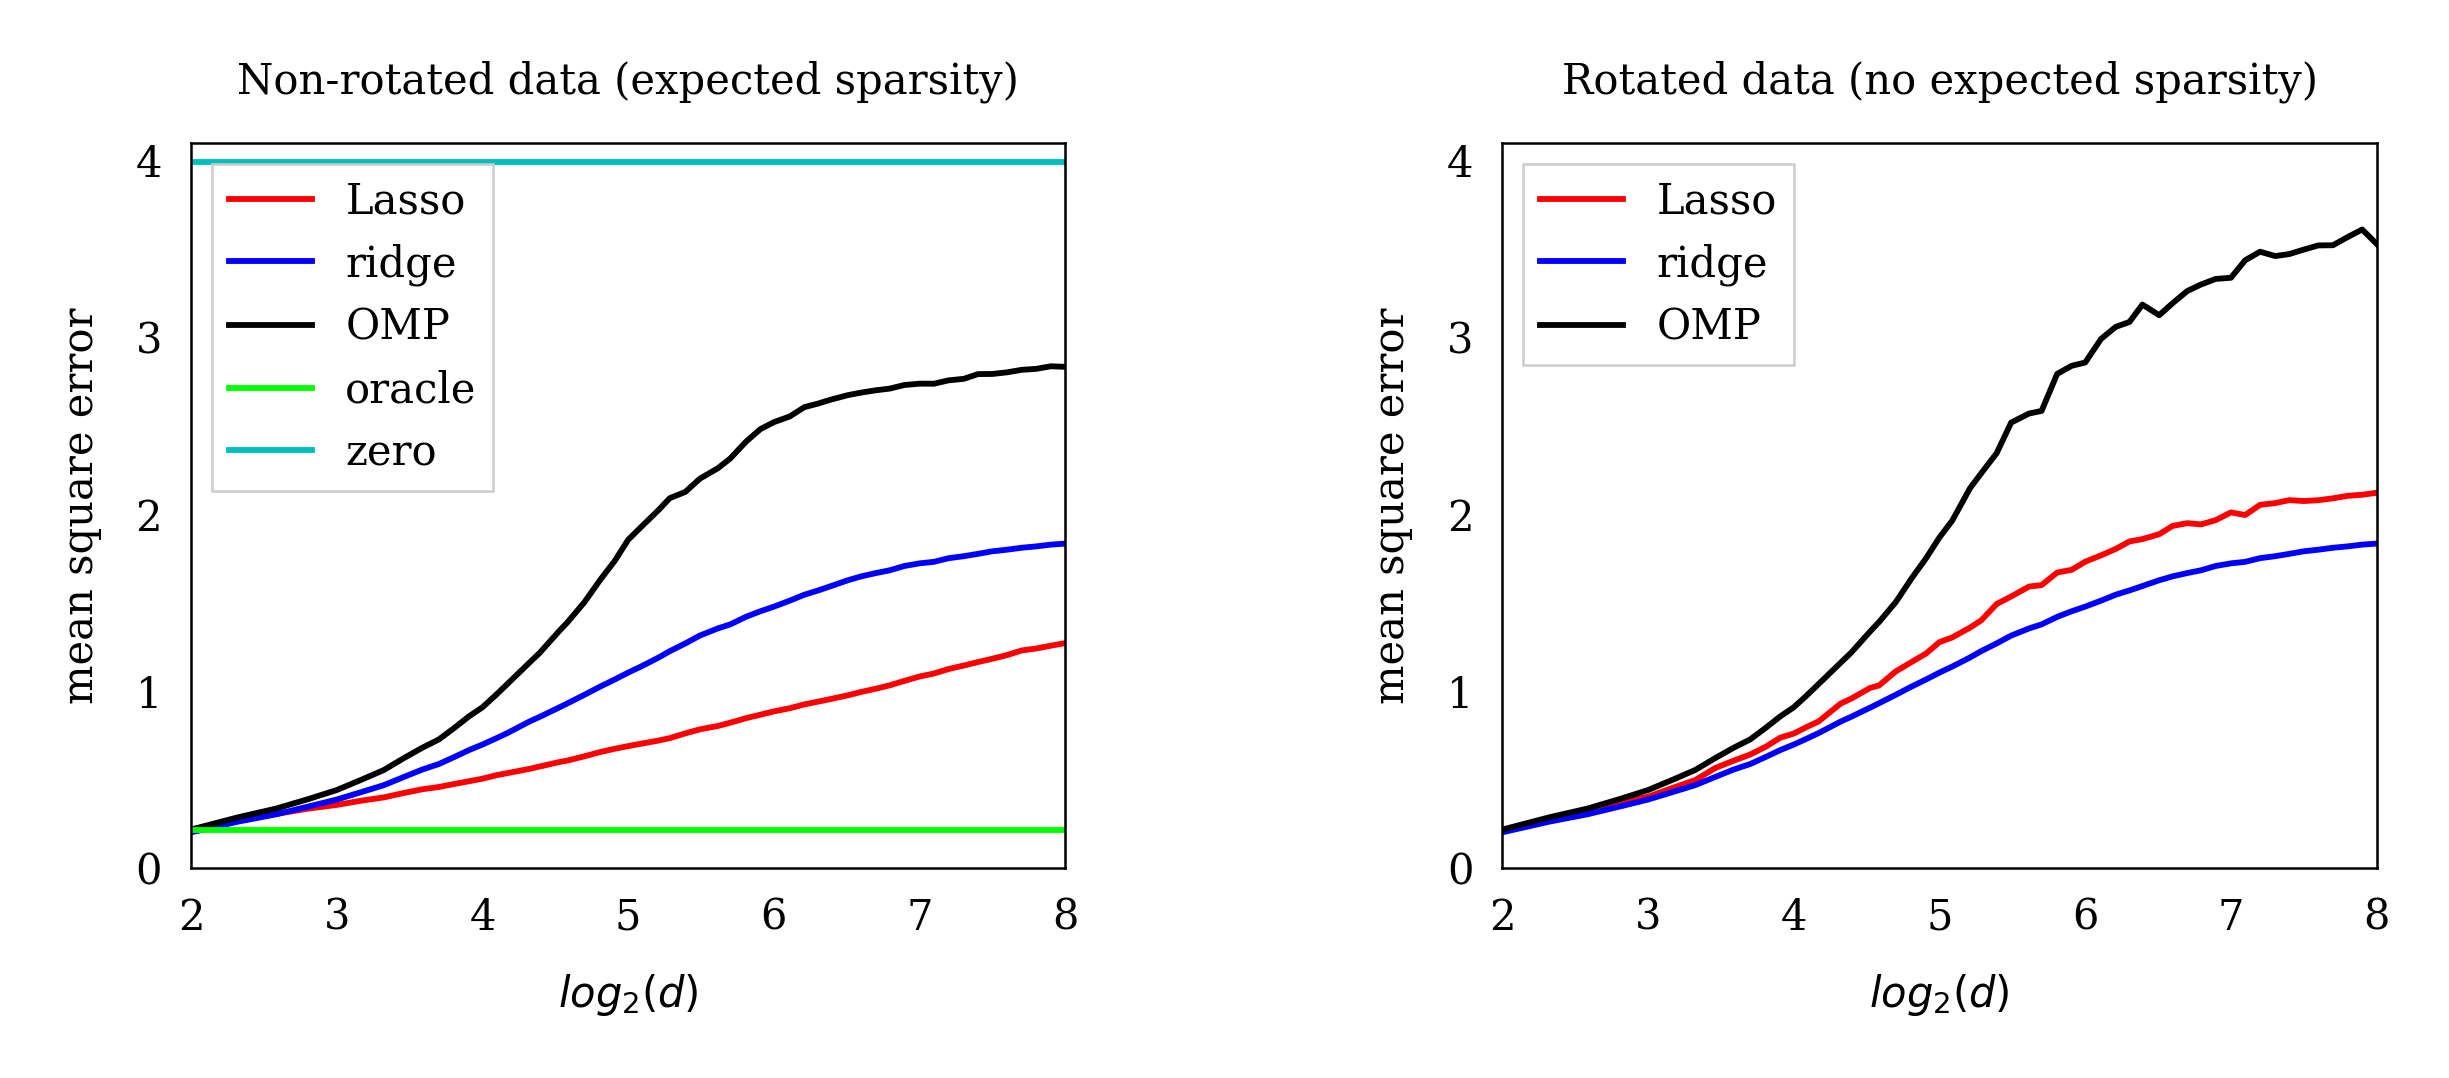

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = medium_rectangle, gridspec_kw = inner_space)

plt.sca(axs[0])
plt.plot(np.log2(ds), performance_lassos, 'r')
plt.plot(np.log2(ds), performance_ridges, 'b')
plt.plot(np.log2(ds), performance_OMPs, 'k')
plt.plot(np.log2(ds), performance_oracles, 'lime')
plt.plot(np.log2(ds), performance_zeros, 'c')
plt.legend(['Lasso', 'ridge', 'OMP', 'oracle', 'zero'], loc='upper left')
plt.xlabel('$log_2(d)$')
plt.ylabel('mean square error')
plt.title('Non-rotated data (expected sparsity)')
plt.axis([2, 8, 0, 4.1])

plt.sca(axs[1])
plt.plot(np.log2(ds), performance_lassosROT, 'r')
plt.plot(np.log2(ds), performance_ridgesROT, 'b')
plt.plot(np.log2(ds), performance_OMPsROT, 'k')
plt.legend(['Lasso', 'ridge', 'OMP'], loc='upper left')
plt.xlabel('$log_2(d)$')
plt.ylabel('mean square error')
plt.title('Rotated data (no expected sparsity)')
plt.axis([2, 8, 0, 4.1])

plt.savefig('fig82.svg')
files.download("fig82.svg")

# Chapter 9

### 9.1

In [ ]:
def launch_training_relu_nn(X, y, Xtest, ytest, m, batch_size, maxiter, gamma):
    n, d = X.shape
    ntest, d = Xtest.shape

    # random on the sphere
    w = np.random.randn(d, m) / np.sqrt(d / 2)
    w = np.random.randn(d, m)
    w = w / np.tile(np.sqrt(np.sum(w**2, axis=0)),(d,1))
    b = np.random.rand(1, m) * 2 - 1
    eta = np.random.randn(1, m) / np.sqrt(m / 2)
    eta_bias = 0

    # training
    train_errors = np.zeros(maxiter // 100)
    test_errors = np.zeros(maxiter // 100)

    for iter in range(maxiter):
        if (iter+1) % 100 == 1:
            test_errors[iter // 100] = np.mean((np.maximum(Xtest @ w + np.tile(b, (ntest,1)), 0) @ (eta.T) + eta_bias - ytest) ** 2)

        ind = (iter * batch_size + np.arange(batch_size)) % n
        Xbatch = X[ind,:]
        ybatch = y[ind]
        hidden = np.maximum(Xbatch @ w + np.tile(b, (batch_size,1)), 0)
        hiddender = ((Xbatch @w + np.tile(b, (batch_size, 1))) > 0)*1
        ypred = hidden@(eta.T) + eta_bias
        if (iter+1) % 100 == 1:
            train_errors[iter // 100] = np.mean((ypred - ybatch) ** 2)

        gradeta = (ypred - ybatch).T.dot(hidden)
        # gradeta_bias = np.sum(ypred - ybatch)
        gradb = (ypred - ybatch).T @ (hiddender * np.tile(eta, (batch_size,1)))
        gradw = Xbatch.T @ ((ypred - ybatch) * (hiddender * np.tile(eta, (batch_size,1))))

        w -= (gamma / batch_size) * gradw
        b -= (gamma / batch_size) * gradb
        eta -= (gamma / batch_size) * gradeta

    return w, b, eta, eta_bias, test_errors, train_errors

### 9.2

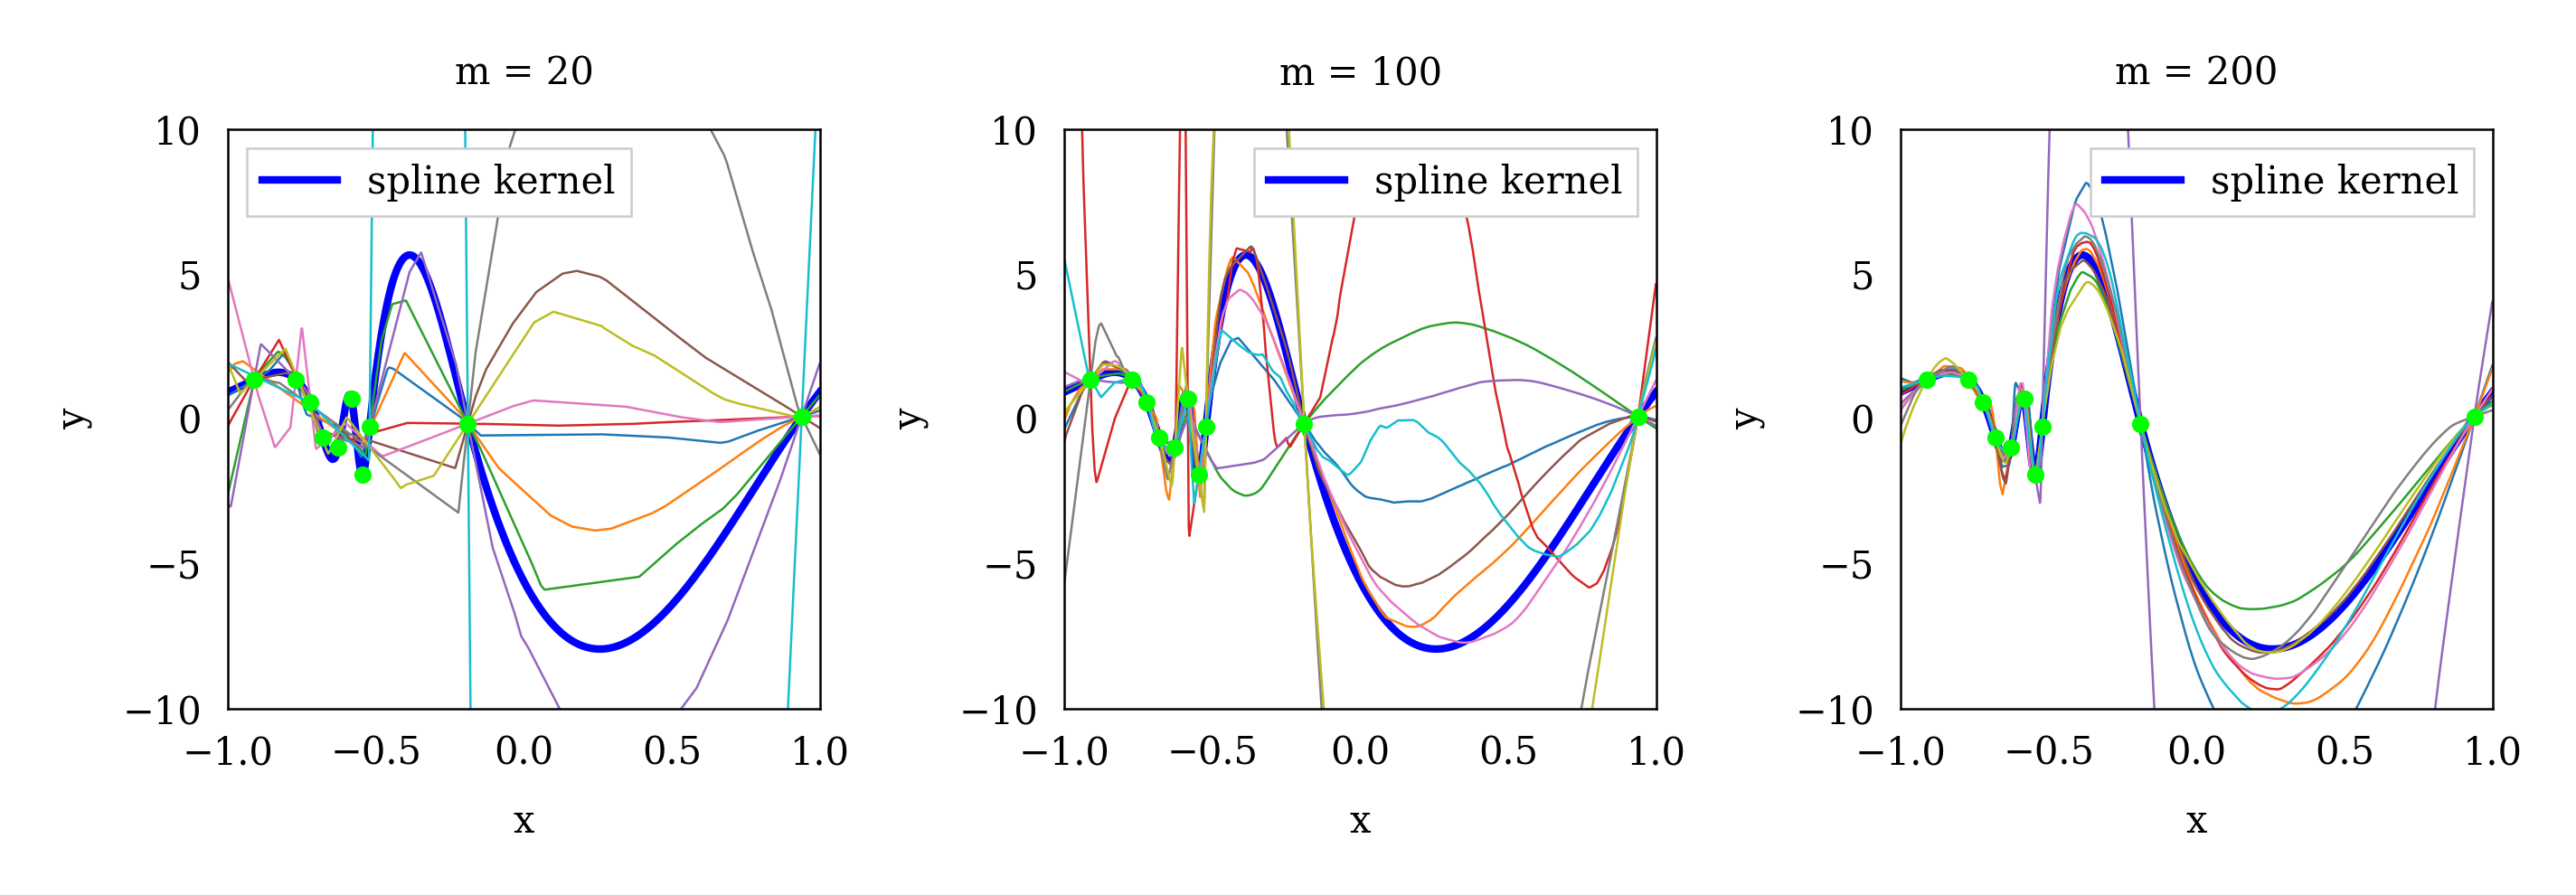

In [ ]:
def distmat(a,b):
    a = a.reshape(-1)
    b = b.reshape(-1)
    C = ((a[:,None]-b[None,:])**2)
    # C = np.sum(a**2,0)[:,None] + np.sum(b**2,0)[None,:] - 2*a.transpose().dot(b)
    return C

def Kernel(X, X_, d):
    return 1/6 + X.dot(X_.T)/2/d + distmat(X.T, X_.T)**(1.5)/24 * gamma(2)*gamma(d/2) / gamma(d/2+3/2) / gamma(1/2)

d = 1
n = 10
x = np.random.rand(n,1)*2 - 1
y = np.abs(x) - 1 + randn(n,1)*0.1
y = randn(n,1)
xtest = (2*np.arange(0, 1.0, 0.001)-1).reshape(-1,1)
ntest = len(xtest)

alphak = 6
K = Kernel(x,x, d)
Ktest = Kernel(xtest,x, d)
alpha = np.linalg.lstsq(K, y, rcond=None)[0]
yest1 = Ktest.dot(alpha)

M = [20, 100, 200]
nrep = 10
yests = np.zeros((len(M), len(xtest), nrep))
for mrep in range(len(M)):
    for irep in range(nrep):
        m = M[mrep]
        W = randn(m,d);
        W = W / np.sqrt(np.sum(W**2, 1))[:,None]
        b = rand(m,1)*2-1
        Phi = np.maximum(x.dot(W.T) + b.T, 0)
        Phitest = np.maximum(xtest.dot(W.T)+b.T, 0)
        K = Phi.dot(Phi.T)/m
        Ktest = Phitest.dot(Phi.T)/m
        alpha = np.linalg.lstsq( (K + 1e-12*np.eye(n)), y, rcond=None)[0]
        yests[mrep, :, irep] = Ktest.dot(alpha).reshape(-1)

plt.figure(figsize=medium_rectangle, tight_layout=True)

for i in range(len(M)):
    m = M[i]
    plt.subplot(1,3,i+1)
    plt.plot(xtest, yest1, 'b', linewidth=1, label='spline kernel')
    plt.plot(xtest, yests[i], linewidth=.3)
    plt.plot(x, y, '.', c = 'lime', markersize = 4)
    plt.xlim(-1, 1)
    plt.ylim(-10, 10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'm = {m}')
    plt.legend();

plt.savefig('fig92.svg')
files.download("fig92.svg")

### 9.3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

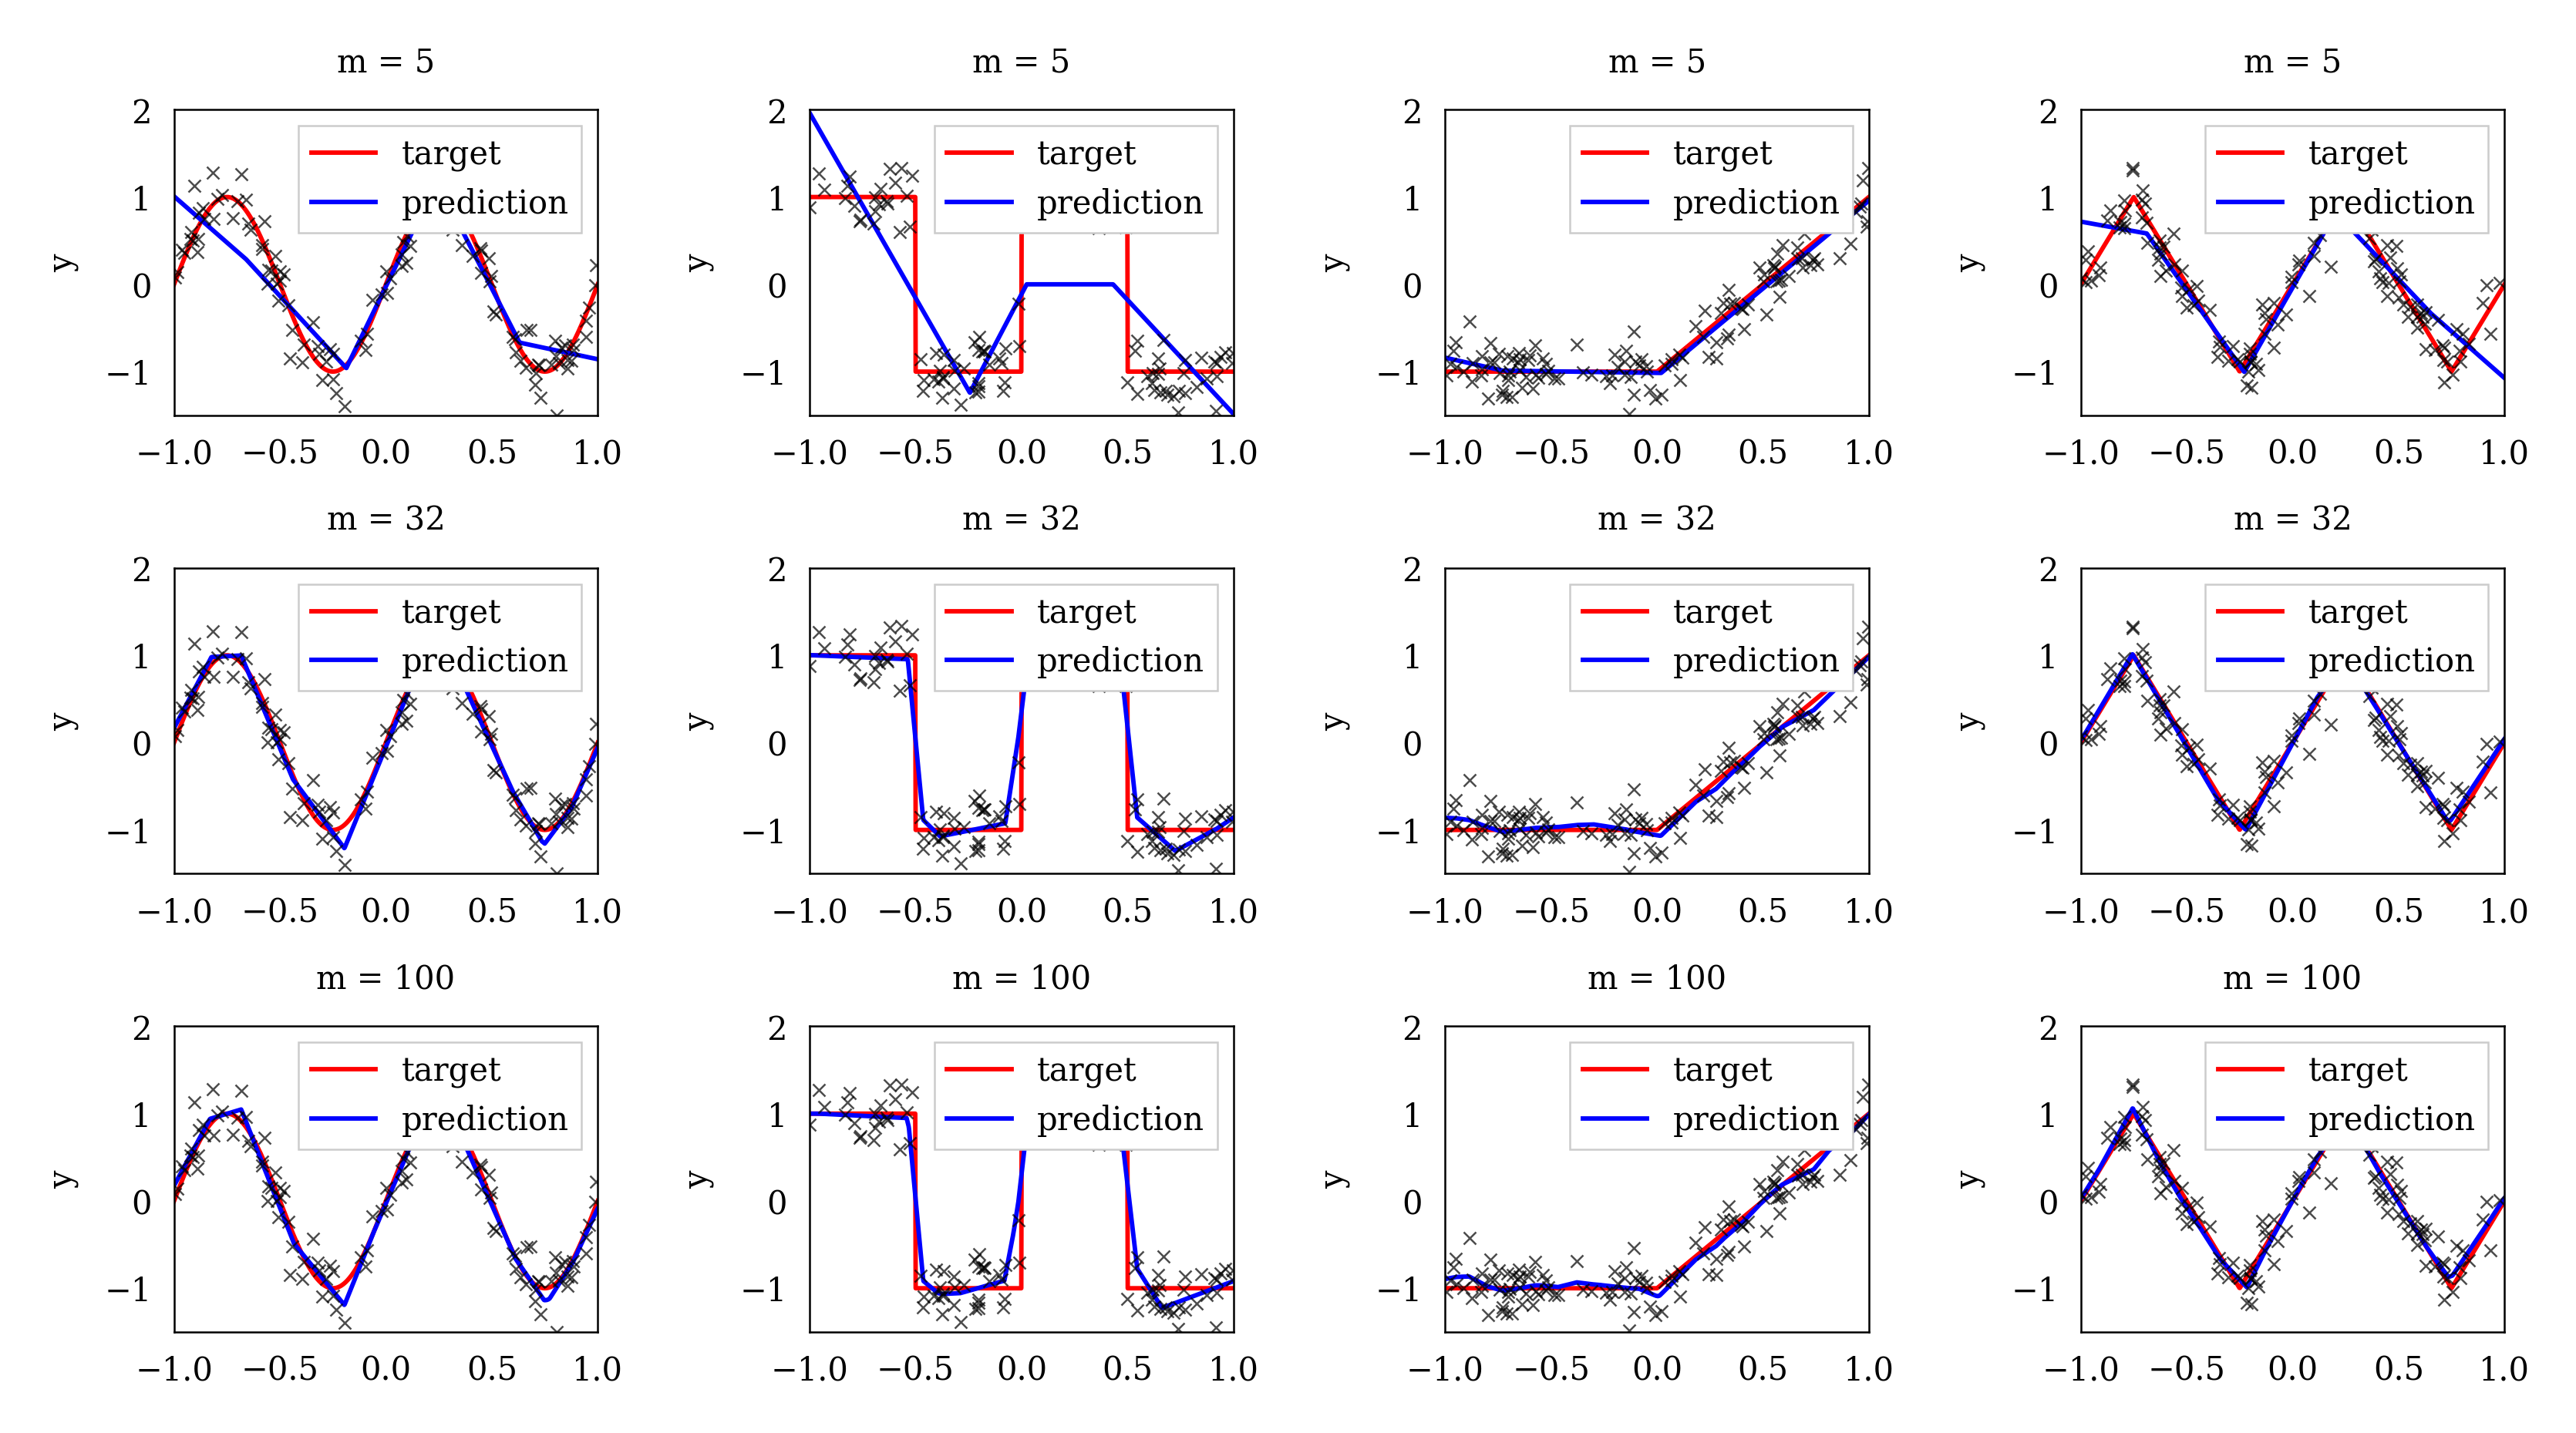

In [ ]:
n = 128
ntest = 1024
nrep = 1

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=big_rectangle, gridspec_kw = inner_space)

for idata in range(1,5):
    X = np.random.rand(n)*2-1
    Xtest = np.linspace(-1,1,ntest).T
    std_noise = .2

    if idata == 1:
        y = np.sin(2 * np.pi * X) + std_noise * np.random.randn(n)
        ytest = np.sin(2 * np.pi * Xtest)
    elif idata == 2:
        y = np.sign(np.sin(2 * np.pi * X)) + std_noise * np.random.randn(n)
        ytest = np.sign(np.sin(2 * np.pi * Xtest))
    elif idata == 3:
        y = ((np.maximum(X/2, 0) - 0.25) * 4) + std_noise * np.random.randn(n)
        ytest = (np.maximum(Xtest/2, 0) - 0.25) * 4
    elif idata == 4:
        y = (4 * np.abs(X + 1 - 0.25 - np.floor(X + 1 - 0.25) - 1/2) - 1) + std_noise * np.random.randn(n)
        ytest = 4 * np.abs(Xtest + 1 - 0.25 - np.floor(Xtest + 1 - 0.25) - 1/2) - 1

    ms = [5, 32, 100]
    for im, m in enumerate(ms):
        maxiter = 400000
        gamma = 0.005
        batch_size = 16

        # Training
        w, b, eta, eta_bias, test_errors, train_errors = launch_training_relu_nn(X.reshape(n,1), y.reshape(n,1), Xtest.reshape(ntest,1), ytest.reshape(ntest,1), m, batch_size, maxiter, gamma)

        # Testing
        ytest_pred = np.maximum(Xtest.reshape(ntest,1)@w + np.tile(b, (ntest,1)), 0) @ eta.T + eta_bias

        plt.sca(axs[im, idata-1])
        plt.plot(Xtest, ytest, 'r')
        plt.plot(Xtest, ytest_pred, 'b')
        plt.plot(X, y, 'kx', alpha=0.7)
        plt.legend(['target', 'prediction'], loc='upper right')
        plt.ylabel('y')
        plt.xlim([-1,1])
        plt.ylim([-1.5,2])
        plt.title(f'm = {m}')

plt.savefig('fig93.svg')
files.download("fig93.svg")

plt.show()